## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736,243,2961.898193
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655,248,2218.239746
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893,240,2220.297119
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994,244,3033.770752
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377,9.358442,876.023529
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442,253.000000,6230.940918


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_stem_bark_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  \

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_stem_bark_kg_m2
0,-0.211
1,-0.073
2,0.030
3,0.000
4,0.122


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8177972820161272, 0.8257588966634692, 0.9037938329415656]
    Mean: 0.849
    Std: 0.039

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.32595666 0.35648991 0.44398583]
    Mean: 0.375
    Std: 0.050

 --------------------
Mean absolute error (MAE): 

    Scores: [0.23425398349321744, 0.2592126990764894, 0.2678941740678514]
    Mean: 0.254
    Std: 0.014

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7693307547782491                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.3356266169778283                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.08478629356985941                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 76          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.30404665028506594                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7693307547782491
Gamma: 0.3356266169778283
Learning_rate: 0.08478629356985941
Max_depth: 2
N_estimators: 76
Subsample: 0.30404665028506594


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.07287	validation_1-rmse:1.25663
[1]	validation_0-rmse:0.99611	validation_1-rmse:1.16626
[2]	validation_0-rmse:0.93567	validation_1-rmse:1.10343
[3]	validation_0-rmse:0.88278	validation_1-rmse:1.04666
[4]	validation_0-rmse:0.83504	validation_1-rmse:0.99159


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.80615	validation_1-rmse:0.96077
[6]	validation_0-rmse:0.76184	validation_1-rmse:0.90816
[7]	validation_0-rmse:0.71333	validation_1-rmse:0.84834
[8]	validation_0-rmse:0.68493	validation_1-rmse:0.82009
[9]	validation_0-rmse:0.64370	validation_1-rmse:0.77220
[10]	validation_0-rmse:0.60544	validation_1-rmse:0.72858
[11]	validation_0-rmse:0.58328	validation_1-rmse:0.70347
[12]	validation_0-rmse:0.56772	validation_1-rmse:0.68743
[13]	validation_0-rmse:0.54079	validation_1-rmse:0.65492
[14]	validation_0-rmse:0.51989	validation_1-rmse:0.62915
[15]	validation_0-rmse:0.49460	validation_1-rmse:0.60725
[16]	validation_0-rmse:0.47152	validation_1-rmse:0.57848
[17]	validation_0-rmse:0.44962	validation_1-rmse:0.55278
[18]	validation_0-rmse:0.41895	validation_1-rmse:0.53245
[19]	validation_0-rmse:0.40314	validation_1-rmse:0.52180
[20]	validation_0-rmse:0.39683	validation_1-rmse:0.51602
[21]	validation_0-rmse:0.39189	validation_1-rmse:0.50997
[22]	validation_0-rmse:0.37653	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13812	validation_1-rmse:1.03493


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05821	validation_1-rmse:0.96109
[2]	validation_0-rmse:0.99143	validation_1-rmse:0.89787
[3]	validation_0-rmse:0.92580	validation_1-rmse:0.83625
[4]	validation_0-rmse:0.87539	validation_1-rmse:0.78569
[5]	validation_0-rmse:0.83132	validation_1-rmse:0.74197
[6]	validation_0-rmse:0.79312	validation_1-rmse:0.70224
[7]	validation_0-rmse:0.74910	validation_1-rmse:0.65976
[8]	validation_0-rmse:0.70687	validation_1-rmse:0.62151
[9]	validation_0-rmse:0.66283	validation_1-rmse:0.57669
[10]	validation_0-rmse:0.63433	validation_1-rmse:0.55021
[11]	validation_0-rmse:0.60199	validation_1-rmse:0.51356
[12]	validation_0-rmse:0.58337	validation_1-rmse:0.49281
[13]	validation_0-rmse:0.55526	validation_1-rmse:0.46988
[14]	validation_0-rmse:0.52834	validation_1-rmse:0.44292
[15]	validation_0-rmse:0.49760	validation_1-rmse:0.41056
[16]	validation_0-rmse:0.46881	validation_1-rmse:0.37870
[17]	validation_0-rmse:0.44611	validation_1-rmse:0.35712
[18]	validation_0-rmse:0.43685	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10467	validation_1-rmse:1.18217


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.02395	validation_1-rmse:1.11483
[2]	validation_0-rmse:0.95451	validation_1-rmse:1.05737
[3]	validation_0-rmse:0.90516	validation_1-rmse:0.99059
[4]	validation_0-rmse:0.86018	validation_1-rmse:0.93782
[5]	validation_0-rmse:0.82747	validation_1-rmse:0.90118
[6]	validation_0-rmse:0.79460	validation_1-rmse:0.86502
[7]	validation_0-rmse:0.73837	validation_1-rmse:0.79078
[8]	validation_0-rmse:0.69544	validation_1-rmse:0.73759
[9]	validation_0-rmse:0.65550	validation_1-rmse:0.69005
[10]	validation_0-rmse:0.62928	validation_1-rmse:0.66025
[11]	validation_0-rmse:0.60866	validation_1-rmse:0.62469
[12]	validation_0-rmse:0.57496	validation_1-rmse:0.58380
[13]	validation_0-rmse:0.55908	validation_1-rmse:0.57213
[14]	validation_0-rmse:0.54898	validation_1-rmse:0.55962
[15]	validation_0-rmse:0.53593	validation_1-rmse:0.54511
[16]	validation_0-rmse:0.51079	validation_1-rmse:0.53349
[17]	validation_0-rmse:0.48411	validation_1-rmse:0.50201
[18]	validation_0-rmse:0.46544	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.07481	validation_1-rmse:1.33096


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01399	validation_1-rmse:1.26474
[2]	validation_0-rmse:0.93997	validation_1-rmse:1.17836
[3]	validation_0-rmse:0.87709	validation_1-rmse:1.10787
[4]	validation_0-rmse:0.82544	validation_1-rmse:1.04551
[5]	validation_0-rmse:0.77830	validation_1-rmse:1.00957
[6]	validation_0-rmse:0.74023	validation_1-rmse:0.97443
[7]	validation_0-rmse:0.69342	validation_1-rmse:0.91808
[8]	validation_0-rmse:0.65283	validation_1-rmse:0.87276
[9]	validation_0-rmse:0.62241	validation_1-rmse:0.84505
[10]	validation_0-rmse:0.58217	validation_1-rmse:0.79495
[11]	validation_0-rmse:0.55794	validation_1-rmse:0.77339
[12]	validation_0-rmse:0.53496	validation_1-rmse:0.74764
[13]	validation_0-rmse:0.50877	validation_1-rmse:0.71692
[14]	validation_0-rmse:0.49484	validation_1-rmse:0.69317
[15]	validation_0-rmse:0.47480	validation_1-rmse:0.66674
[16]	validation_0-rmse:0.45541	validation_1-rmse:0.63948
[17]	validation_0-rmse:0.42915	validation_1-rmse:0.60654
[18]	validation_0-rmse:0.40720	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13008	validation_1-rmse:1.08452
[1]	validation_0-rmse:1.05242	validation_1-rmse:1.00922
[2]	validation_0-rmse:0.97747	validation_1-rmse:0.93774
[3]	validation_0-rmse:0.92398	validation_1-rmse:0.88635


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.86889	validation_1-rmse:0.83118
[5]	validation_0-rmse:0.81348	validation_1-rmse:0.77678
[6]	validation_0-rmse:0.76852	validation_1-rmse:0.73167
[7]	validation_0-rmse:0.72020	validation_1-rmse:0.68264
[8]	validation_0-rmse:0.67852	validation_1-rmse:0.63957
[9]	validation_0-rmse:0.64316	validation_1-rmse:0.60021
[10]	validation_0-rmse:0.61959	validation_1-rmse:0.57278
[11]	validation_0-rmse:0.59745	validation_1-rmse:0.56007
[12]	validation_0-rmse:0.56467	validation_1-rmse:0.52186
[13]	validation_0-rmse:0.53976	validation_1-rmse:0.49443
[14]	validation_0-rmse:0.52530	validation_1-rmse:0.47637
[15]	validation_0-rmse:0.49778	validation_1-rmse:0.44696
[16]	validation_0-rmse:0.48288	validation_1-rmse:0.43004
[17]	validation_0-rmse:0.46717	validation_1-rmse:0.41558
[18]	validation_0-rmse:0.44511	validation_1-rmse:0.39149
[19]	validation_0-rmse:0.42661	validation_1-rmse:0.37672
[20]	validation_0-rmse:0.41163	validation_1-rmse:0.35810
[21]	validation_0-rmse:0.40373	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17588	validation_1-rmse:0.88800
[1]	validation_0-rmse:1.10103	validation_1-rmse:0.85563
[2]	validation_0-rmse:1.04791	validation_1-rmse:0.81820


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.97650	validation_1-rmse:0.76610
[4]	validation_0-rmse:0.91194	validation_1-rmse:0.72499
[5]	validation_0-rmse:0.86654	validation_1-rmse:0.69669
[6]	validation_0-rmse:0.81223	validation_1-rmse:0.66132
[7]	validation_0-rmse:0.78013	validation_1-rmse:0.63567
[8]	validation_0-rmse:0.73288	validation_1-rmse:0.60664
[9]	validation_0-rmse:0.68787	validation_1-rmse:0.59006
[10]	validation_0-rmse:0.65270	validation_1-rmse:0.55852
[11]	validation_0-rmse:0.61104	validation_1-rmse:0.52930
[12]	validation_0-rmse:0.57192	validation_1-rmse:0.50788
[13]	validation_0-rmse:0.54135	validation_1-rmse:0.49757
[14]	validation_0-rmse:0.51859	validation_1-rmse:0.49372
[15]	validation_0-rmse:0.49103	validation_1-rmse:0.48165
[16]	validation_0-rmse:0.46464	validation_1-rmse:0.47841
[17]	validation_0-rmse:0.44636	validation_1-rmse:0.47736
[18]	validation_0-rmse:0.43257	validation_1-rmse:0.47209
[19]	validation_0-rmse:0.41980	validation_1-rmse:0.46456
[20]	validation_0-rmse:0.40476	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.96709	validation_1-rmse:1.60250
[1]	validation_0-rmse:0.91389	validation_1-rmse:1.52936
[2]	validation_0-rmse:0.85640	validation_1-rmse:1.44191
[3]	validation_0-rmse:0.80259	validation_1-rmse:1.35465
[4]	validation_0-rmse:0.76663	validation_1-rmse:1.30230
[5]	validation_0-rmse:0.72681	validation_1-rmse:1.24656


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.69686	validation_1-rmse:1.20207
[7]	validation_0-rmse:0.65709	validation_1-rmse:1.14583
[8]	validation_0-rmse:0.61212	validation_1-rmse:1.07425
[9]	validation_0-rmse:0.58295	validation_1-rmse:1.03367
[10]	validation_0-rmse:0.55677	validation_1-rmse:0.99368
[11]	validation_0-rmse:0.53149	validation_1-rmse:0.94918
[12]	validation_0-rmse:0.50100	validation_1-rmse:0.89427
[13]	validation_0-rmse:0.47499	validation_1-rmse:0.85350
[14]	validation_0-rmse:0.45733	validation_1-rmse:0.82730
[15]	validation_0-rmse:0.43110	validation_1-rmse:0.78352
[16]	validation_0-rmse:0.40936	validation_1-rmse:0.74398
[17]	validation_0-rmse:0.39301	validation_1-rmse:0.71283
[18]	validation_0-rmse:0.38564	validation_1-rmse:0.70189
[19]	validation_0-rmse:0.37897	validation_1-rmse:0.68800
[20]	validation_0-rmse:0.36525	validation_1-rmse:0.66188
[21]	validation_0-rmse:0.35349	validation_1-rmse:0.63953
[22]	validation_0-rmse:0.34297	validation_1-rmse:0.62155
[23]	validation_0-rmse:0.32894	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.19020	validation_1-rmse:0.75571


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.11478	validation_1-rmse:0.73260
[2]	validation_0-rmse:1.03694	validation_1-rmse:0.70353
[3]	validation_0-rmse:0.96968	validation_1-rmse:0.65244
[4]	validation_0-rmse:0.92193	validation_1-rmse:0.62740
[5]	validation_0-rmse:0.87459	validation_1-rmse:0.59563
[6]	validation_0-rmse:0.81712	validation_1-rmse:0.57121
[7]	validation_0-rmse:0.76849	validation_1-rmse:0.54800
[8]	validation_0-rmse:0.72033	validation_1-rmse:0.52620
[9]	validation_0-rmse:0.67969	validation_1-rmse:0.50904
[10]	validation_0-rmse:0.64780	validation_1-rmse:0.49505
[11]	validation_0-rmse:0.61936	validation_1-rmse:0.49141
[12]	validation_0-rmse:0.58568	validation_1-rmse:0.48606
[13]	validation_0-rmse:0.55461	validation_1-rmse:0.47342
[14]	validation_0-rmse:0.52143	validation_1-rmse:0.46597
[15]	validation_0-rmse:0.50344	validation_1-rmse:0.46151
[16]	validation_0-rmse:0.48044	validation_1-rmse:0.45925
[17]	validation_0-rmse:0.45773	validation_1-rmse:0.45430
[18]	validation_0-rmse:0.44456	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.19768	validation_1-rmse:0.71804
[1]	validation_0-rmse:1.11374	validation_1-rmse:0.66323
[2]	validation_0-rmse:1.04633	validation_1-rmse:0.61091
[3]	validation_0-rmse:0.98591	validation_1-rmse:0.57906
[4]	validation_0-rmse:0.92528	validation_1-rmse:0.53740
[5]	validation_0-rmse:0.87752	validation_1-rmse:0.50988


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.82751	validation_1-rmse:0.48179
[7]	validation_0-rmse:0.77344	validation_1-rmse:0.44491
[8]	validation_0-rmse:0.72095	validation_1-rmse:0.42248
[9]	validation_0-rmse:0.67364	validation_1-rmse:0.40233
[10]	validation_0-rmse:0.63205	validation_1-rmse:0.38508
[11]	validation_0-rmse:0.61888	validation_1-rmse:0.38086
[12]	validation_0-rmse:0.58866	validation_1-rmse:0.36992
[13]	validation_0-rmse:0.55973	validation_1-rmse:0.34678
[14]	validation_0-rmse:0.54068	validation_1-rmse:0.34097
[15]	validation_0-rmse:0.51283	validation_1-rmse:0.33556
[16]	validation_0-rmse:0.49544	validation_1-rmse:0.32925
[17]	validation_0-rmse:0.47468	validation_1-rmse:0.31782
[18]	validation_0-rmse:0.46207	validation_1-rmse:0.31774
[19]	validation_0-rmse:0.44923	validation_1-rmse:0.31639
[20]	validation_0-rmse:0.43365	validation_1-rmse:0.31574
[21]	validation_0-rmse:0.42372	validation_1-rmse:0.30970
[22]	validation_0-rmse:0.40746	validation_1-rmse:0.30748
[23]	validation_0-rmse:0.38529	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.11349	validation_1-rmse:1.04701
[1]	validation_0-rmse:1.02712	validation_1-rmse:0.96043
[2]	validation_0-rmse:0.95945	validation_1-rmse:0.89167
[3]	validation_0-rmse:0.91363	validation_1-rmse:0.85257
[4]	validation_0-rmse:0.84445	validation_1-rmse:0.78992
[5]	validation_0-rmse:0.79401	validation_1-rmse:0.75067
[6]	validation_0-rmse:0.74056	validation_1-rmse:0.70171
[7]	validation_0-rmse:0.70596	validation_1-rmse:0.66456


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.65655	validation_1-rmse:0.61936
[9]	validation_0-rmse:0.61949	validation_1-rmse:0.58620
[10]	validation_0-rmse:0.60364	validation_1-rmse:0.57189
[11]	validation_0-rmse:0.57964	validation_1-rmse:0.54953
[12]	validation_0-rmse:0.54304	validation_1-rmse:0.51682
[13]	validation_0-rmse:0.52045	validation_1-rmse:0.49545
[14]	validation_0-rmse:0.49808	validation_1-rmse:0.47724
[15]	validation_0-rmse:0.46913	validation_1-rmse:0.45362
[16]	validation_0-rmse:0.44889	validation_1-rmse:0.43348
[17]	validation_0-rmse:0.42760	validation_1-rmse:0.41793
[18]	validation_0-rmse:0.41535	validation_1-rmse:0.40385
[19]	validation_0-rmse:0.40599	validation_1-rmse:0.39902
[20]	validation_0-rmse:0.38734	validation_1-rmse:0.38162
[21]	validation_0-rmse:0.36844	validation_1-rmse:0.36895
[22]	validation_0-rmse:0.35411	validation_1-rmse:0.35755
[23]	validation_0-rmse:0.33940	validation_1-rmse:0.34765
[24]	validation_0-rmse:0.33032	validation_1-rmse:0.34077
[25]	validation_0-rmse:0.32400	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14700	validation_1-rmse:1.00485
[1]	validation_0-rmse:1.06627	validation_1-rmse:0.94005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.00380	validation_1-rmse:0.88210
[3]	validation_0-rmse:0.93051	validation_1-rmse:0.81883
[4]	validation_0-rmse:0.87684	validation_1-rmse:0.76820
[5]	validation_0-rmse:0.81728	validation_1-rmse:0.71414
[6]	validation_0-rmse:0.77501	validation_1-rmse:0.67846
[7]	validation_0-rmse:0.72741	validation_1-rmse:0.63165
[8]	validation_0-rmse:0.68676	validation_1-rmse:0.59542
[9]	validation_0-rmse:0.65402	validation_1-rmse:0.56768
[10]	validation_0-rmse:0.62342	validation_1-rmse:0.54270
[11]	validation_0-rmse:0.59630	validation_1-rmse:0.52366
[12]	validation_0-rmse:0.55727	validation_1-rmse:0.49060
[13]	validation_0-rmse:0.52876	validation_1-rmse:0.45950
[14]	validation_0-rmse:0.51582	validation_1-rmse:0.45005
[15]	validation_0-rmse:0.48700	validation_1-rmse:0.42794
[16]	validation_0-rmse:0.46212	validation_1-rmse:0.40667
[17]	validation_0-rmse:0.44386	validation_1-rmse:0.38938
[18]	validation_0-rmse:0.42707	validation_1-rmse:0.37598
[19]	validation_0-rmse:0.41324	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.04966	validation_1-rmse:1.33000
[1]	validation_0-rmse:0.97517	validation_1-rmse:1.25365
[2]	validation_0-rmse:0.91063	validation_1-rmse:1.17884
[3]	validation_0-rmse:0.87278	validation_1-rmse:1.14117
[4]	validation_0-rmse:0.82572	validation_1-rmse:1.09311
[5]	validation_0-rmse:0.77033	validation_1-rmse:1.06087
[6]	validation_0-rmse:0.72887	validation_1-rmse:1.01610
[7]	validation_0-rmse:0.68749	validation_1-rmse:0.96828
[8]	validation_0-rmse:0.65975	validation_1-rmse:0.94136
[9]	validation_0-rmse:0.62513	validation_1-rmse:0.90052
[10]	validation_0-rmse:0.60438	validation_1-rmse:0.87784
[11]	validation_0-rmse:0.57956	validation_1-rmse:0.85105
[12]	validation_0-rmse:0.54544	validation_1-rmse:0.81207
[13]	validation_0-rmse:0.50769	validation_1-rmse:0.77059
[14]	validation_0-rmse:0.49122	validation_1-rmse:0.75201
[15]	validation_0-rmse:0.46748	validation_1-rmse:0.72458
[16]	validation_0-rmse:0.44410	validation_1-rmse:0.69570
[17]	validation_0-rmse:0.42154	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13218	validation_1-rmse:1.06114
[1]	validation_0-rmse:1.06255	validation_1-rmse:0.99668


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.00196	validation_1-rmse:0.93868
[3]	validation_0-rmse:0.94502	validation_1-rmse:0.88989
[4]	validation_0-rmse:0.89636	validation_1-rmse:0.84803
[5]	validation_0-rmse:0.85428	validation_1-rmse:0.82732
[6]	validation_0-rmse:0.81946	validation_1-rmse:0.79009
[7]	validation_0-rmse:0.77277	validation_1-rmse:0.74769
[8]	validation_0-rmse:0.72745	validation_1-rmse:0.71166
[9]	validation_0-rmse:0.67892	validation_1-rmse:0.67059
[10]	validation_0-rmse:0.64619	validation_1-rmse:0.64069
[11]	validation_0-rmse:0.60350	validation_1-rmse:0.60027
[12]	validation_0-rmse:0.57061	validation_1-rmse:0.57732
[13]	validation_0-rmse:0.53705	validation_1-rmse:0.54902
[14]	validation_0-rmse:0.50718	validation_1-rmse:0.52070
[15]	validation_0-rmse:0.48938	validation_1-rmse:0.50725
[16]	validation_0-rmse:0.47285	validation_1-rmse:0.49524
[17]	validation_0-rmse:0.45277	validation_1-rmse:0.47634
[18]	validation_0-rmse:0.43237	validation_1-rmse:0.45638
[19]	validation_0-rmse:0.40949	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.20449	validation_1-rmse:0.68312
[1]	validation_0-rmse:1.11681	validation_1-rmse:0.64654
[2]	validation_0-rmse:1.03845	validation_1-rmse:0.60299


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.96588	validation_1-rmse:0.56525
[4]	validation_0-rmse:0.90745	validation_1-rmse:0.53486
[5]	validation_0-rmse:0.85350	validation_1-rmse:0.50848
[6]	validation_0-rmse:0.81830	validation_1-rmse:0.49755
[7]	validation_0-rmse:0.76978	validation_1-rmse:0.48102
[8]	validation_0-rmse:0.71862	validation_1-rmse:0.46526
[9]	validation_0-rmse:0.67433	validation_1-rmse:0.44594
[10]	validation_0-rmse:0.63724	validation_1-rmse:0.42637
[11]	validation_0-rmse:0.60156	validation_1-rmse:0.41513
[12]	validation_0-rmse:0.57586	validation_1-rmse:0.41132
[13]	validation_0-rmse:0.55173	validation_1-rmse:0.40663
[14]	validation_0-rmse:0.52363	validation_1-rmse:0.39987
[15]	validation_0-rmse:0.49686	validation_1-rmse:0.38227
[16]	validation_0-rmse:0.47166	validation_1-rmse:0.37769
[17]	validation_0-rmse:0.44277	validation_1-rmse:0.37492
[18]	validation_0-rmse:0.43135	validation_1-rmse:0.37419
[19]	validation_0-rmse:0.41406	validation_1-rmse:0.37015
[20]	validation_0-rmse:0.39369	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.16352	validation_1-rmse:0.89438
[1]	validation_0-rmse:1.08990	validation_1-rmse:0.83026
[2]	validation_0-rmse:1.02027	validation_1-rmse:0.77267
[3]	validation_0-rmse:0.94887	validation_1-rmse:0.71819
[4]	validation_0-rmse:0.90748	validation_1-rmse:0.68508
[5]	validation_0-rmse:0.86436	validation_1-rmse:0.66041
[6]	validation_0-rmse:0.81686	validation_1-rmse:0.63041
[7]	validation_0-rmse:0.76392	validation_1-rmse:0.59585
[8]	validation_0-rmse:0.71716	validation_1-rmse:0.56319
[9]	validation_0-rmse:0.66883	validation_1-rmse:0.53416
[10]	validation_0-rmse:0.63998	validation_1-rmse:0.51378
[11]	validation_0-rmse:0.61646	validation_1-rmse:0.49281
[12]	validation_0-rmse:0.58953	validation_1-rmse:0.47645
[13]	validation_0-rmse:0.56100	validation_1-rmse:0.46251
[14]	validation_0-rmse:0.53866	validation_1-rmse:0.44846
[15]	validation_0-rmse:0.51837	validation_1-rmse:0.43153
[16]	validation_0-rmse:0.49282	validation_1-rmse:0.41288
[17]	validation_0-rmse:0.47067	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.07120	validation_1-rmse:1.23599
[1]	validation_0-rmse:1.00204	validation_1-rmse:1.13953
[2]	validation_0-rmse:0.94284	validation_1-rmse:1.06483
[3]	validation_0-rmse:0.89897	validation_1-rmse:1.01397
[4]	validation_0-rmse:0.84526	validation_1-rmse:0.94436
[5]	validation_0-rmse:0.79436	validation_1-rmse:0.89625
[6]	validation_0-rmse:0.74818	validation_1-rmse:0.83672
[7]	validation_0-rmse:0.70046	validation_1-rmse:0.77142
[8]	validation_0-rmse:0.65970	validation_1-rmse:0.72074
[9]	validation_0-rmse:0.61803	validation_1-rmse:0.66896
[10]	validation_0-rmse:0.58375	validation_1-rmse:0.62578
[11]	validation_0-rmse:0.54981	validation_1-rmse:0.58012
[12]	validation_0-rmse:0.51880	validation_1-rmse:0.53939
[13]	validation_0-rmse:0.49943	validation_1-rmse:0.51105
[14]	validation_0-rmse:0.47522	validation_1-rmse:0.48694
[15]	validation_0-rmse:0.46359	validation_1-rmse:0.47537
[16]	validation_0-rmse:0.44453	validation_1-rmse:0.45818
[17]	validation_0-rmse:0.42876	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.08904	validation_1-rmse:1.18587
[1]	validation_0-rmse:1.00922	validation_1-rmse:1.09332
[2]	validation_0-rmse:0.93366	validation_1-rmse:1.00524


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.89456	validation_1-rmse:0.95653
[4]	validation_0-rmse:0.82734	validation_1-rmse:0.87592
[5]	validation_0-rmse:0.79882	validation_1-rmse:0.83458
[6]	validation_0-rmse:0.75355	validation_1-rmse:0.78595
[7]	validation_0-rmse:0.71474	validation_1-rmse:0.74294
[8]	validation_0-rmse:0.67872	validation_1-rmse:0.70028
[9]	validation_0-rmse:0.65348	validation_1-rmse:0.67234
[10]	validation_0-rmse:0.63126	validation_1-rmse:0.64214
[11]	validation_0-rmse:0.59101	validation_1-rmse:0.58888
[12]	validation_0-rmse:0.56070	validation_1-rmse:0.55318
[13]	validation_0-rmse:0.53400	validation_1-rmse:0.52139
[14]	validation_0-rmse:0.51632	validation_1-rmse:0.51230
[15]	validation_0-rmse:0.48933	validation_1-rmse:0.47699
[16]	validation_0-rmse:0.47311	validation_1-rmse:0.45993
[17]	validation_0-rmse:0.45011	validation_1-rmse:0.42999
[18]	validation_0-rmse:0.43166	validation_1-rmse:0.41769
[19]	validation_0-rmse:0.42241	validation_1-rmse:0.40494
[20]	validation_0-rmse:0.40472	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.06930	validation_1-rmse:1.28322
[1]	validation_0-rmse:0.99261	validation_1-rmse:1.19409
[2]	validation_0-rmse:0.92821	validation_1-rmse:1.12205
[3]	validation_0-rmse:0.87123	validation_1-rmse:1.05943
[4]	validation_0-rmse:0.81375	validation_1-rmse:0.99054
[5]	validation_0-rmse:0.78900	validation_1-rmse:0.96499
[6]	validation_0-rmse:0.75111	validation_1-rmse:0.92451
[7]	validation_0-rmse:0.70314	validation_1-rmse:0.86663
[8]	validation_0-rmse:0.65974	validation_1-rmse:0.81246
[9]	validation_0-rmse:0.61639	validation_1-rmse:0.76375
[10]	validation_0-rmse:0.59374	validation_1-rmse:0.74029
[11]	validation_0-rmse:0.56871	validation_1-rmse:0.71355
[12]	validation_0-rmse:0.53729	validation_1-rmse:0.67438
[13]	validation_0-rmse:0.51705	validation_1-rmse:0.65885
[14]	validation_0-rmse:0.50674	validation_1-rmse:0.65102
[15]	validation_0-rmse:0.48423	validation_1-rmse:0.61991
[16]	validation_0-rmse:0.46426	validation_1-rmse:0.58639
[17]	validation_0-rmse:0.44484	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17547	validation_1-rmse:0.84022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.09588	validation_1-rmse:0.77470
[2]	validation_0-rmse:1.02124	validation_1-rmse:0.71543
[3]	validation_0-rmse:0.95938	validation_1-rmse:0.65978
[4]	validation_0-rmse:0.90434	validation_1-rmse:0.61656
[5]	validation_0-rmse:0.86620	validation_1-rmse:0.58085
[6]	validation_0-rmse:0.81281	validation_1-rmse:0.54054
[7]	validation_0-rmse:0.75857	validation_1-rmse:0.49433
[8]	validation_0-rmse:0.71094	validation_1-rmse:0.45885
[9]	validation_0-rmse:0.66494	validation_1-rmse:0.42580
[10]	validation_0-rmse:0.62790	validation_1-rmse:0.39945
[11]	validation_0-rmse:0.60548	validation_1-rmse:0.38186
[12]	validation_0-rmse:0.57710	validation_1-rmse:0.36787
[13]	validation_0-rmse:0.54800	validation_1-rmse:0.34761
[14]	validation_0-rmse:0.52055	validation_1-rmse:0.32821
[15]	validation_0-rmse:0.50238	validation_1-rmse:0.31479
[16]	validation_0-rmse:0.47461	validation_1-rmse:0.30061
[17]	validation_0-rmse:0.45233	validation_1-rmse:0.28638
[18]	validation_0-rmse:0.43890	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.02508	validation_1-rmse:1.39419
[1]	validation_0-rmse:0.96063	validation_1-rmse:1.30958
[2]	validation_0-rmse:0.91352	validation_1-rmse:1.25011
[3]	validation_0-rmse:0.86523	validation_1-rmse:1.19069
[4]	validation_0-rmse:0.80985	validation_1-rmse:1.11411
[5]	validation_0-rmse:0.77166	validation_1-rmse:1.06608
[6]	validation_0-rmse:0.71908	validation_1-rmse:0.99377
[7]	validation_0-rmse:0.67802	validation_1-rmse:0.93948
[8]	validation_0-rmse:0.65115	validation_1-rmse:0.90287
[9]	validation_0-rmse:0.61322	validation_1-rmse:0.85239
[10]	validation_0-rmse:0.59734	validation_1-rmse:0.83209
[11]	validation_0-rmse:0.55753	validation_1-rmse:0.77714
[12]	validation_0-rmse:0.53010	validation_1-rmse:0.74952
[13]	validation_0-rmse:0.50083	validation_1-rmse:0.70647
[14]	validation_0-rmse:0.47965	validation_1-rmse:0.68148
[15]	validation_0-rmse:0.46117	validation_1-rmse:0.66164
[16]	validation_0-rmse:0.44762	validation_1-rmse:0.64300
[17]	validation_0-rmse:0.42166	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.08400	validation_1-rmse:1.24708
[1]	validation_0-rmse:1.02257	validation_1-rmse:1.18020
[2]	validation_0-rmse:0.95466	validation_1-rmse:1.10173


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.92920	validation_1-rmse:1.07540
[4]	validation_0-rmse:0.87665	validation_1-rmse:1.01585
[5]	validation_0-rmse:0.82391	validation_1-rmse:0.95648
[6]	validation_0-rmse:0.77907	validation_1-rmse:0.90883
[7]	validation_0-rmse:0.72961	validation_1-rmse:0.85380
[8]	validation_0-rmse:0.68423	validation_1-rmse:0.80157
[9]	validation_0-rmse:0.64472	validation_1-rmse:0.75241
[10]	validation_0-rmse:0.61362	validation_1-rmse:0.71923
[11]	validation_0-rmse:0.58772	validation_1-rmse:0.69282
[12]	validation_0-rmse:0.56335	validation_1-rmse:0.66562
[13]	validation_0-rmse:0.53310	validation_1-rmse:0.63137
[14]	validation_0-rmse:0.51031	validation_1-rmse:0.61808
[15]	validation_0-rmse:0.48228	validation_1-rmse:0.58598
[16]	validation_0-rmse:0.46241	validation_1-rmse:0.57275
[17]	validation_0-rmse:0.44301	validation_1-rmse:0.54375
[18]	validation_0-rmse:0.44038	validation_1-rmse:0.54057
[19]	validation_0-rmse:0.42278	validation_1-rmse:0.53125
[20]	validation_0-rmse:0.40180	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.12422	validation_1-rmse:1.19314
[1]	validation_0-rmse:1.05629	validation_1-rmse:1.11920
[2]	validation_0-rmse:0.99789	validation_1-rmse:1.05812
[3]	validation_0-rmse:0.93471	validation_1-rmse:0.98920
[4]	validation_0-rmse:0.88540	validation_1-rmse:0.93535
[5]	validation_0-rmse:0.84361	validation_1-rmse:0.89323


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.79344	validation_1-rmse:0.83479
[7]	validation_0-rmse:0.74300	validation_1-rmse:0.77996
[8]	validation_0-rmse:0.69248	validation_1-rmse:0.71781
[9]	validation_0-rmse:0.65720	validation_1-rmse:0.67889
[10]	validation_0-rmse:0.62373	validation_1-rmse:0.63373
[11]	validation_0-rmse:0.60030	validation_1-rmse:0.60736
[12]	validation_0-rmse:0.56474	validation_1-rmse:0.56462
[13]	validation_0-rmse:0.53832	validation_1-rmse:0.53673
[14]	validation_0-rmse:0.52215	validation_1-rmse:0.52356
[15]	validation_0-rmse:0.49807	validation_1-rmse:0.49587
[16]	validation_0-rmse:0.47982	validation_1-rmse:0.47518
[17]	validation_0-rmse:0.45458	validation_1-rmse:0.44240
[18]	validation_0-rmse:0.43337	validation_1-rmse:0.41530
[19]	validation_0-rmse:0.41643	validation_1-rmse:0.40531
[20]	validation_0-rmse:0.40173	validation_1-rmse:0.38581
[21]	validation_0-rmse:0.38547	validation_1-rmse:0.36588
[22]	validation_0-rmse:0.37426	validation_1-rmse:0.35350
[23]	validation_0-rmse:0.36249	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.12529	validation_1-rmse:1.11227
[1]	validation_0-rmse:1.05070	validation_1-rmse:1.03639
[2]	validation_0-rmse:0.99128	validation_1-rmse:0.97180
[3]	validation_0-rmse:0.94043	validation_1-rmse:0.92141
[4]	validation_0-rmse:0.87580	validation_1-rmse:0.85951
[5]	validation_0-rmse:0.83370	validation_1-rmse:0.81778
[6]	validation_0-rmse:0.77974	validation_1-rmse:0.75707
[7]	validation_0-rmse:0.73617	validation_1-rmse:0.71424
[8]	validation_0-rmse:0.69407	validation_1-rmse:0.66307
[9]	validation_0-rmse:0.65707	validation_1-rmse:0.62437
[10]	validation_0-rmse:0.62185	validation_1-rmse:0.59104
[11]	validation_0-rmse:0.61305	validation_1-rmse:0.58090
[12]	validation_0-rmse:0.57692	validation_1-rmse:0.54319
[13]	validation_0-rmse:0.54835	validation_1-rmse:0.51344
[14]	validation_0-rmse:0.51869	validation_1-rmse:0.48600
[15]	validation_0-rmse:0.50494	validation_1-rmse:0.47074
[16]	validation_0-rmse:0.48583	validation_1-rmse:0.45129
[17]	validation_0-rmse:0.47367	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.12508	validation_1-rmse:1.06536
[1]	validation_0-rmse:1.05264	validation_1-rmse:1.00115
[2]	validation_0-rmse:0.98589	validation_1-rmse:0.94231
[3]	validation_0-rmse:0.93016	validation_1-rmse:0.89148
[4]	validation_0-rmse:0.86385	validation_1-rmse:0.82727
[5]	validation_0-rmse:0.81622	validation_1-rmse:0.79689
[6]	validation_0-rmse:0.76926	validation_1-rmse:0.75102
[7]	validation_0-rmse:0.72872	validation_1-rmse:0.71287
[8]	validation_0-rmse:0.68112	validation_1-rmse:0.67303
[9]	validation_0-rmse:0.64538	validation_1-rmse:0.63921
[10]	validation_0-rmse:0.62630	validation_1-rmse:0.62343
[11]	validation_0-rmse:0.59852	validation_1-rmse:0.59829
[12]	validation_0-rmse:0.57728	validation_1-rmse:0.57873
[13]	validation_0-rmse:0.54867	validation_1-rmse:0.55261
[14]	validation_0-rmse:0.52755	validation_1-rmse:0.53402
[15]	validation_0-rmse:0.50817	validation_1-rmse:0.51557
[16]	validation_0-rmse:0.49012	validation_1-rmse:0.50271
[17]	validation_0-rmse:0.46972	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16779	validation_1-rmse:0.89168


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.10314	validation_1-rmse:0.82920
[2]	validation_0-rmse:1.03614	validation_1-rmse:0.76823
[3]	validation_0-rmse:0.98650	validation_1-rmse:0.72097
[4]	validation_0-rmse:0.92897	validation_1-rmse:0.66557
[5]	validation_0-rmse:0.89799	validation_1-rmse:0.63891
[6]	validation_0-rmse:0.84026	validation_1-rmse:0.59202
[7]	validation_0-rmse:0.79014	validation_1-rmse:0.54754
[8]	validation_0-rmse:0.73614	validation_1-rmse:0.50334
[9]	validation_0-rmse:0.70173	validation_1-rmse:0.47579
[10]	validation_0-rmse:0.66701	validation_1-rmse:0.44836
[11]	validation_0-rmse:0.65593	validation_1-rmse:0.43831
[12]	validation_0-rmse:0.61700	validation_1-rmse:0.40995
[13]	validation_0-rmse:0.58109	validation_1-rmse:0.38238
[14]	validation_0-rmse:0.55159	validation_1-rmse:0.36007
[15]	validation_0-rmse:0.52053	validation_1-rmse:0.33694
[16]	validation_0-rmse:0.50614	validation_1-rmse:0.32376
[17]	validation_0-rmse:0.48134	validation_1-rmse:0.30625
[18]	validation_0-rmse:0.46978	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.21107	validation_1-rmse:0.79203


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.14622	validation_1-rmse:0.74733
[2]	validation_0-rmse:1.06641	validation_1-rmse:0.69732
[3]	validation_0-rmse:0.98822	validation_1-rmse:0.64646
[4]	validation_0-rmse:0.92804	validation_1-rmse:0.60510
[5]	validation_0-rmse:0.87889	validation_1-rmse:0.56999
[6]	validation_0-rmse:0.83905	validation_1-rmse:0.53828
[7]	validation_0-rmse:0.79108	validation_1-rmse:0.50556
[8]	validation_0-rmse:0.74396	validation_1-rmse:0.47598
[9]	validation_0-rmse:0.70229	validation_1-rmse:0.44901
[10]	validation_0-rmse:0.66279	validation_1-rmse:0.42572
[11]	validation_0-rmse:0.63689	validation_1-rmse:0.40982
[12]	validation_0-rmse:0.60004	validation_1-rmse:0.38411
[13]	validation_0-rmse:0.56992	validation_1-rmse:0.36413
[14]	validation_0-rmse:0.54107	validation_1-rmse:0.35098
[15]	validation_0-rmse:0.51315	validation_1-rmse:0.33061
[16]	validation_0-rmse:0.48955	validation_1-rmse:0.31513
[17]	validation_0-rmse:0.46344	validation_1-rmse:0.29867
[18]	validation_0-rmse:0.45599	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.13391	validation_1-rmse:1.05094
[1]	validation_0-rmse:1.06841	validation_1-rmse:0.98642
[2]	validation_0-rmse:0.99673	validation_1-rmse:0.91603
[3]	validation_0-rmse:0.92856	validation_1-rmse:0.85795
[4]	validation_0-rmse:0.87240	validation_1-rmse:0.80601
[5]	validation_0-rmse:0.82225	validation_1-rmse:0.78078
[6]	validation_0-rmse:0.77741	validation_1-rmse:0.74059
[7]	validation_0-rmse:0.73892	validation_1-rmse:0.70755
[8]	validation_0-rmse:0.68896	validation_1-rmse:0.66378
[9]	validation_0-rmse:0.65714	validation_1-rmse:0.63560
[10]	validation_0-rmse:0.61842	validation_1-rmse:0.60197
[11]	validation_0-rmse:0.60900	validation_1-rmse:0.59512
[12]	validation_0-rmse:0.57953	validation_1-rmse:0.56804
[13]	validation_0-rmse:0.54829	validation_1-rmse:0.54113
[14]	validation_0-rmse:0.52359	validation_1-rmse:0.52663
[15]	validation_0-rmse:0.49670	validation_1-rmse:0.50628
[16]	validation_0-rmse:0.46811	validation_1-rmse:0.48837
[17]	validation_0-rmse:0.45272	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.13072	validation_1-rmse:1.05268
[1]	validation_0-rmse:1.05587	validation_1-rmse:0.97772
[2]	validation_0-rmse:0.99174	validation_1-rmse:0.91610
[3]	validation_0-rmse:0.92844	validation_1-rmse:0.85610
[4]	validation_0-rmse:0.86968	validation_1-rmse:0.81008
[5]	validation_0-rmse:0.82763	validation_1-rmse:0.76814
[6]	validation_0-rmse:0.78591	validation_1-rmse:0.73334
[7]	validation_0-rmse:0.73515	validation_1-rmse:0.68785
[8]	validation_0-rmse:0.69002	validation_1-rmse:0.64790
[9]	validation_0-rmse:0.65664	validation_1-rmse:0.62597
[10]	validation_0-rmse:0.63333	validation_1-rmse:0.60634
[11]	validation_0-rmse:0.59501	validation_1-rmse:0.57819
[12]	validation_0-rmse:0.55555	validation_1-rmse:0.54486
[13]	validation_0-rmse:0.52483	validation_1-rmse:0.51822
[14]	validation_0-rmse:0.49900	validation_1-rmse:0.49956
[15]	validation_0-rmse:0.47419	validation_1-rmse:0.47793
[16]	validation_0-rmse:0.46810	validation_1-rmse:0.47241
[17]	validation_0-rmse:0.44429	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.08576	validation_1-rmse:1.19518
[1]	validation_0-rmse:1.02194	validation_1-rmse:1.11600
[2]	validation_0-rmse:0.95228	validation_1-rmse:1.02987
[3]	validation_0-rmse:0.88856	validation_1-rmse:0.96146
[4]	validation_0-rmse:0.83701	validation_1-rmse:0.90247
[5]	validation_0-rmse:0.79266	validation_1-rmse:0.83568
[6]	validation_0-rmse:0.74077	validation_1-rmse:0.77807
[7]	validation_0-rmse:0.70458	validation_1-rmse:0.73528
[8]	validation_0-rmse:0.66144	validation_1-rmse:0.69512
[9]	validation_0-rmse:0.62012	validation_1-rmse:0.64905
[10]	validation_0-rmse:0.58095	validation_1-rmse:0.60582
[11]	validation_0-rmse:0.55655	validation_1-rmse:0.58366
[12]	validation_0-rmse:0.52612	validation_1-rmse:0.55714
[13]	validation_0-rmse:0.50322	validation_1-rmse:0.53924
[14]	validation_0-rmse:0.47753	validation_1-rmse:0.50894
[15]	validation_0-rmse:0.45437	validation_1-rmse:0.49136
[16]	validation_0-rmse:0.43127	validation_1-rmse:0.47360
[17]	validation_0-rmse:0.41278	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.06875	validation_1-rmse:1.27481
[1]	validation_0-rmse:1.01476	validation_1-rmse:1.21820


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.94969	validation_1-rmse:1.13861
[3]	validation_0-rmse:0.89197	validation_1-rmse:1.06751
[4]	validation_0-rmse:0.84405	validation_1-rmse:1.01340
[5]	validation_0-rmse:0.80772	validation_1-rmse:0.98482
[6]	validation_0-rmse:0.76441	validation_1-rmse:0.93502
[7]	validation_0-rmse:0.71969	validation_1-rmse:0.88248
[8]	validation_0-rmse:0.69027	validation_1-rmse:0.85218
[9]	validation_0-rmse:0.65056	validation_1-rmse:0.80162
[10]	validation_0-rmse:0.62004	validation_1-rmse:0.76687
[11]	validation_0-rmse:0.57871	validation_1-rmse:0.72436
[12]	validation_0-rmse:0.54406	validation_1-rmse:0.68248
[13]	validation_0-rmse:0.51263	validation_1-rmse:0.64493
[14]	validation_0-rmse:0.48784	validation_1-rmse:0.61628
[15]	validation_0-rmse:0.46727	validation_1-rmse:0.59793
[16]	validation_0-rmse:0.44254	validation_1-rmse:0.56921
[17]	validation_0-rmse:0.42275	validation_1-rmse:0.54564
[18]	validation_0-rmse:0.40799	validation_1-rmse:0.53327
[19]	validation_0-rmse:0.38976	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.15664	validation_1-rmse:0.93810
[1]	validation_0-rmse:1.08323	validation_1-rmse:0.86942
[2]	validation_0-rmse:1.01107	validation_1-rmse:0.80467
[3]	validation_0-rmse:0.97106	validation_1-rmse:0.76494
[4]	validation_0-rmse:0.91265	validation_1-rmse:0.71426
[5]	validation_0-rmse:0.86413	validation_1-rmse:0.66682
[6]	validation_0-rmse:0.82555	validation_1-rmse:0.63084
[7]	validation_0-rmse:0.77050	validation_1-rmse:0.58667
[8]	validation_0-rmse:0.72684	validation_1-rmse:0.54907
[9]	validation_0-rmse:0.68216	validation_1-rmse:0.51297
[10]	validation_0-rmse:0.65402	validation_1-rmse:0.48730
[11]	validation_0-rmse:0.61840	validation_1-rmse:0.45952
[12]	validation_0-rmse:0.58441	validation_1-rmse:0.43273
[13]	validation_0-rmse:0.56104	validation_1-rmse:0.40848
[14]	validation_0-rmse:0.54215	validation_1-rmse:0.39748
[15]	validation_0-rmse:0.51116	validation_1-rmse:0.38144
[16]	validation_0-rmse:0.48698	validation_1-rmse:0.37720
[17]	validation_0-rmse:0.46872	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.19050	validation_1-rmse:0.73701
[1]	validation_0-rmse:1.11352	validation_1-rmse:0.68640
[2]	validation_0-rmse:1.03817	validation_1-rmse:0.63118
[3]	validation_0-rmse:0.98276	validation_1-rmse:0.59434
[4]	validation_0-rmse:0.94675	validation_1-rmse:0.56350
[5]	validation_0-rmse:0.90741	validation_1-rmse:0.52119
[6]	validation_0-rmse:0.85543	validation_1-rmse:0.48491
[7]	validation_0-rmse:0.80350	validation_1-rmse:0.44939
[8]	validation_0-rmse:0.77189	validation_1-rmse:0.43128
[9]	validation_0-rmse:0.73047	validation_1-rmse:0.41072
[10]	validation_0-rmse:0.69296	validation_1-rmse:0.38695
[11]	validation_0-rmse:0.66389	validation_1-rmse:0.36965
[12]	validation_0-rmse:0.62733	validation_1-rmse:0.34920
[13]	validation_0-rmse:0.59517	validation_1-rmse:0.33273
[14]	validation_0-rmse:0.57880	validation_1-rmse:0.32113
[15]	validation_0-rmse:0.55303	validation_1-rmse:0.30232
[16]	validation_0-rmse:0.52301	validation_1-rmse:0.28765
[17]	validation_0-rmse:0.50958	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.11498	validation_1-rmse:1.05262
[1]	validation_0-rmse:1.04244	validation_1-rmse:0.98002
[2]	validation_0-rmse:0.98866	validation_1-rmse:0.92923
[3]	validation_0-rmse:0.92680	validation_1-rmse:0.87260
[4]	validation_0-rmse:0.86691	validation_1-rmse:0.81652
[5]	validation_0-rmse:0.83021	validation_1-rmse:0.77844
[6]	validation_0-rmse:0.78108	validation_1-rmse:0.72983
[7]	validation_0-rmse:0.74820	validation_1-rmse:0.70234
[8]	validation_0-rmse:0.70372	validation_1-rmse:0.65683
[9]	validation_0-rmse:0.67832	validation_1-rmse:0.63254
[10]	validation_0-rmse:0.64420	validation_1-rmse:0.61041
[11]	validation_0-rmse:0.61648	validation_1-rmse:0.58168
[12]	validation_0-rmse:0.58362	validation_1-rmse:0.55567
[13]	validation_0-rmse:0.55184	validation_1-rmse:0.52462
[14]	validation_0-rmse:0.52836	validation_1-rmse:0.49702
[15]	validation_0-rmse:0.50171	validation_1-rmse:0.47943
[16]	validation_0-rmse:0.47217	validation_1-rmse:0.45211
[17]	validation_0-rmse:0.44727	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.14051	validation_1-rmse:1.04476


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05505	validation_1-rmse:0.97663
[2]	validation_0-rmse:0.98572	validation_1-rmse:0.92381
[3]	validation_0-rmse:0.92000	validation_1-rmse:0.87109
[4]	validation_0-rmse:0.86599	validation_1-rmse:0.83124
[5]	validation_0-rmse:0.80557	validation_1-rmse:0.80883
[6]	validation_0-rmse:0.76225	validation_1-rmse:0.77500
[7]	validation_0-rmse:0.71707	validation_1-rmse:0.73658
[8]	validation_0-rmse:0.67953	validation_1-rmse:0.70461
[9]	validation_0-rmse:0.63954	validation_1-rmse:0.67006
[10]	validation_0-rmse:0.60568	validation_1-rmse:0.63954
[11]	validation_0-rmse:0.58177	validation_1-rmse:0.61827
[12]	validation_0-rmse:0.55118	validation_1-rmse:0.58866
[13]	validation_0-rmse:0.53335	validation_1-rmse:0.56822
[14]	validation_0-rmse:0.51573	validation_1-rmse:0.54810
[15]	validation_0-rmse:0.48650	validation_1-rmse:0.52257
[16]	validation_0-rmse:0.46563	validation_1-rmse:0.50674
[17]	validation_0-rmse:0.45635	validation_1-rmse:0.49252
[18]	validation_0-rmse:0.43764	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.11052	validation_1-rmse:1.14398


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03656	validation_1-rmse:1.07855
[2]	validation_0-rmse:0.97467	validation_1-rmse:1.02509
[3]	validation_0-rmse:0.93006	validation_1-rmse:0.98733
[4]	validation_0-rmse:0.87467	validation_1-rmse:0.93968
[5]	validation_0-rmse:0.82003	validation_1-rmse:0.90390
[6]	validation_0-rmse:0.77168	validation_1-rmse:0.85902
[7]	validation_0-rmse:0.72489	validation_1-rmse:0.81528
[8]	validation_0-rmse:0.67456	validation_1-rmse:0.76847
[9]	validation_0-rmse:0.63790	validation_1-rmse:0.73597
[10]	validation_0-rmse:0.59648	validation_1-rmse:0.69546
[11]	validation_0-rmse:0.56935	validation_1-rmse:0.67153
[12]	validation_0-rmse:0.53383	validation_1-rmse:0.63586
[13]	validation_0-rmse:0.50924	validation_1-rmse:0.61423
[14]	validation_0-rmse:0.49404	validation_1-rmse:0.59984
[15]	validation_0-rmse:0.46653	validation_1-rmse:0.57210
[16]	validation_0-rmse:0.44868	validation_1-rmse:0.55596
[17]	validation_0-rmse:0.43921	validation_1-rmse:0.54890
[18]	validation_0-rmse:0.42256	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.17830	validation_1-rmse:0.84831
[1]	validation_0-rmse:1.10411	validation_1-rmse:0.79944
[2]	validation_0-rmse:1.02651	validation_1-rmse:0.74887


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.96101	validation_1-rmse:0.70567
[4]	validation_0-rmse:0.90243	validation_1-rmse:0.66521
[5]	validation_0-rmse:0.85178	validation_1-rmse:0.62242
[6]	validation_0-rmse:0.79972	validation_1-rmse:0.59143
[7]	validation_0-rmse:0.75181	validation_1-rmse:0.55927
[8]	validation_0-rmse:0.69721	validation_1-rmse:0.52437
[9]	validation_0-rmse:0.65173	validation_1-rmse:0.50004
[10]	validation_0-rmse:0.62299	validation_1-rmse:0.48036
[11]	validation_0-rmse:0.59116	validation_1-rmse:0.46475
[12]	validation_0-rmse:0.54962	validation_1-rmse:0.44211
[13]	validation_0-rmse:0.52506	validation_1-rmse:0.41997
[14]	validation_0-rmse:0.49730	validation_1-rmse:0.40408
[15]	validation_0-rmse:0.47195	validation_1-rmse:0.39087
[16]	validation_0-rmse:0.44834	validation_1-rmse:0.37751
[17]	validation_0-rmse:0.42516	validation_1-rmse:0.36484
[18]	validation_0-rmse:0.41479	validation_1-rmse:0.36101
[19]	validation_0-rmse:0.39888	validation_1-rmse:0.35261
[20]	validation_0-rmse:0.37907	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.11989	validation_1-rmse:1.14650
[1]	validation_0-rmse:1.07345	validation_1-rmse:1.08900
[2]	validation_0-rmse:1.00394	validation_1-rmse:1.00599
[3]	validation_0-rmse:0.95443	validation_1-rmse:0.94526
[4]	validation_0-rmse:0.92024	validation_1-rmse:0.90490
[5]	validation_0-rmse:0.88771	validation_1-rmse:0.88052
[6]	validation_0-rmse:0.83039	validation_1-rmse:0.82573
[7]	validation_0-rmse:0.77987	validation_1-rmse:0.77562
[8]	validation_0-rmse:0.73520	validation_1-rmse:0.72838
[9]	validation_0-rmse:0.69101	validation_1-rmse:0.68084
[10]	validation_0-rmse:0.65718	validation_1-rmse:0.64838
[11]	validation_0-rmse:0.62397	validation_1-rmse:0.61061
[12]	validation_0-rmse:0.58915	validation_1-rmse:0.57372
[13]	validation_0-rmse:0.56121	validation_1-rmse:0.53881
[14]	validation_0-rmse:0.54214	validation_1-rmse:0.51987
[15]	validation_0-rmse:0.52033	validation_1-rmse:0.49820
[16]	validation_0-rmse:0.49602	validation_1-rmse:0.47287
[17]	validation_0-rmse:0.47186	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.08421	validation_1-rmse:1.31398
[1]	validation_0-rmse:1.02127	validation_1-rmse:1.24298
[2]	validation_0-rmse:0.95170	validation_1-rmse:1.17516
[3]	validation_0-rmse:0.90269	validation_1-rmse:1.11185
[4]	validation_0-rmse:0.84768	validation_1-rmse:1.04591
[5]	validation_0-rmse:0.82016	validation_1-rmse:1.01687
[6]	validation_0-rmse:0.77597	validation_1-rmse:0.96489
[7]	validation_0-rmse:0.74320	validation_1-rmse:0.92525
[8]	validation_0-rmse:0.70047	validation_1-rmse:0.87111
[9]	validation_0-rmse:0.67226	validation_1-rmse:0.83687
[10]	validation_0-rmse:0.63323	validation_1-rmse:0.78091
[11]	validation_0-rmse:0.58963	validation_1-rmse:0.72789
[12]	validation_0-rmse:0.56088	validation_1-rmse:0.69158
[13]	validation_0-rmse:0.53385	validation_1-rmse:0.65953
[14]	validation_0-rmse:0.51930	validation_1-rmse:0.64204
[15]	validation_0-rmse:0.50266	validation_1-rmse:0.61743
[16]	validation_0-rmse:0.48070	validation_1-rmse:0.58153
[17]	validation_0-rmse:0.46105	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12922	validation_1-rmse:1.10406


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05447	validation_1-rmse:1.03798
[2]	validation_0-rmse:0.99188	validation_1-rmse:0.98202
[3]	validation_0-rmse:0.93192	validation_1-rmse:0.92561
[4]	validation_0-rmse:0.87665	validation_1-rmse:0.87111
[5]	validation_0-rmse:0.82867	validation_1-rmse:0.82477
[6]	validation_0-rmse:0.77373	validation_1-rmse:0.77686
[7]	validation_0-rmse:0.73598	validation_1-rmse:0.74143
[8]	validation_0-rmse:0.67999	validation_1-rmse:0.68858
[9]	validation_0-rmse:0.65471	validation_1-rmse:0.66669
[10]	validation_0-rmse:0.63196	validation_1-rmse:0.64745
[11]	validation_0-rmse:0.60901	validation_1-rmse:0.62736
[12]	validation_0-rmse:0.57419	validation_1-rmse:0.59155
[13]	validation_0-rmse:0.55752	validation_1-rmse:0.57702
[14]	validation_0-rmse:0.52915	validation_1-rmse:0.55184
[15]	validation_0-rmse:0.49978	validation_1-rmse:0.52519
[16]	validation_0-rmse:0.47775	validation_1-rmse:0.50667
[17]	validation_0-rmse:0.45361	validation_1-rmse:0.48427
[18]	validation_0-rmse:0.44335	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.04164	validation_1-rmse:1.33272
[1]	validation_0-rmse:0.96496	validation_1-rmse:1.23154
[2]	validation_0-rmse:0.89644	validation_1-rmse:1.14686
[3]	validation_0-rmse:0.84419	validation_1-rmse:1.08331
[4]	validation_0-rmse:0.79425	validation_1-rmse:1.01798
[5]	validation_0-rmse:0.74846	validation_1-rmse:0.95205
[6]	validation_0-rmse:0.72258	validation_1-rmse:0.91783
[7]	validation_0-rmse:0.67906	validation_1-rmse:0.85798
[8]	validation_0-rmse:0.65382	validation_1-rmse:0.82476
[9]	validation_0-rmse:0.62139	validation_1-rmse:0.78582
[10]	validation_0-rmse:0.59969	validation_1-rmse:0.75590
[11]	validation_0-rmse:0.56316	validation_1-rmse:0.69921
[12]	validation_0-rmse:0.53564	validation_1-rmse:0.66034
[13]	validation_0-rmse:0.51787	validation_1-rmse:0.63639
[14]	validation_0-rmse:0.49919	validation_1-rmse:0.61353
[15]	validation_0-rmse:0.48316	validation_1-rmse:0.59094
[16]	validation_0-rmse:0.46192	validation_1-rmse:0.55739
[17]	validation_0-rmse:0.43587	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.13137	validation_1-rmse:1.06766
[1]	validation_0-rmse:1.07579	validation_1-rmse:1.01525
[2]	validation_0-rmse:1.01419	validation_1-rmse:0.95883


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.95187	validation_1-rmse:0.89732
[4]	validation_0-rmse:0.90754	validation_1-rmse:0.85668
[5]	validation_0-rmse:0.86063	validation_1-rmse:0.81636
[6]	validation_0-rmse:0.80867	validation_1-rmse:0.77489
[7]	validation_0-rmse:0.77771	validation_1-rmse:0.74616
[8]	validation_0-rmse:0.72585	validation_1-rmse:0.69941
[9]	validation_0-rmse:0.69356	validation_1-rmse:0.67013
[10]	validation_0-rmse:0.65775	validation_1-rmse:0.63902
[11]	validation_0-rmse:0.60732	validation_1-rmse:0.59580
[12]	validation_0-rmse:0.56692	validation_1-rmse:0.56631
[13]	validation_0-rmse:0.54831	validation_1-rmse:0.54765
[14]	validation_0-rmse:0.52526	validation_1-rmse:0.52747
[15]	validation_0-rmse:0.49145	validation_1-rmse:0.50288
[16]	validation_0-rmse:0.46787	validation_1-rmse:0.48787
[17]	validation_0-rmse:0.44633	validation_1-rmse:0.46772
[18]	validation_0-rmse:0.43207	validation_1-rmse:0.45420
[19]	validation_0-rmse:0.41997	validation_1-rmse:0.44730
[20]	validation_0-rmse:0.40338	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.02613	validation_1-rmse:1.45128


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.97608	validation_1-rmse:1.39008
[2]	validation_0-rmse:0.91505	validation_1-rmse:1.30293
[3]	validation_0-rmse:0.86641	validation_1-rmse:1.23690
[4]	validation_0-rmse:0.81608	validation_1-rmse:1.16302
[5]	validation_0-rmse:0.79421	validation_1-rmse:1.13960
[6]	validation_0-rmse:0.74818	validation_1-rmse:1.07623
[7]	validation_0-rmse:0.71754	validation_1-rmse:1.03995
[8]	validation_0-rmse:0.67941	validation_1-rmse:0.98579
[9]	validation_0-rmse:0.63969	validation_1-rmse:0.93537
[10]	validation_0-rmse:0.60707	validation_1-rmse:0.89188
[11]	validation_0-rmse:0.58148	validation_1-rmse:0.85683
[12]	validation_0-rmse:0.55651	validation_1-rmse:0.82396
[13]	validation_0-rmse:0.53791	validation_1-rmse:0.79763
[14]	validation_0-rmse:0.50826	validation_1-rmse:0.77996
[15]	validation_0-rmse:0.48077	validation_1-rmse:0.75734
[16]	validation_0-rmse:0.45325	validation_1-rmse:0.72225
[17]	validation_0-rmse:0.42508	validation_1-rmse:0.67692
[18]	validation_0-rmse:0.40814	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.18979	validation_1-rmse:0.69428
[1]	validation_0-rmse:1.11779	validation_1-rmse:0.65167
[2]	validation_0-rmse:1.03679	validation_1-rmse:0.59948
[3]	validation_0-rmse:0.97082	validation_1-rmse:0.54643
[4]	validation_0-rmse:0.91065	validation_1-rmse:0.50482
[5]	validation_0-rmse:0.87188	validation_1-rmse:0.47188
[6]	validation_0-rmse:0.81664	validation_1-rmse:0.42971
[7]	validation_0-rmse:0.77225	validation_1-rmse:0.40742
[8]	validation_0-rmse:0.73971	validation_1-rmse:0.37560
[9]	validation_0-rmse:0.69527	validation_1-rmse:0.34732
[10]	validation_0-rmse:0.66191	validation_1-rmse:0.32814
[11]	validation_0-rmse:0.62212	validation_1-rmse:0.30089
[12]	validation_0-rmse:0.58381	validation_1-rmse:0.28270
[13]	validation_0-rmse:0.55330	validation_1-rmse:0.26942
[14]	validation_0-rmse:0.53166	validation_1-rmse:0.26313
[15]	validation_0-rmse:0.50603	validation_1-rmse:0.25163
[16]	validation_0-rmse:0.48044	validation_1-rmse:0.24180
[17]	validation_0-rmse:0.45747	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.18172	validation_1-rmse:0.80246
[1]	validation_0-rmse:1.10417	validation_1-rmse:0.74374


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.01945	validation_1-rmse:0.67788
[3]	validation_0-rmse:0.95427	validation_1-rmse:0.63126
[4]	validation_0-rmse:0.89464	validation_1-rmse:0.59726
[5]	validation_0-rmse:0.85814	validation_1-rmse:0.57646
[6]	validation_0-rmse:0.83438	validation_1-rmse:0.55437
[7]	validation_0-rmse:0.78459	validation_1-rmse:0.52242
[8]	validation_0-rmse:0.73699	validation_1-rmse:0.49562
[9]	validation_0-rmse:0.70151	validation_1-rmse:0.47509
[10]	validation_0-rmse:0.66095	validation_1-rmse:0.45569
[11]	validation_0-rmse:0.62680	validation_1-rmse:0.43205
[12]	validation_0-rmse:0.59134	validation_1-rmse:0.41487
[13]	validation_0-rmse:0.56617	validation_1-rmse:0.39967
[14]	validation_0-rmse:0.54656	validation_1-rmse:0.38727
[15]	validation_0-rmse:0.52007	validation_1-rmse:0.37765
[16]	validation_0-rmse:0.49352	validation_1-rmse:0.36898
[17]	validation_0-rmse:0.46504	validation_1-rmse:0.36155
[18]	validation_0-rmse:0.45743	validation_1-rmse:0.35319
[19]	validation_0-rmse:0.42838	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.09983	validation_1-rmse:1.16614
[1]	validation_0-rmse:1.02855	validation_1-rmse:1.06884
[2]	validation_0-rmse:0.95528	validation_1-rmse:0.97042
[3]	validation_0-rmse:0.90393	validation_1-rmse:0.90877
[4]	validation_0-rmse:0.84964	validation_1-rmse:0.84274
[5]	validation_0-rmse:0.81647	validation_1-rmse:0.81048
[6]	validation_0-rmse:0.77084	validation_1-rmse:0.75479
[7]	validation_0-rmse:0.72771	validation_1-rmse:0.70367
[8]	validation_0-rmse:0.68501	validation_1-rmse:0.65379
[9]	validation_0-rmse:0.64110	validation_1-rmse:0.60847
[10]	validation_0-rmse:0.60949	validation_1-rmse:0.57449
[11]	validation_0-rmse:0.57975	validation_1-rmse:0.54354
[12]	validation_0-rmse:0.55362	validation_1-rmse:0.51287
[13]	validation_0-rmse:0.52039	validation_1-rmse:0.48861
[14]	validation_0-rmse:0.50127	validation_1-rmse:0.47727
[15]	validation_0-rmse:0.48056	validation_1-rmse:0.45539
[16]	validation_0-rmse:0.44933	validation_1-rmse:0.43812
[17]	validation_0-rmse:0.42375	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10683	validation_1-rmse:1.14010
[1]	validation_0-rmse:1.03133	validation_1-rmse:1.06920
[2]	validation_0-rmse:0.96379	validation_1-rmse:1.00040
[3]	validation_0-rmse:0.89591	validation_1-rmse:0.93030
[4]	validation_0-rmse:0.85568	validation_1-rmse:0.88953
[5]	validation_0-rmse:0.81878	validation_1-rmse:0.85870
[6]	validation_0-rmse:0.77586	validation_1-rmse:0.81731
[7]	validation_0-rmse:0.72126	validation_1-rmse:0.76602
[8]	validation_0-rmse:0.67920	validation_1-rmse:0.72463
[9]	validation_0-rmse:0.64059	validation_1-rmse:0.68494
[10]	validation_0-rmse:0.60928	validation_1-rmse:0.65386
[11]	validation_0-rmse:0.57812	validation_1-rmse:0.61966
[12]	validation_0-rmse:0.54513	validation_1-rmse:0.58693
[13]	validation_0-rmse:0.51252	validation_1-rmse:0.55272
[14]	validation_0-rmse:0.48856	validation_1-rmse:0.53005
[15]	validation_0-rmse:0.46467	validation_1-rmse:0.50751
[16]	validation_0-rmse:0.44568	validation_1-rmse:0.48792
[17]	validation_0-rmse:0.42288	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.13524	validation_1-rmse:1.03507
[1]	validation_0-rmse:1.06168	validation_1-rmse:0.97593
[2]	validation_0-rmse:1.00257	validation_1-rmse:0.92417
[3]	validation_0-rmse:0.95930	validation_1-rmse:0.87950
[4]	validation_0-rmse:0.88671	validation_1-rmse:0.81751
[5]	validation_0-rmse:0.85000	validation_1-rmse:0.77245
[6]	validation_0-rmse:0.79563	validation_1-rmse:0.72421
[7]	validation_0-rmse:0.74340	validation_1-rmse:0.68100
[8]	validation_0-rmse:0.69711	validation_1-rmse:0.64613
[9]	validation_0-rmse:0.65481	validation_1-rmse:0.60959
[10]	validation_0-rmse:0.64388	validation_1-rmse:0.59932
[11]	validation_0-rmse:0.61096	validation_1-rmse:0.56791
[12]	validation_0-rmse:0.56963	validation_1-rmse:0.53665
[13]	validation_0-rmse:0.53566	validation_1-rmse:0.51211
[14]	validation_0-rmse:0.51161	validation_1-rmse:0.50708
[15]	validation_0-rmse:0.48709	validation_1-rmse:0.50241
[16]	validation_0-rmse:0.46933	validation_1-rmse:0.48792
[17]	validation_0-rmse:0.44933	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.15417	validation_1-rmse:0.96908
[1]	validation_0-rmse:1.07008	validation_1-rmse:0.90130
[2]	validation_0-rmse:1.01686	validation_1-rmse:0.85381
[3]	validation_0-rmse:0.94512	validation_1-rmse:0.80258
[4]	validation_0-rmse:0.87817	validation_1-rmse:0.75108
[5]	validation_0-rmse:0.82857	validation_1-rmse:0.71511
[6]	validation_0-rmse:0.77892	validation_1-rmse:0.67710
[7]	validation_0-rmse:0.72612	validation_1-rmse:0.63877
[8]	validation_0-rmse:0.68339	validation_1-rmse:0.60690
[9]	validation_0-rmse:0.64334	validation_1-rmse:0.58095
[10]	validation_0-rmse:0.60812	validation_1-rmse:0.55089
[11]	validation_0-rmse:0.59074	validation_1-rmse:0.53721
[12]	validation_0-rmse:0.55481	validation_1-rmse:0.50782
[13]	validation_0-rmse:0.52068	validation_1-rmse:0.47774
[14]	validation_0-rmse:0.50009	validation_1-rmse:0.46852
[15]	validation_0-rmse:0.47466	validation_1-rmse:0.44590
[16]	validation_0-rmse:0.45671	validation_1-rmse:0.43984
[17]	validation_0-rmse:0.43751	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10407	validation_1-rmse:1.10397
[1]	validation_0-rmse:1.03556	validation_1-rmse:1.04209
[2]	validation_0-rmse:0.96813	validation_1-rmse:0.97290
[3]	validation_0-rmse:0.91077	validation_1-rmse:0.91767
[4]	validation_0-rmse:0.85824	validation_1-rmse:0.86222
[5]	validation_0-rmse:0.81873	validation_1-rmse:0.83141
[6]	validation_0-rmse:0.78685	validation_1-rmse:0.80125
[7]	validation_0-rmse:0.73964	validation_1-rmse:0.75353
[8]	validation_0-rmse:0.69101	validation_1-rmse:0.70260
[9]	validation_0-rmse:0.67016	validation_1-rmse:0.68300
[10]	validation_0-rmse:0.63253	validation_1-rmse:0.64640
[11]	validation_0-rmse:0.60650	validation_1-rmse:0.62199
[12]	validation_0-rmse:0.58376	validation_1-rmse:0.59865
[13]	validation_0-rmse:0.54655	validation_1-rmse:0.56000
[14]	validation_0-rmse:0.52379	validation_1-rmse:0.54440
[15]	validation_0-rmse:0.49380	validation_1-rmse:0.51707
[16]	validation_0-rmse:0.46836	validation_1-rmse:0.49454
[17]	validation_0-rmse:0.44355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10319	validation_1-rmse:1.18161
[1]	validation_0-rmse:1.02837	validation_1-rmse:1.10764
[2]	validation_0-rmse:0.96181	validation_1-rmse:1.04392
[3]	validation_0-rmse:0.90122	validation_1-rmse:0.98815
[4]	validation_0-rmse:0.85323	validation_1-rmse:0.94531
[5]	validation_0-rmse:0.83055	validation_1-rmse:0.92744
[6]	validation_0-rmse:0.77940	validation_1-rmse:0.87889
[7]	validation_0-rmse:0.72289	validation_1-rmse:0.82557
[8]	validation_0-rmse:0.67397	validation_1-rmse:0.78121
[9]	validation_0-rmse:0.63572	validation_1-rmse:0.74758
[10]	validation_0-rmse:0.60358	validation_1-rmse:0.71669
[11]	validation_0-rmse:0.57565	validation_1-rmse:0.69093
[12]	validation_0-rmse:0.54644	validation_1-rmse:0.66553
[13]	validation_0-rmse:0.52323	validation_1-rmse:0.64710
[14]	validation_0-rmse:0.49285	validation_1-rmse:0.62267
[15]	validation_0-rmse:0.46570	validation_1-rmse:0.60250
[16]	validation_0-rmse:0.44856	validation_1-rmse:0.58189
[17]	validation_0-rmse:0.43328	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10508	validation_1-rmse:1.17104
[1]	validation_0-rmse:1.02818	validation_1-rmse:1.09250
[2]	validation_0-rmse:0.95677	validation_1-rmse:1.01937
[3]	validation_0-rmse:0.91091	validation_1-rmse:0.97302
[4]	validation_0-rmse:0.86370	validation_1-rmse:0.92245
[5]	validation_0-rmse:0.80896	validation_1-rmse:0.86466
[6]	validation_0-rmse:0.75769	validation_1-rmse:0.80761
[7]	validation_0-rmse:0.70950	validation_1-rmse:0.75797
[8]	validation_0-rmse:0.66508	validation_1-rmse:0.71112
[9]	validation_0-rmse:0.63150	validation_1-rmse:0.67256
[10]	validation_0-rmse:0.61144	validation_1-rmse:0.65137
[11]	validation_0-rmse:0.59342	validation_1-rmse:0.63478
[12]	validation_0-rmse:0.55790	validation_1-rmse:0.59756
[13]	validation_0-rmse:0.53371	validation_1-rmse:0.56841
[14]	validation_0-rmse:0.51079	validation_1-rmse:0.55036
[15]	validation_0-rmse:0.48609	validation_1-rmse:0.52904
[16]	validation_0-rmse:0.47208	validation_1-rmse:0.51379
[17]	validation_0-rmse:0.45186	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.15516	validation_1-rmse:0.99660
[1]	validation_0-rmse:1.08087	validation_1-rmse:0.92484
[2]	validation_0-rmse:1.01564	validation_1-rmse:0.86277
[3]	validation_0-rmse:0.95760	validation_1-rmse:0.80360
[4]	validation_0-rmse:0.90218	validation_1-rmse:0.74960
[5]	validation_0-rmse:0.85674	validation_1-rmse:0.70392
[6]	validation_0-rmse:0.80306	validation_1-rmse:0.65493


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.75280	validation_1-rmse:0.60638
[8]	validation_0-rmse:0.70385	validation_1-rmse:0.56199
[9]	validation_0-rmse:0.67136	validation_1-rmse:0.53213
[10]	validation_0-rmse:0.63921	validation_1-rmse:0.50097
[11]	validation_0-rmse:0.60614	validation_1-rmse:0.47088
[12]	validation_0-rmse:0.57278	validation_1-rmse:0.44042
[13]	validation_0-rmse:0.54256	validation_1-rmse:0.41435
[14]	validation_0-rmse:0.51533	validation_1-rmse:0.38944
[15]	validation_0-rmse:0.48470	validation_1-rmse:0.36052
[16]	validation_0-rmse:0.46679	validation_1-rmse:0.34567
[17]	validation_0-rmse:0.43991	validation_1-rmse:0.32633
[18]	validation_0-rmse:0.43189	validation_1-rmse:0.32039
[19]	validation_0-rmse:0.42232	validation_1-rmse:0.31661
[20]	validation_0-rmse:0.40270	validation_1-rmse:0.30069
[21]	validation_0-rmse:0.39037	validation_1-rmse:0.29350
[22]	validation_0-rmse:0.38075	validation_1-rmse:0.28857
[23]	validation_0-rmse:0.37262	validation_1-rmse:0.28386
[24]	validation_0-rmse:0.35961	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.19295	validation_1-rmse:0.75831
[1]	validation_0-rmse:1.11006	validation_1-rmse:0.70626
[2]	validation_0-rmse:1.03680	validation_1-rmse:0.66144
[3]	validation_0-rmse:0.98367	validation_1-rmse:0.62808
[4]	validation_0-rmse:0.92125	validation_1-rmse:0.59480
[5]	validation_0-rmse:0.86036	validation_1-rmse:0.56598
[6]	validation_0-rmse:0.81253	validation_1-rmse:0.53920
[7]	validation_0-rmse:0.76195	validation_1-rmse:0.51638
[8]	validation_0-rmse:0.70808	validation_1-rmse:0.48567
[9]	validation_0-rmse:0.68270	validation_1-rmse:0.47439
[10]	validation_0-rmse:0.63930	validation_1-rmse:0.45051
[11]	validation_0-rmse:0.60395	validation_1-rmse:0.43805
[12]	validation_0-rmse:0.56628	validation_1-rmse:0.42017
[13]	validation_0-rmse:0.53690	validation_1-rmse:0.41290
[14]	validation_0-rmse:0.51427	validation_1-rmse:0.40250
[15]	validation_0-rmse:0.49379	validation_1-rmse:0.39385
[16]	validation_0-rmse:0.47020	validation_1-rmse:0.38879
[17]	validation_0-rmse:0.44825	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.11899	validation_1-rmse:1.14240
[1]	validation_0-rmse:1.04796	validation_1-rmse:1.07723
[2]	validation_0-rmse:0.97779	validation_1-rmse:1.01129
[3]	validation_0-rmse:0.91232	validation_1-rmse:0.94641
[4]	validation_0-rmse:0.85958	validation_1-rmse:0.89946
[5]	validation_0-rmse:0.82141	validation_1-rmse:0.86307
[6]	validation_0-rmse:0.78399	validation_1-rmse:0.82952
[7]	validation_0-rmse:0.73376	validation_1-rmse:0.78153
[8]	validation_0-rmse:0.68726	validation_1-rmse:0.74037
[9]	validation_0-rmse:0.65108	validation_1-rmse:0.70454
[10]	validation_0-rmse:0.62839	validation_1-rmse:0.68494
[11]	validation_0-rmse:0.61124	validation_1-rmse:0.67093
[12]	validation_0-rmse:0.57258	validation_1-rmse:0.63521
[13]	validation_0-rmse:0.54489	validation_1-rmse:0.61156
[14]	validation_0-rmse:0.53670	validation_1-rmse:0.60553
[15]	validation_0-rmse:0.51106	validation_1-rmse:0.58310
[16]	validation_0-rmse:0.48606	validation_1-rmse:0.57076
[17]	validation_0-rmse:0.46341	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.14124	validation_1-rmse:1.03056
[1]	validation_0-rmse:1.06469	validation_1-rmse:0.96182
[2]	validation_0-rmse:0.99857	validation_1-rmse:0.90155
[3]	validation_0-rmse:0.92908	validation_1-rmse:0.85350
[4]	validation_0-rmse:0.88555	validation_1-rmse:0.81188
[5]	validation_0-rmse:0.83436	validation_1-rmse:0.78645
[6]	validation_0-rmse:0.79228	validation_1-rmse:0.75030
[7]	validation_0-rmse:0.74684	validation_1-rmse:0.70750
[8]	validation_0-rmse:0.71081	validation_1-rmse:0.67531
[9]	validation_0-rmse:0.66793	validation_1-rmse:0.63321
[10]	validation_0-rmse:0.63924	validation_1-rmse:0.60458
[11]	validation_0-rmse:0.60804	validation_1-rmse:0.57711
[12]	validation_0-rmse:0.57280	validation_1-rmse:0.54410
[13]	validation_0-rmse:0.53906	validation_1-rmse:0.51597
[14]	validation_0-rmse:0.51382	validation_1-rmse:0.49454
[15]	validation_0-rmse:0.49533	validation_1-rmse:0.48108
[16]	validation_0-rmse:0.47822	validation_1-rmse:0.46834
[17]	validation_0-rmse:0.45257	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.14814	validation_1-rmse:0.92646
[1]	validation_0-rmse:1.07422	validation_1-rmse:0.85317
[2]	validation_0-rmse:1.00015	validation_1-rmse:0.79267
[3]	validation_0-rmse:0.92897	validation_1-rmse:0.72793
[4]	validation_0-rmse:0.87883	validation_1-rmse:0.68230
[5]	validation_0-rmse:0.83381	validation_1-rmse:0.65917
[6]	validation_0-rmse:0.78569	validation_1-rmse:0.60802
[7]	validation_0-rmse:0.74882	validation_1-rmse:0.56263
[8]	validation_0-rmse:0.70494	validation_1-rmse:0.52309
[9]	validation_0-rmse:0.65648	validation_1-rmse:0.48270


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.63117	validation_1-rmse:0.45201
[11]	validation_0-rmse:0.60343	validation_1-rmse:0.42303
[12]	validation_0-rmse:0.57200	validation_1-rmse:0.39186
[13]	validation_0-rmse:0.54327	validation_1-rmse:0.36181
[14]	validation_0-rmse:0.52703	validation_1-rmse:0.34888
[15]	validation_0-rmse:0.50426	validation_1-rmse:0.32088
[16]	validation_0-rmse:0.47470	validation_1-rmse:0.29195
[17]	validation_0-rmse:0.45406	validation_1-rmse:0.27401
[18]	validation_0-rmse:0.44393	validation_1-rmse:0.26577
[19]	validation_0-rmse:0.43110	validation_1-rmse:0.26144
[20]	validation_0-rmse:0.41483	validation_1-rmse:0.24756
[21]	validation_0-rmse:0.40756	validation_1-rmse:0.24178
[22]	validation_0-rmse:0.39234	validation_1-rmse:0.23006
[23]	validation_0-rmse:0.37660	validation_1-rmse:0.21912
[24]	validation_0-rmse:0.36300	validation_1-rmse:0.21638
[25]	validation_0-rmse:0.35369	validation_1-rmse:0.21009
[26]	validation_0-rmse:0.34717	validation_1-rmse:0.20408
[27]	validation_0-rmse:0.34431	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14020	validation_1-rmse:1.04356
[1]	validation_0-rmse:1.05221	validation_1-rmse:0.96382
[2]	validation_0-rmse:0.98128	validation_1-rmse:0.90081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.94188	validation_1-rmse:0.86269
[4]	validation_0-rmse:0.87619	validation_1-rmse:0.80179
[5]	validation_0-rmse:0.82753	validation_1-rmse:0.77207
[6]	validation_0-rmse:0.77445	validation_1-rmse:0.72302
[7]	validation_0-rmse:0.73235	validation_1-rmse:0.68387
[8]	validation_0-rmse:0.68872	validation_1-rmse:0.64784
[9]	validation_0-rmse:0.64473	validation_1-rmse:0.61130
[10]	validation_0-rmse:0.61372	validation_1-rmse:0.58584
[11]	validation_0-rmse:0.57996	validation_1-rmse:0.55671
[12]	validation_0-rmse:0.54640	validation_1-rmse:0.52510
[13]	validation_0-rmse:0.51871	validation_1-rmse:0.50130
[14]	validation_0-rmse:0.50254	validation_1-rmse:0.49334
[15]	validation_0-rmse:0.48169	validation_1-rmse:0.47326
[16]	validation_0-rmse:0.47474	validation_1-rmse:0.47125
[17]	validation_0-rmse:0.45275	validation_1-rmse:0.45664
[18]	validation_0-rmse:0.42599	validation_1-rmse:0.43428
[19]	validation_0-rmse:0.40760	validation_1-rmse:0.41835
[20]	validation_0-rmse:0.39029	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.07697	validation_1-rmse:1.24301
[1]	validation_0-rmse:1.02851	validation_1-rmse:1.19168
[2]	validation_0-rmse:0.96217	validation_1-rmse:1.11323
[3]	validation_0-rmse:0.92451	validation_1-rmse:1.07374
[4]	validation_0-rmse:0.86790	validation_1-rmse:1.01145
[5]	validation_0-rmse:0.81809	validation_1-rmse:0.95137
[6]	validation_0-rmse:0.77983	validation_1-rmse:0.90867
[7]	validation_0-rmse:0.74327	validation_1-rmse:0.87080
[8]	validation_0-rmse:0.69855	validation_1-rmse:0.82089
[9]	validation_0-rmse:0.67894	validation_1-rmse:0.79871
[10]	validation_0-rmse:0.64996	validation_1-rmse:0.76616
[11]	validation_0-rmse:0.61479	validation_1-rmse:0.72302
[12]	validation_0-rmse:0.58100	validation_1-rmse:0.68539
[13]	validation_0-rmse:0.54398	validation_1-rmse:0.64136
[14]	validation_0-rmse:0.51533	validation_1-rmse:0.60625
[15]	validation_0-rmse:0.48886	validation_1-rmse:0.57649
[16]	validation_0-rmse:0.46949	validation_1-rmse:0.55266
[17]	validation_0-rmse:0.45682	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14111	validation_1-rmse:1.00163
[1]	validation_0-rmse:1.06359	validation_1-rmse:0.93730
[2]	validation_0-rmse:0.99731	validation_1-rmse:0.88338
[3]	validation_0-rmse:0.92811	validation_1-rmse:0.83551
[4]	validation_0-rmse:0.87027	validation_1-rmse:0.79051
[5]	validation_0-rmse:0.82659	validation_1-rmse:0.75682


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.77458	validation_1-rmse:0.71500
[7]	validation_0-rmse:0.73108	validation_1-rmse:0.67600
[8]	validation_0-rmse:0.68740	validation_1-rmse:0.63975
[9]	validation_0-rmse:0.63870	validation_1-rmse:0.60154
[10]	validation_0-rmse:0.60486	validation_1-rmse:0.57131
[11]	validation_0-rmse:0.56878	validation_1-rmse:0.54228
[12]	validation_0-rmse:0.54490	validation_1-rmse:0.52312
[13]	validation_0-rmse:0.51946	validation_1-rmse:0.50007
[14]	validation_0-rmse:0.49662	validation_1-rmse:0.48562
[15]	validation_0-rmse:0.47708	validation_1-rmse:0.46551
[16]	validation_0-rmse:0.45355	validation_1-rmse:0.44119
[17]	validation_0-rmse:0.42952	validation_1-rmse:0.41514
[18]	validation_0-rmse:0.41616	validation_1-rmse:0.39582
[19]	validation_0-rmse:0.39616	validation_1-rmse:0.38268
[20]	validation_0-rmse:0.38554	validation_1-rmse:0.37093
[21]	validation_0-rmse:0.37188	validation_1-rmse:0.36152
[22]	validation_0-rmse:0.35839	validation_1-rmse:0.35072
[23]	validation_0-rmse:0.34849	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.19435	validation_1-rmse:0.63587
[1]	validation_0-rmse:1.11991	validation_1-rmse:0.59787
[2]	validation_0-rmse:1.04961	validation_1-rmse:0.55439
[3]	validation_0-rmse:0.98913	validation_1-rmse:0.51494
[4]	validation_0-rmse:0.92964	validation_1-rmse:0.48498
[5]	validation_0-rmse:0.87830	validation_1-rmse:0.45245
[6]	validation_0-rmse:0.82883	validation_1-rmse:0.42685


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.78188	validation_1-rmse:0.40225
[8]	validation_0-rmse:0.74049	validation_1-rmse:0.38190
[9]	validation_0-rmse:0.70763	validation_1-rmse:0.35944
[10]	validation_0-rmse:0.67289	validation_1-rmse:0.33691
[11]	validation_0-rmse:0.63959	validation_1-rmse:0.31372
[12]	validation_0-rmse:0.60898	validation_1-rmse:0.29924
[13]	validation_0-rmse:0.56904	validation_1-rmse:0.27851
[14]	validation_0-rmse:0.55087	validation_1-rmse:0.26904
[15]	validation_0-rmse:0.52276	validation_1-rmse:0.25966
[16]	validation_0-rmse:0.50551	validation_1-rmse:0.25378
[17]	validation_0-rmse:0.47223	validation_1-rmse:0.24030
[18]	validation_0-rmse:0.46349	validation_1-rmse:0.24044
[19]	validation_0-rmse:0.44710	validation_1-rmse:0.23192
[20]	validation_0-rmse:0.42716	validation_1-rmse:0.22445
[21]	validation_0-rmse:0.40909	validation_1-rmse:0.22301
[22]	validation_0-rmse:0.39251	validation_1-rmse:0.21990
[23]	validation_0-rmse:0.38583	validation_1-rmse:0.21798
[24]	validation_0-rmse:0.37195	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17182	validation_1-rmse:0.93730


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07937	validation_1-rmse:0.85158
[2]	validation_0-rmse:1.01094	validation_1-rmse:0.79016
[3]	validation_0-rmse:0.94560	validation_1-rmse:0.73471
[4]	validation_0-rmse:0.88927	validation_1-rmse:0.68152
[5]	validation_0-rmse:0.84403	validation_1-rmse:0.64129
[6]	validation_0-rmse:0.78774	validation_1-rmse:0.58695
[7]	validation_0-rmse:0.73351	validation_1-rmse:0.54375
[8]	validation_0-rmse:0.69363	validation_1-rmse:0.51179
[9]	validation_0-rmse:0.65753	validation_1-rmse:0.48170
[10]	validation_0-rmse:0.63041	validation_1-rmse:0.45887
[11]	validation_0-rmse:0.61377	validation_1-rmse:0.44298
[12]	validation_0-rmse:0.58597	validation_1-rmse:0.41824
[13]	validation_0-rmse:0.55386	validation_1-rmse:0.39442
[14]	validation_0-rmse:0.53662	validation_1-rmse:0.37709
[15]	validation_0-rmse:0.51105	validation_1-rmse:0.36004
[16]	validation_0-rmse:0.49114	validation_1-rmse:0.34447
[17]	validation_0-rmse:0.46614	validation_1-rmse:0.32852
[18]	validation_0-rmse:0.45775	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.16465	validation_1-rmse:0.91579
[1]	validation_0-rmse:1.08887	validation_1-rmse:0.86180
[2]	validation_0-rmse:1.01019	validation_1-rmse:0.80176
[3]	validation_0-rmse:0.94640	validation_1-rmse:0.75262
[4]	validation_0-rmse:0.88107	validation_1-rmse:0.70138
[5]	validation_0-rmse:0.85257	validation_1-rmse:0.67897
[6]	validation_0-rmse:0.81781	validation_1-rmse:0.65411


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.76518	validation_1-rmse:0.61362
[8]	validation_0-rmse:0.71892	validation_1-rmse:0.57770
[9]	validation_0-rmse:0.67924	validation_1-rmse:0.54727
[10]	validation_0-rmse:0.65695	validation_1-rmse:0.53209
[11]	validation_0-rmse:0.61299	validation_1-rmse:0.50114
[12]	validation_0-rmse:0.57815	validation_1-rmse:0.47431
[13]	validation_0-rmse:0.54702	validation_1-rmse:0.45390
[14]	validation_0-rmse:0.52700	validation_1-rmse:0.44115
[15]	validation_0-rmse:0.50531	validation_1-rmse:0.42246
[16]	validation_0-rmse:0.49228	validation_1-rmse:0.41064
[17]	validation_0-rmse:0.46402	validation_1-rmse:0.38914
[18]	validation_0-rmse:0.44626	validation_1-rmse:0.37165
[19]	validation_0-rmse:0.42475	validation_1-rmse:0.35624
[20]	validation_0-rmse:0.40515	validation_1-rmse:0.33789
[21]	validation_0-rmse:0.39473	validation_1-rmse:0.33454
[22]	validation_0-rmse:0.37980	validation_1-rmse:0.32706
[23]	validation_0-rmse:0.36691	validation_1-rmse:0.32255
[24]	validation_0-rmse:0.35369	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.15654	validation_1-rmse:0.90095
[1]	validation_0-rmse:1.08792	validation_1-rmse:0.83757
[2]	validation_0-rmse:1.01902	validation_1-rmse:0.77252
[3]	validation_0-rmse:0.95477	validation_1-rmse:0.71573
[4]	validation_0-rmse:0.89653	validation_1-rmse:0.66834
[5]	validation_0-rmse:0.85310	validation_1-rmse:0.63228
[6]	validation_0-rmse:0.82452	validation_1-rmse:0.60921
[7]	validation_0-rmse:0.77680	validation_1-rmse:0.57077
[8]	validation_0-rmse:0.72234	validation_1-rmse:0.52435
[9]	validation_0-rmse:0.68247	validation_1-rmse:0.49085
[10]	validation_0-rmse:0.64240	validation_1-rmse:0.45979
[11]	validation_0-rmse:0.60486	validation_1-rmse:0.43167
[12]	validation_0-rmse:0.57478	validation_1-rmse:0.42029
[13]	validation_0-rmse:0.53915	validation_1-rmse:0.39648
[14]	validation_0-rmse:0.52619	validation_1-rmse:0.38097
[15]	validation_0-rmse:0.50008	validation_1-rmse:0.36616
[16]	validation_0-rmse:0.47999	validation_1-rmse:0.34639
[17]	validation_0-rmse:0.45401	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.05682	validation_1-rmse:1.35013
[1]	validation_0-rmse:0.99664	validation_1-rmse:1.28620
[2]	validation_0-rmse:0.92806	validation_1-rmse:1.20213
[3]	validation_0-rmse:0.86866	validation_1-rmse:1.13857
[4]	validation_0-rmse:0.83217	validation_1-rmse:1.09784


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.78654	validation_1-rmse:1.05067
[6]	validation_0-rmse:0.73977	validation_1-rmse:0.99151
[7]	validation_0-rmse:0.69173	validation_1-rmse:0.93147
[8]	validation_0-rmse:0.65717	validation_1-rmse:0.88945
[9]	validation_0-rmse:0.62993	validation_1-rmse:0.85631
[10]	validation_0-rmse:0.59722	validation_1-rmse:0.81134
[11]	validation_0-rmse:0.58074	validation_1-rmse:0.79091
[12]	validation_0-rmse:0.55059	validation_1-rmse:0.74613
[13]	validation_0-rmse:0.52893	validation_1-rmse:0.72354
[14]	validation_0-rmse:0.50324	validation_1-rmse:0.67915
[15]	validation_0-rmse:0.49064	validation_1-rmse:0.66343
[16]	validation_0-rmse:0.47657	validation_1-rmse:0.64460
[17]	validation_0-rmse:0.45923	validation_1-rmse:0.61873
[18]	validation_0-rmse:0.45420	validation_1-rmse:0.61111
[19]	validation_0-rmse:0.43334	validation_1-rmse:0.57211
[20]	validation_0-rmse:0.41587	validation_1-rmse:0.55517
[21]	validation_0-rmse:0.40009	validation_1-rmse:0.52910
[22]	validation_0-rmse:0.38856	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11415	validation_1-rmse:1.18190
[1]	validation_0-rmse:1.06245	validation_1-rmse:1.12357
[2]	validation_0-rmse:0.99078	validation_1-rmse:1.04217


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.93172	validation_1-rmse:0.97380
[4]	validation_0-rmse:0.87192	validation_1-rmse:0.90435
[5]	validation_0-rmse:0.82978	validation_1-rmse:0.85603
[6]	validation_0-rmse:0.77847	validation_1-rmse:0.79857
[7]	validation_0-rmse:0.73221	validation_1-rmse:0.74723
[8]	validation_0-rmse:0.68279	validation_1-rmse:0.69219
[9]	validation_0-rmse:0.64838	validation_1-rmse:0.65182
[10]	validation_0-rmse:0.60960	validation_1-rmse:0.60893
[11]	validation_0-rmse:0.57456	validation_1-rmse:0.57459
[12]	validation_0-rmse:0.54414	validation_1-rmse:0.53950
[13]	validation_0-rmse:0.52641	validation_1-rmse:0.51818
[14]	validation_0-rmse:0.50608	validation_1-rmse:0.49175
[15]	validation_0-rmse:0.48472	validation_1-rmse:0.46557
[16]	validation_0-rmse:0.46905	validation_1-rmse:0.44761
[17]	validation_0-rmse:0.45644	validation_1-rmse:0.43420
[18]	validation_0-rmse:0.43630	validation_1-rmse:0.41149
[19]	validation_0-rmse:0.42033	validation_1-rmse:0.39141
[20]	validation_0-rmse:0.40462	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12456	validation_1-rmse:1.06311


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05607	validation_1-rmse:0.99512
[2]	validation_0-rmse:0.99041	validation_1-rmse:0.93494
[3]	validation_0-rmse:0.93194	validation_1-rmse:0.88433
[4]	validation_0-rmse:0.87186	validation_1-rmse:0.82989
[5]	validation_0-rmse:0.82361	validation_1-rmse:0.77930
[6]	validation_0-rmse:0.77193	validation_1-rmse:0.73122
[7]	validation_0-rmse:0.72624	validation_1-rmse:0.69151
[8]	validation_0-rmse:0.68726	validation_1-rmse:0.65269
[9]	validation_0-rmse:0.65288	validation_1-rmse:0.62391
[10]	validation_0-rmse:0.62382	validation_1-rmse:0.59929
[11]	validation_0-rmse:0.59387	validation_1-rmse:0.56903
[12]	validation_0-rmse:0.56315	validation_1-rmse:0.54232
[13]	validation_0-rmse:0.52688	validation_1-rmse:0.50967
[14]	validation_0-rmse:0.50870	validation_1-rmse:0.48871
[15]	validation_0-rmse:0.49337	validation_1-rmse:0.47483
[16]	validation_0-rmse:0.47341	validation_1-rmse:0.46088
[17]	validation_0-rmse:0.44798	validation_1-rmse:0.43692
[18]	validation_0-rmse:0.42529	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.16034	validation_1-rmse:0.86939
[1]	validation_0-rmse:1.07943	validation_1-rmse:0.80341
[2]	validation_0-rmse:1.00148	validation_1-rmse:0.75181
[3]	validation_0-rmse:0.94197	validation_1-rmse:0.71147
[4]	validation_0-rmse:0.87995	validation_1-rmse:0.67328
[5]	validation_0-rmse:0.82896	validation_1-rmse:0.63657
[6]	validation_0-rmse:0.77850	validation_1-rmse:0.60299
[7]	validation_0-rmse:0.72503	validation_1-rmse:0.57210
[8]	validation_0-rmse:0.67967	validation_1-rmse:0.53671
[9]	validation_0-rmse:0.64698	validation_1-rmse:0.51383
[10]	validation_0-rmse:0.60775	validation_1-rmse:0.49269
[11]	validation_0-rmse:0.58445	validation_1-rmse:0.48330
[12]	validation_0-rmse:0.54767	validation_1-rmse:0.46225
[13]	validation_0-rmse:0.52662	validation_1-rmse:0.44589
[14]	validation_0-rmse:0.50553	validation_1-rmse:0.42652
[15]	validation_0-rmse:0.48076	validation_1-rmse:0.40926
[16]	validation_0-rmse:0.46101	validation_1-rmse:0.39741
[17]	validation_0-rmse:0.44599	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.19302	validation_1-rmse:0.77300
[1]	validation_0-rmse:1.10592	validation_1-rmse:0.71696


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.02769	validation_1-rmse:0.67283
[3]	validation_0-rmse:0.95521	validation_1-rmse:0.62515
[4]	validation_0-rmse:0.89349	validation_1-rmse:0.58592
[5]	validation_0-rmse:0.84264	validation_1-rmse:0.54440
[6]	validation_0-rmse:0.80084	validation_1-rmse:0.51762
[7]	validation_0-rmse:0.75359	validation_1-rmse:0.48516
[8]	validation_0-rmse:0.71433	validation_1-rmse:0.46065
[9]	validation_0-rmse:0.67848	validation_1-rmse:0.44143
[10]	validation_0-rmse:0.63262	validation_1-rmse:0.41047
[11]	validation_0-rmse:0.61414	validation_1-rmse:0.39807
[12]	validation_0-rmse:0.58008	validation_1-rmse:0.37640
[13]	validation_0-rmse:0.54869	validation_1-rmse:0.36524
[14]	validation_0-rmse:0.52711	validation_1-rmse:0.34942
[15]	validation_0-rmse:0.50383	validation_1-rmse:0.33891
[16]	validation_0-rmse:0.48117	validation_1-rmse:0.32744
[17]	validation_0-rmse:0.45185	validation_1-rmse:0.31028
[18]	validation_0-rmse:0.43584	validation_1-rmse:0.30096
[19]	validation_0-rmse:0.42341	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08518	validation_1-rmse:1.22120


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.00764	validation_1-rmse:1.13418
[2]	validation_0-rmse:0.93768	validation_1-rmse:1.05935
[3]	validation_0-rmse:0.87971	validation_1-rmse:0.98748
[4]	validation_0-rmse:0.82962	validation_1-rmse:0.92890
[5]	validation_0-rmse:0.79044	validation_1-rmse:0.88199
[6]	validation_0-rmse:0.74670	validation_1-rmse:0.82621
[7]	validation_0-rmse:0.71376	validation_1-rmse:0.78763
[8]	validation_0-rmse:0.67281	validation_1-rmse:0.73443
[9]	validation_0-rmse:0.63636	validation_1-rmse:0.68821
[10]	validation_0-rmse:0.60550	validation_1-rmse:0.64960
[11]	validation_0-rmse:0.57617	validation_1-rmse:0.61231
[12]	validation_0-rmse:0.54311	validation_1-rmse:0.58124
[13]	validation_0-rmse:0.52112	validation_1-rmse:0.56268
[14]	validation_0-rmse:0.50011	validation_1-rmse:0.53766
[15]	validation_0-rmse:0.48369	validation_1-rmse:0.51997
[16]	validation_0-rmse:0.45453	validation_1-rmse:0.48687
[17]	validation_0-rmse:0.44317	validation_1-rmse:0.47147
[18]	validation_0-rmse:0.43178	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10859	validation_1-rmse:1.22301


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03456	validation_1-rmse:1.15147
[2]	validation_0-rmse:0.96758	validation_1-rmse:1.08773
[3]	validation_0-rmse:0.91430	validation_1-rmse:1.03751
[4]	validation_0-rmse:0.85811	validation_1-rmse:0.98364
[5]	validation_0-rmse:0.81046	validation_1-rmse:0.93474
[6]	validation_0-rmse:0.76135	validation_1-rmse:0.88798
[7]	validation_0-rmse:0.72792	validation_1-rmse:0.85334
[8]	validation_0-rmse:0.67432	validation_1-rmse:0.79971
[9]	validation_0-rmse:0.63741	validation_1-rmse:0.76302
[10]	validation_0-rmse:0.60846	validation_1-rmse:0.73224
[11]	validation_0-rmse:0.59578	validation_1-rmse:0.71990
[12]	validation_0-rmse:0.56742	validation_1-rmse:0.68291
[13]	validation_0-rmse:0.54929	validation_1-rmse:0.66444
[14]	validation_0-rmse:0.52240	validation_1-rmse:0.63719
[15]	validation_0-rmse:0.49414	validation_1-rmse:0.60879
[16]	validation_0-rmse:0.46937	validation_1-rmse:0.57811
[17]	validation_0-rmse:0.44942	validation_1-rmse:0.54987
[18]	validation_0-rmse:0.44407	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11204	validation_1-rmse:1.14334


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03252	validation_1-rmse:1.06690
[2]	validation_0-rmse:0.96523	validation_1-rmse:1.00422
[3]	validation_0-rmse:0.90506	validation_1-rmse:0.94562
[4]	validation_0-rmse:0.85944	validation_1-rmse:0.89755
[5]	validation_0-rmse:0.81198	validation_1-rmse:0.84056
[6]	validation_0-rmse:0.76233	validation_1-rmse:0.79009
[7]	validation_0-rmse:0.72077	validation_1-rmse:0.74154
[8]	validation_0-rmse:0.67793	validation_1-rmse:0.70186
[9]	validation_0-rmse:0.63340	validation_1-rmse:0.65591
[10]	validation_0-rmse:0.59771	validation_1-rmse:0.62046
[11]	validation_0-rmse:0.58525	validation_1-rmse:0.60796
[12]	validation_0-rmse:0.55534	validation_1-rmse:0.57731
[13]	validation_0-rmse:0.52785	validation_1-rmse:0.54725
[14]	validation_0-rmse:0.51437	validation_1-rmse:0.52623
[15]	validation_0-rmse:0.48811	validation_1-rmse:0.49796
[16]	validation_0-rmse:0.46792	validation_1-rmse:0.48002
[17]	validation_0-rmse:0.44702	validation_1-rmse:0.46271
[18]	validation_0-rmse:0.43563	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.99384	validation_1-rmse:1.50689


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.92573	validation_1-rmse:1.40953
[2]	validation_0-rmse:0.86175	validation_1-rmse:1.31379
[3]	validation_0-rmse:0.83625	validation_1-rmse:1.27962
[4]	validation_0-rmse:0.77991	validation_1-rmse:1.19244
[5]	validation_0-rmse:0.73559	validation_1-rmse:1.12630
[6]	validation_0-rmse:0.69523	validation_1-rmse:1.07059
[7]	validation_0-rmse:0.66458	validation_1-rmse:1.02153
[8]	validation_0-rmse:0.62669	validation_1-rmse:0.95881
[9]	validation_0-rmse:0.60490	validation_1-rmse:0.92936
[10]	validation_0-rmse:0.57776	validation_1-rmse:0.88956
[11]	validation_0-rmse:0.55771	validation_1-rmse:0.85840
[12]	validation_0-rmse:0.52265	validation_1-rmse:0.79923
[13]	validation_0-rmse:0.49370	validation_1-rmse:0.76154
[14]	validation_0-rmse:0.48556	validation_1-rmse:0.74701
[15]	validation_0-rmse:0.46743	validation_1-rmse:0.71234
[16]	validation_0-rmse:0.45055	validation_1-rmse:0.68269
[17]	validation_0-rmse:0.43124	validation_1-rmse:0.65232
[18]	validation_0-rmse:0.42142	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09299	validation_1-rmse:1.20034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01716	validation_1-rmse:1.13873
[2]	validation_0-rmse:0.95068	validation_1-rmse:1.08028
[3]	validation_0-rmse:0.88424	validation_1-rmse:1.02417
[4]	validation_0-rmse:0.82672	validation_1-rmse:0.97545
[5]	validation_0-rmse:0.78872	validation_1-rmse:0.94250
[6]	validation_0-rmse:0.73583	validation_1-rmse:0.89544
[7]	validation_0-rmse:0.69006	validation_1-rmse:0.85110
[8]	validation_0-rmse:0.65337	validation_1-rmse:0.81667
[9]	validation_0-rmse:0.62208	validation_1-rmse:0.79272
[10]	validation_0-rmse:0.60244	validation_1-rmse:0.77824
[11]	validation_0-rmse:0.57295	validation_1-rmse:0.75314
[12]	validation_0-rmse:0.54167	validation_1-rmse:0.72016
[13]	validation_0-rmse:0.51556	validation_1-rmse:0.69720
[14]	validation_0-rmse:0.49228	validation_1-rmse:0.67947
[15]	validation_0-rmse:0.46145	validation_1-rmse:0.65112
[16]	validation_0-rmse:0.44315	validation_1-rmse:0.63703
[17]	validation_0-rmse:0.41750	validation_1-rmse:0.61273
[18]	validation_0-rmse:0.40725	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.06956	validation_1-rmse:1.28266


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.99933	validation_1-rmse:1.19967
[2]	validation_0-rmse:0.93196	validation_1-rmse:1.11825
[3]	validation_0-rmse:0.88895	validation_1-rmse:1.06968
[4]	validation_0-rmse:0.82637	validation_1-rmse:0.99786
[5]	validation_0-rmse:0.78933	validation_1-rmse:0.95320
[6]	validation_0-rmse:0.74064	validation_1-rmse:0.89972
[7]	validation_0-rmse:0.69526	validation_1-rmse:0.84686
[8]	validation_0-rmse:0.65564	validation_1-rmse:0.79958
[9]	validation_0-rmse:0.61546	validation_1-rmse:0.75225
[10]	validation_0-rmse:0.57269	validation_1-rmse:0.70262
[11]	validation_0-rmse:0.54613	validation_1-rmse:0.66800
[12]	validation_0-rmse:0.52286	validation_1-rmse:0.63675
[13]	validation_0-rmse:0.50182	validation_1-rmse:0.61098
[14]	validation_0-rmse:0.48295	validation_1-rmse:0.58514
[15]	validation_0-rmse:0.47546	validation_1-rmse:0.57459
[16]	validation_0-rmse:0.45202	validation_1-rmse:0.54344
[17]	validation_0-rmse:0.43688	validation_1-rmse:0.51154
[18]	validation_0-rmse:0.42087	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16197	validation_1-rmse:1.09356


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.09654	validation_1-rmse:1.01633
[2]	validation_0-rmse:1.02817	validation_1-rmse:0.94174
[3]	validation_0-rmse:0.96603	validation_1-rmse:0.87842
[4]	validation_0-rmse:0.90957	validation_1-rmse:0.81475
[5]	validation_0-rmse:0.86233	validation_1-rmse:0.76526
[6]	validation_0-rmse:0.81147	validation_1-rmse:0.71177
[7]	validation_0-rmse:0.77725	validation_1-rmse:0.67647
[8]	validation_0-rmse:0.73845	validation_1-rmse:0.63554
[9]	validation_0-rmse:0.70331	validation_1-rmse:0.59412
[10]	validation_0-rmse:0.66866	validation_1-rmse:0.56351
[11]	validation_0-rmse:0.63913	validation_1-rmse:0.53299
[12]	validation_0-rmse:0.60485	validation_1-rmse:0.49668
[13]	validation_0-rmse:0.57236	validation_1-rmse:0.46417
[14]	validation_0-rmse:0.55121	validation_1-rmse:0.44827
[15]	validation_0-rmse:0.51797	validation_1-rmse:0.41595
[16]	validation_0-rmse:0.50835	validation_1-rmse:0.41022
[17]	validation_0-rmse:0.48829	validation_1-rmse:0.39229
[18]	validation_0-rmse:0.47093	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09245	validation_1-rmse:1.21277


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.02397	validation_1-rmse:1.14253
[2]	validation_0-rmse:0.96044	validation_1-rmse:1.07094
[3]	validation_0-rmse:0.90537	validation_1-rmse:1.00774
[4]	validation_0-rmse:0.85977	validation_1-rmse:0.95377
[5]	validation_0-rmse:0.82075	validation_1-rmse:0.92016
[6]	validation_0-rmse:0.77490	validation_1-rmse:0.87104
[7]	validation_0-rmse:0.72560	validation_1-rmse:0.81207
[8]	validation_0-rmse:0.68338	validation_1-rmse:0.76339
[9]	validation_0-rmse:0.64177	validation_1-rmse:0.71819
[10]	validation_0-rmse:0.59846	validation_1-rmse:0.67110
[11]	validation_0-rmse:0.56760	validation_1-rmse:0.63945
[12]	validation_0-rmse:0.54257	validation_1-rmse:0.61171
[13]	validation_0-rmse:0.51617	validation_1-rmse:0.58304
[14]	validation_0-rmse:0.50729	validation_1-rmse:0.57309
[15]	validation_0-rmse:0.48950	validation_1-rmse:0.55612
[16]	validation_0-rmse:0.47451	validation_1-rmse:0.54080
[17]	validation_0-rmse:0.44641	validation_1-rmse:0.50999
[18]	validation_0-rmse:0.42526	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.19730	validation_1-rmse:0.77867
[1]	validation_0-rmse:1.11927	validation_1-rmse:0.72708
[2]	validation_0-rmse:1.04781	validation_1-rmse:0.68023
[3]	validation_0-rmse:0.98283	validation_1-rmse:0.63820
[4]	validation_0-rmse:0.92835	validation_1-rmse:0.60103
[5]	validation_0-rmse:0.88408	validation_1-rmse:0.57206
[6]	validation_0-rmse:0.83365	validation_1-rmse:0.53857
[7]	validation_0-rmse:0.79523	validation_1-rmse:0.51008
[8]	validation_0-rmse:0.75376	validation_1-rmse:0.48270
[9]	validation_0-rmse:0.71404	validation_1-rmse:0.45900
[10]	validation_0-rmse:0.66243	validation_1-rmse:0.42763
[11]	validation_0-rmse:0.61806	validation_1-rmse:0.40299
[12]	validation_0-rmse:0.58882	validation_1-rmse:0.38483
[13]	validation_0-rmse:0.56180	validation_1-rmse:0.37219
[14]	validation_0-rmse:0.53352	validation_1-rmse:0.35662
[15]	validation_0-rmse:0.51101	validation_1-rmse:0.34340
[16]	validation_0-rmse:0.48669	validation_1-rmse:0.32710
[17]	validation_0-rmse:0.45721	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14165	validation_1-rmse:1.00116


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06446	validation_1-rmse:0.92597
[2]	validation_0-rmse:0.99084	validation_1-rmse:0.85315
[3]	validation_0-rmse:0.92001	validation_1-rmse:0.78528
[4]	validation_0-rmse:0.86562	validation_1-rmse:0.73230
[5]	validation_0-rmse:0.81885	validation_1-rmse:0.67913
[6]	validation_0-rmse:0.75820	validation_1-rmse:0.62242
[7]	validation_0-rmse:0.71560	validation_1-rmse:0.57929
[8]	validation_0-rmse:0.68565	validation_1-rmse:0.54855
[9]	validation_0-rmse:0.65462	validation_1-rmse:0.50924
[10]	validation_0-rmse:0.61290	validation_1-rmse:0.46533
[11]	validation_0-rmse:0.58705	validation_1-rmse:0.43009
[12]	validation_0-rmse:0.56252	validation_1-rmse:0.40969
[13]	validation_0-rmse:0.53526	validation_1-rmse:0.38334
[14]	validation_0-rmse:0.51396	validation_1-rmse:0.36220
[15]	validation_0-rmse:0.49305	validation_1-rmse:0.34349
[16]	validation_0-rmse:0.47335	validation_1-rmse:0.32472
[17]	validation_0-rmse:0.44988	validation_1-rmse:0.30419
[18]	validation_0-rmse:0.43783	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.07868	validation_1-rmse:1.27584
[1]	validation_0-rmse:1.01504	validation_1-rmse:1.21190
[2]	validation_0-rmse:0.94410	validation_1-rmse:1.13719
[3]	validation_0-rmse:0.88958	validation_1-rmse:1.07802
[4]	validation_0-rmse:0.84152	validation_1-rmse:1.02885
[5]	validation_0-rmse:0.80330	validation_1-rmse:0.99062
[6]	validation_0-rmse:0.75038	validation_1-rmse:0.93541
[7]	validation_0-rmse:0.71069	validation_1-rmse:0.89333
[8]	validation_0-rmse:0.68279	validation_1-rmse:0.85808
[9]	validation_0-rmse:0.63998	validation_1-rmse:0.81152
[10]	validation_0-rmse:0.61162	validation_1-rmse:0.78294
[11]	validation_0-rmse:0.57294	validation_1-rmse:0.74213
[12]	validation_0-rmse:0.54421	validation_1-rmse:0.70646
[13]	validation_0-rmse:0.53170	validation_1-rmse:0.69562
[14]	validation_0-rmse:0.52095	validation_1-rmse:0.68177
[15]	validation_0-rmse:0.49141	validation_1-rmse:0.64186
[16]	validation_0-rmse:0.46099	validation_1-rmse:0.61069
[17]	validation_0-rmse:0.43618	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10261	validation_1-rmse:1.10131
[1]	validation_0-rmse:1.02712	validation_1-rmse:1.00030
[2]	validation_0-rmse:0.95329	validation_1-rmse:0.89841
[3]	validation_0-rmse:0.89350	validation_1-rmse:0.82904
[4]	validation_0-rmse:0.84573	validation_1-rmse:0.77513
[5]	validation_0-rmse:0.78953	validation_1-rmse:0.71911
[6]	validation_0-rmse:0.74361	validation_1-rmse:0.65853
[7]	validation_0-rmse:0.69491	validation_1-rmse:0.60010
[8]	validation_0-rmse:0.66739	validation_1-rmse:0.56404
[9]	validation_0-rmse:0.62961	validation_1-rmse:0.51687
[10]	validation_0-rmse:0.61322	validation_1-rmse:0.49935
[11]	validation_0-rmse:0.60494	validation_1-rmse:0.48990
[12]	validation_0-rmse:0.56704	validation_1-rmse:0.45215
[13]	validation_0-rmse:0.53745	validation_1-rmse:0.42922
[14]	validation_0-rmse:0.51807	validation_1-rmse:0.40996
[15]	validation_0-rmse:0.49995	validation_1-rmse:0.38488
[16]	validation_0-rmse:0.48089	validation_1-rmse:0.36904
[17]	validation_0-rmse:0.46577	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.03659	validation_1-rmse:1.42765
[1]	validation_0-rmse:0.97110	validation_1-rmse:1.32934
[2]	validation_0-rmse:0.90438	validation_1-rmse:1.22781
[3]	validation_0-rmse:0.84838	validation_1-rmse:1.14889
[4]	validation_0-rmse:0.81146	validation_1-rmse:1.09775
[5]	validation_0-rmse:0.75954	validation_1-rmse:1.03254
[6]	validation_0-rmse:0.71361	validation_1-rmse:0.97209
[7]	validation_0-rmse:0.68101	validation_1-rmse:0.92252
[8]	validation_0-rmse:0.64435	validation_1-rmse:0.86996
[9]	validation_0-rmse:0.61582	validation_1-rmse:0.82949
[10]	validation_0-rmse:0.58091	validation_1-rmse:0.77945
[11]	validation_0-rmse:0.55303	validation_1-rmse:0.73460
[12]	validation_0-rmse:0.52295	validation_1-rmse:0.68653
[13]	validation_0-rmse:0.50144	validation_1-rmse:0.65038
[14]	validation_0-rmse:0.48763	validation_1-rmse:0.62585
[15]	validation_0-rmse:0.47713	validation_1-rmse:0.61076
[16]	validation_0-rmse:0.45679	validation_1-rmse:0.58728
[17]	validation_0-rmse:0.43237	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.09895	validation_1-rmse:1.15814
[1]	validation_0-rmse:1.02594	validation_1-rmse:1.08722
[2]	validation_0-rmse:0.95763	validation_1-rmse:1.01063
[3]	validation_0-rmse:0.90448	validation_1-rmse:0.96709
[4]	validation_0-rmse:0.84670	validation_1-rmse:0.90979
[5]	validation_0-rmse:0.80318	validation_1-rmse:0.87343
[6]	validation_0-rmse:0.76110	validation_1-rmse:0.83216
[7]	validation_0-rmse:0.70837	validation_1-rmse:0.77972
[8]	validation_0-rmse:0.67848	validation_1-rmse:0.74955
[9]	validation_0-rmse:0.63549	validation_1-rmse:0.70711
[10]	validation_0-rmse:0.60736	validation_1-rmse:0.67891
[11]	validation_0-rmse:0.59037	validation_1-rmse:0.66080
[12]	validation_0-rmse:0.56063	validation_1-rmse:0.63222
[13]	validation_0-rmse:0.52628	validation_1-rmse:0.60491
[14]	validation_0-rmse:0.49923	validation_1-rmse:0.58389
[15]	validation_0-rmse:0.48068	validation_1-rmse:0.56689
[16]	validation_0-rmse:0.45076	validation_1-rmse:0.54592
[17]	validation_0-rmse:0.43386	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13217	validation_1-rmse:1.06095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06573	validation_1-rmse:0.99942
[2]	validation_0-rmse:0.99251	validation_1-rmse:0.93839
[3]	validation_0-rmse:0.92277	validation_1-rmse:0.87581
[4]	validation_0-rmse:0.86508	validation_1-rmse:0.82197
[5]	validation_0-rmse:0.81914	validation_1-rmse:0.78627
[6]	validation_0-rmse:0.77751	validation_1-rmse:0.74012
[7]	validation_0-rmse:0.73865	validation_1-rmse:0.70264
[8]	validation_0-rmse:0.69726	validation_1-rmse:0.67001
[9]	validation_0-rmse:0.66996	validation_1-rmse:0.64095
[10]	validation_0-rmse:0.62596	validation_1-rmse:0.59935
[11]	validation_0-rmse:0.59018	validation_1-rmse:0.56759
[12]	validation_0-rmse:0.55687	validation_1-rmse:0.54572
[13]	validation_0-rmse:0.52669	validation_1-rmse:0.51999
[14]	validation_0-rmse:0.50271	validation_1-rmse:0.50529
[15]	validation_0-rmse:0.47292	validation_1-rmse:0.48603
[16]	validation_0-rmse:0.45942	validation_1-rmse:0.47446
[17]	validation_0-rmse:0.43727	validation_1-rmse:0.46130
[18]	validation_0-rmse:0.41882	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.07451	validation_1-rmse:1.26662
[1]	validation_0-rmse:1.00608	validation_1-rmse:1.18856
[2]	validation_0-rmse:0.94028	validation_1-rmse:1.11836
[3]	validation_0-rmse:0.88250	validation_1-rmse:1.05392
[4]	validation_0-rmse:0.83064	validation_1-rmse:0.99474
[5]	validation_0-rmse:0.78227	validation_1-rmse:0.92684
[6]	validation_0-rmse:0.74131	validation_1-rmse:0.87851
[7]	validation_0-rmse:0.69810	validation_1-rmse:0.82715
[8]	validation_0-rmse:0.65290	validation_1-rmse:0.77515
[9]	validation_0-rmse:0.61371	validation_1-rmse:0.72848
[10]	validation_0-rmse:0.58063	validation_1-rmse:0.68661
[11]	validation_0-rmse:0.55541	validation_1-rmse:0.65750
[12]	validation_0-rmse:0.52480	validation_1-rmse:0.62015
[13]	validation_0-rmse:0.49831	validation_1-rmse:0.59639
[14]	validation_0-rmse:0.48577	validation_1-rmse:0.58196
[15]	validation_0-rmse:0.46693	validation_1-rmse:0.55969
[16]	validation_0-rmse:0.44377	validation_1-rmse:0.52946
[17]	validation_0-rmse:0.42772	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.09955	validation_1-rmse:1.13316
[1]	validation_0-rmse:1.02063	validation_1-rmse:1.04313
[2]	validation_0-rmse:0.95174	validation_1-rmse:0.97934
[3]	validation_0-rmse:0.88165	validation_1-rmse:0.90538
[4]	validation_0-rmse:0.83161	validation_1-rmse:0.85022
[5]	validation_0-rmse:0.79364	validation_1-rmse:0.81670
[6]	validation_0-rmse:0.75156	validation_1-rmse:0.77365
[7]	validation_0-rmse:0.70216	validation_1-rmse:0.71961
[8]	validation_0-rmse:0.67862	validation_1-rmse:0.69584
[9]	validation_0-rmse:0.64492	validation_1-rmse:0.65993
[10]	validation_0-rmse:0.61419	validation_1-rmse:0.63319
[11]	validation_0-rmse:0.57728	validation_1-rmse:0.59253
[12]	validation_0-rmse:0.54708	validation_1-rmse:0.56410
[13]	validation_0-rmse:0.52275	validation_1-rmse:0.53871
[14]	validation_0-rmse:0.50021	validation_1-rmse:0.51499
[15]	validation_0-rmse:0.47766	validation_1-rmse:0.49294
[16]	validation_0-rmse:0.45391	validation_1-rmse:0.47059
[17]	validation_0-rmse:0.42990	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16162	validation_1-rmse:1.00052


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.10738	validation_1-rmse:0.95584
[2]	validation_0-rmse:1.03865	validation_1-rmse:0.89964
[3]	validation_0-rmse:0.96914	validation_1-rmse:0.84180
[4]	validation_0-rmse:0.90880	validation_1-rmse:0.79475
[5]	validation_0-rmse:0.86308	validation_1-rmse:0.74778
[6]	validation_0-rmse:0.81321	validation_1-rmse:0.70257
[7]	validation_0-rmse:0.77098	validation_1-rmse:0.66984
[8]	validation_0-rmse:0.72376	validation_1-rmse:0.63151
[9]	validation_0-rmse:0.68996	validation_1-rmse:0.59484
[10]	validation_0-rmse:0.65415	validation_1-rmse:0.56416
[11]	validation_0-rmse:0.61625	validation_1-rmse:0.52943
[12]	validation_0-rmse:0.57718	validation_1-rmse:0.50020
[13]	validation_0-rmse:0.55114	validation_1-rmse:0.47889
[14]	validation_0-rmse:0.53124	validation_1-rmse:0.46410
[15]	validation_0-rmse:0.50046	validation_1-rmse:0.43492
[16]	validation_0-rmse:0.47492	validation_1-rmse:0.41358
[17]	validation_0-rmse:0.46136	validation_1-rmse:0.40029
[18]	validation_0-rmse:0.44247	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10852	validation_1-rmse:1.17169


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03857	validation_1-rmse:1.08110
[2]	validation_0-rmse:0.97162	validation_1-rmse:0.99593
[3]	validation_0-rmse:0.90967	validation_1-rmse:0.91845
[4]	validation_0-rmse:0.85526	validation_1-rmse:0.85758
[5]	validation_0-rmse:0.81474	validation_1-rmse:0.80715
[6]	validation_0-rmse:0.76242	validation_1-rmse:0.74327
[7]	validation_0-rmse:0.72183	validation_1-rmse:0.69319
[8]	validation_0-rmse:0.68806	validation_1-rmse:0.65487
[9]	validation_0-rmse:0.64154	validation_1-rmse:0.59487
[10]	validation_0-rmse:0.61249	validation_1-rmse:0.56261
[11]	validation_0-rmse:0.58950	validation_1-rmse:0.53856
[12]	validation_0-rmse:0.56238	validation_1-rmse:0.51830
[13]	validation_0-rmse:0.53387	validation_1-rmse:0.48708
[14]	validation_0-rmse:0.52615	validation_1-rmse:0.47646
[15]	validation_0-rmse:0.50184	validation_1-rmse:0.44539
[16]	validation_0-rmse:0.47235	validation_1-rmse:0.40813
[17]	validation_0-rmse:0.44926	validation_1-rmse:0.39174
[18]	validation_0-rmse:0.43066	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.06120	validation_1-rmse:1.34811
[1]	validation_0-rmse:1.00258	validation_1-rmse:1.27225
[2]	validation_0-rmse:0.93803	validation_1-rmse:1.18337
[3]	validation_0-rmse:0.87776	validation_1-rmse:1.10237
[4]	validation_0-rmse:0.81444	validation_1-rmse:1.01642
[5]	validation_0-rmse:0.78814	validation_1-rmse:0.98595
[6]	validation_0-rmse:0.75086	validation_1-rmse:0.93347
[7]	validation_0-rmse:0.70910	validation_1-rmse:0.87823
[8]	validation_0-rmse:0.67299	validation_1-rmse:0.83357
[9]	validation_0-rmse:0.63967	validation_1-rmse:0.78707
[10]	validation_0-rmse:0.60168	validation_1-rmse:0.74027
[11]	validation_0-rmse:0.57383	validation_1-rmse:0.70563
[12]	validation_0-rmse:0.55467	validation_1-rmse:0.68068
[13]	validation_0-rmse:0.52872	validation_1-rmse:0.64719
[14]	validation_0-rmse:0.50920	validation_1-rmse:0.63179
[15]	validation_0-rmse:0.48496	validation_1-rmse:0.60123
[16]	validation_0-rmse:0.45902	validation_1-rmse:0.56549
[17]	validation_0-rmse:0.43352	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.10871	validation_1-rmse:1.08363
[1]	validation_0-rmse:1.02522	validation_1-rmse:0.99808
[2]	validation_0-rmse:0.95138	validation_1-rmse:0.92464
[3]	validation_0-rmse:0.90531	validation_1-rmse:0.87819
[4]	validation_0-rmse:0.84795	validation_1-rmse:0.82191
[5]	validation_0-rmse:0.79267	validation_1-rmse:0.77819
[6]	validation_0-rmse:0.76088	validation_1-rmse:0.74534
[7]	validation_0-rmse:0.71202	validation_1-rmse:0.69649
[8]	validation_0-rmse:0.67879	validation_1-rmse:0.66327
[9]	validation_0-rmse:0.63259	validation_1-rmse:0.61720
[10]	validation_0-rmse:0.60977	validation_1-rmse:0.59528
[11]	validation_0-rmse:0.58006	validation_1-rmse:0.57522
[12]	validation_0-rmse:0.55481	validation_1-rmse:0.54654
[13]	validation_0-rmse:0.53129	validation_1-rmse:0.53333
[14]	validation_0-rmse:0.50863	validation_1-rmse:0.51935
[15]	validation_0-rmse:0.48636	validation_1-rmse:0.50810
[16]	validation_0-rmse:0.46835	validation_1-rmse:0.48483
[17]	validation_0-rmse:0.44338	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.13138	validation_1-rmse:1.04358
[1]	validation_0-rmse:1.05635	validation_1-rmse:0.99041
[2]	validation_0-rmse:0.99845	validation_1-rmse:0.94101
[3]	validation_0-rmse:0.93963	validation_1-rmse:0.89311
[4]	validation_0-rmse:0.87603	validation_1-rmse:0.84485
[5]	validation_0-rmse:0.82912	validation_1-rmse:0.80993
[6]	validation_0-rmse:0.78046	validation_1-rmse:0.77194
[7]	validation_0-rmse:0.74594	validation_1-rmse:0.74538
[8]	validation_0-rmse:0.69379	validation_1-rmse:0.70866
[9]	validation_0-rmse:0.65124	validation_1-rmse:0.67778
[10]	validation_0-rmse:0.62204	validation_1-rmse:0.65461
[11]	validation_0-rmse:0.59178	validation_1-rmse:0.62937
[12]	validation_0-rmse:0.55635	validation_1-rmse:0.60113
[13]	validation_0-rmse:0.52831	validation_1-rmse:0.58351
[14]	validation_0-rmse:0.50422	validation_1-rmse:0.56284
[15]	validation_0-rmse:0.47965	validation_1-rmse:0.53863
[16]	validation_0-rmse:0.46409	validation_1-rmse:0.52647
[17]	validation_0-rmse:0.44731	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17676	validation_1-rmse:0.99063
[1]	validation_0-rmse:1.10020	validation_1-rmse:0.91411


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.02523	validation_1-rmse:0.84496
[3]	validation_0-rmse:0.96023	validation_1-rmse:0.79173
[4]	validation_0-rmse:0.90143	validation_1-rmse:0.74194
[5]	validation_0-rmse:0.87699	validation_1-rmse:0.72199
[6]	validation_0-rmse:0.84307	validation_1-rmse:0.69645
[7]	validation_0-rmse:0.78871	validation_1-rmse:0.64436
[8]	validation_0-rmse:0.75292	validation_1-rmse:0.61364
[9]	validation_0-rmse:0.70611	validation_1-rmse:0.57372
[10]	validation_0-rmse:0.67289	validation_1-rmse:0.54996
[11]	validation_0-rmse:0.63921	validation_1-rmse:0.51419
[12]	validation_0-rmse:0.62208	validation_1-rmse:0.50231
[13]	validation_0-rmse:0.59143	validation_1-rmse:0.47847
[14]	validation_0-rmse:0.55850	validation_1-rmse:0.44845
[15]	validation_0-rmse:0.53489	validation_1-rmse:0.43181
[16]	validation_0-rmse:0.51329	validation_1-rmse:0.41771
[17]	validation_0-rmse:0.48521	validation_1-rmse:0.40419
[18]	validation_0-rmse:0.46815	validation_1-rmse:0.39182
[19]	validation_0-rmse:0.44616	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10436	validation_1-rmse:1.21337


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03221	validation_1-rmse:1.14665
[2]	validation_0-rmse:0.96440	validation_1-rmse:1.07950
[3]	validation_0-rmse:0.90975	validation_1-rmse:1.02807
[4]	validation_0-rmse:0.85155	validation_1-rmse:0.97302
[5]	validation_0-rmse:0.79845	validation_1-rmse:0.92091
[6]	validation_0-rmse:0.75003	validation_1-rmse:0.87169
[7]	validation_0-rmse:0.70649	validation_1-rmse:0.83214
[8]	validation_0-rmse:0.65808	validation_1-rmse:0.78210
[9]	validation_0-rmse:0.62749	validation_1-rmse:0.75606
[10]	validation_0-rmse:0.59548	validation_1-rmse:0.72599
[11]	validation_0-rmse:0.56707	validation_1-rmse:0.69419
[12]	validation_0-rmse:0.52918	validation_1-rmse:0.65457
[13]	validation_0-rmse:0.50790	validation_1-rmse:0.63366
[14]	validation_0-rmse:0.49121	validation_1-rmse:0.60896
[15]	validation_0-rmse:0.46586	validation_1-rmse:0.57784
[16]	validation_0-rmse:0.45380	validation_1-rmse:0.56710
[17]	validation_0-rmse:0.43257	validation_1-rmse:0.54784
[18]	validation_0-rmse:0.41576	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.18317	validation_1-rmse:0.70650


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.10462	validation_1-rmse:0.64269
[2]	validation_0-rmse:1.02913	validation_1-rmse:0.61354
[3]	validation_0-rmse:0.97385	validation_1-rmse:0.58086
[4]	validation_0-rmse:0.90834	validation_1-rmse:0.53944
[5]	validation_0-rmse:0.85593	validation_1-rmse:0.51465
[6]	validation_0-rmse:0.80837	validation_1-rmse:0.48266
[7]	validation_0-rmse:0.76271	validation_1-rmse:0.45172
[8]	validation_0-rmse:0.71210	validation_1-rmse:0.43678
[9]	validation_0-rmse:0.67710	validation_1-rmse:0.42179
[10]	validation_0-rmse:0.64320	validation_1-rmse:0.40814
[11]	validation_0-rmse:0.60811	validation_1-rmse:0.39974
[12]	validation_0-rmse:0.56917	validation_1-rmse:0.38399
[13]	validation_0-rmse:0.54538	validation_1-rmse:0.37949
[14]	validation_0-rmse:0.51541	validation_1-rmse:0.37459
[15]	validation_0-rmse:0.49737	validation_1-rmse:0.36746
[16]	validation_0-rmse:0.46601	validation_1-rmse:0.36570
[17]	validation_0-rmse:0.44733	validation_1-rmse:0.36154
[18]	validation_0-rmse:0.43442	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11084	validation_1-rmse:1.09893
[1]	validation_0-rmse:1.03272	validation_1-rmse:1.01671
[2]	validation_0-rmse:0.98390	validation_1-rmse:0.96280


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.92125	validation_1-rmse:0.90530
[4]	validation_0-rmse:0.85433	validation_1-rmse:0.83855
[5]	validation_0-rmse:0.81225	validation_1-rmse:0.79253
[6]	validation_0-rmse:0.76583	validation_1-rmse:0.74257
[7]	validation_0-rmse:0.72570	validation_1-rmse:0.70351
[8]	validation_0-rmse:0.68328	validation_1-rmse:0.65877
[9]	validation_0-rmse:0.64003	validation_1-rmse:0.62163
[10]	validation_0-rmse:0.61235	validation_1-rmse:0.59614
[11]	validation_0-rmse:0.58267	validation_1-rmse:0.56618
[12]	validation_0-rmse:0.54972	validation_1-rmse:0.53056
[13]	validation_0-rmse:0.52094	validation_1-rmse:0.50381
[14]	validation_0-rmse:0.50473	validation_1-rmse:0.49111
[15]	validation_0-rmse:0.47818	validation_1-rmse:0.46426
[16]	validation_0-rmse:0.45938	validation_1-rmse:0.44534
[17]	validation_0-rmse:0.44089	validation_1-rmse:0.42510
[18]	validation_0-rmse:0.43331	validation_1-rmse:0.41394
[19]	validation_0-rmse:0.41871	validation_1-rmse:0.39475
[20]	validation_0-rmse:0.39953	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14221	validation_1-rmse:0.97233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06833	validation_1-rmse:0.91235
[2]	validation_0-rmse:0.99530	validation_1-rmse:0.85964
[3]	validation_0-rmse:0.92935	validation_1-rmse:0.80648
[4]	validation_0-rmse:0.87129	validation_1-rmse:0.76051
[5]	validation_0-rmse:0.83759	validation_1-rmse:0.73939
[6]	validation_0-rmse:0.79540	validation_1-rmse:0.70625
[7]	validation_0-rmse:0.73836	validation_1-rmse:0.65932
[8]	validation_0-rmse:0.69214	validation_1-rmse:0.62181
[9]	validation_0-rmse:0.65226	validation_1-rmse:0.59062
[10]	validation_0-rmse:0.62509	validation_1-rmse:0.57255
[11]	validation_0-rmse:0.59777	validation_1-rmse:0.54801
[12]	validation_0-rmse:0.56367	validation_1-rmse:0.52479
[13]	validation_0-rmse:0.52782	validation_1-rmse:0.49857
[14]	validation_0-rmse:0.50900	validation_1-rmse:0.48123
[15]	validation_0-rmse:0.49500	validation_1-rmse:0.47297
[16]	validation_0-rmse:0.47186	validation_1-rmse:0.45684
[17]	validation_0-rmse:0.44864	validation_1-rmse:0.44364
[18]	validation_0-rmse:0.43949	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15382	validation_1-rmse:0.96874


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07756	validation_1-rmse:0.89594
[2]	validation_0-rmse:1.00412	validation_1-rmse:0.82759
[3]	validation_0-rmse:0.95708	validation_1-rmse:0.78274
[4]	validation_0-rmse:0.89610	validation_1-rmse:0.72930
[5]	validation_0-rmse:0.85600	validation_1-rmse:0.69365
[6]	validation_0-rmse:0.79842	validation_1-rmse:0.64554
[7]	validation_0-rmse:0.75469	validation_1-rmse:0.60956
[8]	validation_0-rmse:0.71017	validation_1-rmse:0.57341
[9]	validation_0-rmse:0.66521	validation_1-rmse:0.53624
[10]	validation_0-rmse:0.63573	validation_1-rmse:0.50655
[11]	validation_0-rmse:0.60447	validation_1-rmse:0.47803
[12]	validation_0-rmse:0.57243	validation_1-rmse:0.45170
[13]	validation_0-rmse:0.55424	validation_1-rmse:0.43536
[14]	validation_0-rmse:0.52659	validation_1-rmse:0.41097
[15]	validation_0-rmse:0.50359	validation_1-rmse:0.39497
[16]	validation_0-rmse:0.47589	validation_1-rmse:0.37446
[17]	validation_0-rmse:0.45047	validation_1-rmse:0.35468
[18]	validation_0-rmse:0.43030	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.19855	validation_1-rmse:0.60048
[1]	validation_0-rmse:1.11318	validation_1-rmse:0.55144
[2]	validation_0-rmse:1.04169	validation_1-rmse:0.50896
[3]	validation_0-rmse:0.97707	validation_1-rmse:0.47074
[4]	validation_0-rmse:0.91749	validation_1-rmse:0.43611
[5]	validation_0-rmse:0.86546	validation_1-rmse:0.40127
[6]	validation_0-rmse:0.83670	validation_1-rmse:0.37863
[7]	validation_0-rmse:0.77740	validation_1-rmse:0.34962
[8]	validation_0-rmse:0.73126	validation_1-rmse:0.33062
[9]	validation_0-rmse:0.68218	validation_1-rmse:0.30668
[10]	validation_0-rmse:0.64920	validation_1-rmse:0.28939
[11]	validation_0-rmse:0.61422	validation_1-rmse:0.26745
[12]	validation_0-rmse:0.57668	validation_1-rmse:0.25721
[13]	validation_0-rmse:0.54524	validation_1-rmse:0.25261
[14]	validation_0-rmse:0.51890	validation_1-rmse:0.23878
[15]	validation_0-rmse:0.49432	validation_1-rmse:0.23305
[16]	validation_0-rmse:0.47319	validation_1-rmse:0.22217
[17]	validation_0-rmse:0.45418	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16863	validation_1-rmse:0.89722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.11419	validation_1-rmse:0.85594
[2]	validation_0-rmse:1.04768	validation_1-rmse:0.80404
[3]	validation_0-rmse:0.97586	validation_1-rmse:0.75408
[4]	validation_0-rmse:0.93772	validation_1-rmse:0.71976
[5]	validation_0-rmse:0.89944	validation_1-rmse:0.68300
[6]	validation_0-rmse:0.84310	validation_1-rmse:0.64222
[7]	validation_0-rmse:0.79861	validation_1-rmse:0.61037
[8]	validation_0-rmse:0.74512	validation_1-rmse:0.57104
[9]	validation_0-rmse:0.70937	validation_1-rmse:0.54690
[10]	validation_0-rmse:0.65901	validation_1-rmse:0.51093
[11]	validation_0-rmse:0.63184	validation_1-rmse:0.49359
[12]	validation_0-rmse:0.60472	validation_1-rmse:0.46338
[13]	validation_0-rmse:0.57999	validation_1-rmse:0.44975
[14]	validation_0-rmse:0.55841	validation_1-rmse:0.43517
[15]	validation_0-rmse:0.52782	validation_1-rmse:0.41320
[16]	validation_0-rmse:0.49756	validation_1-rmse:0.38379
[17]	validation_0-rmse:0.48144	validation_1-rmse:0.37265
[18]	validation_0-rmse:0.47296	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08438	validation_1-rmse:1.22447
[1]	validation_0-rmse:1.01594	validation_1-rmse:1.15827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.94540	validation_1-rmse:1.08758
[3]	validation_0-rmse:0.88320	validation_1-rmse:1.02454
[4]	validation_0-rmse:0.83021	validation_1-rmse:0.96880
[5]	validation_0-rmse:0.77500	validation_1-rmse:0.91138
[6]	validation_0-rmse:0.74158	validation_1-rmse:0.88043
[7]	validation_0-rmse:0.69692	validation_1-rmse:0.83441
[8]	validation_0-rmse:0.65389	validation_1-rmse:0.78386
[9]	validation_0-rmse:0.62150	validation_1-rmse:0.75423
[10]	validation_0-rmse:0.58516	validation_1-rmse:0.71403
[11]	validation_0-rmse:0.55257	validation_1-rmse:0.67767
[12]	validation_0-rmse:0.51409	validation_1-rmse:0.63342
[13]	validation_0-rmse:0.48581	validation_1-rmse:0.60457
[14]	validation_0-rmse:0.47003	validation_1-rmse:0.59230
[15]	validation_0-rmse:0.44722	validation_1-rmse:0.57078
[16]	validation_0-rmse:0.42348	validation_1-rmse:0.54748
[17]	validation_0-rmse:0.40859	validation_1-rmse:0.52943
[18]	validation_0-rmse:0.39312	validation_1-rmse:0.51499
[19]	validation_0-rmse:0.38274	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.18208	validation_1-rmse:0.84616
[1]	validation_0-rmse:1.09694	validation_1-rmse:0.80276


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.03638	validation_1-rmse:0.75877
[3]	validation_0-rmse:0.97300	validation_1-rmse:0.71122
[4]	validation_0-rmse:0.91211	validation_1-rmse:0.66560
[5]	validation_0-rmse:0.86229	validation_1-rmse:0.62710
[6]	validation_0-rmse:0.81293	validation_1-rmse:0.59093
[7]	validation_0-rmse:0.76540	validation_1-rmse:0.56733
[8]	validation_0-rmse:0.72591	validation_1-rmse:0.54289
[9]	validation_0-rmse:0.67977	validation_1-rmse:0.51484
[10]	validation_0-rmse:0.65358	validation_1-rmse:0.50242
[11]	validation_0-rmse:0.62030	validation_1-rmse:0.47963
[12]	validation_0-rmse:0.59847	validation_1-rmse:0.46638
[13]	validation_0-rmse:0.57411	validation_1-rmse:0.44960
[14]	validation_0-rmse:0.55310	validation_1-rmse:0.42977
[15]	validation_0-rmse:0.52353	validation_1-rmse:0.41656
[16]	validation_0-rmse:0.50051	validation_1-rmse:0.40955
[17]	validation_0-rmse:0.46990	validation_1-rmse:0.40033
[18]	validation_0-rmse:0.45496	validation_1-rmse:0.39125
[19]	validation_0-rmse:0.43326	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.06570	validation_1-rmse:1.28817
[1]	validation_0-rmse:0.99307	validation_1-rmse:1.19005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.92797	validation_1-rmse:1.10870
[3]	validation_0-rmse:0.86687	validation_1-rmse:1.02714
[4]	validation_0-rmse:0.81881	validation_1-rmse:0.97495
[5]	validation_0-rmse:0.79973	validation_1-rmse:0.94436
[6]	validation_0-rmse:0.75707	validation_1-rmse:0.88505
[7]	validation_0-rmse:0.71374	validation_1-rmse:0.82445
[8]	validation_0-rmse:0.67457	validation_1-rmse:0.77822
[9]	validation_0-rmse:0.64923	validation_1-rmse:0.74373
[10]	validation_0-rmse:0.61118	validation_1-rmse:0.69617
[11]	validation_0-rmse:0.57991	validation_1-rmse:0.66826
[12]	validation_0-rmse:0.55462	validation_1-rmse:0.64260
[13]	validation_0-rmse:0.52617	validation_1-rmse:0.61668
[14]	validation_0-rmse:0.49979	validation_1-rmse:0.59498
[15]	validation_0-rmse:0.47831	validation_1-rmse:0.56849
[16]	validation_0-rmse:0.45486	validation_1-rmse:0.54732
[17]	validation_0-rmse:0.43190	validation_1-rmse:0.52762
[18]	validation_0-rmse:0.42652	validation_1-rmse:0.51993
[19]	validation_0-rmse:0.40882	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14073	validation_1-rmse:1.00274


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06450	validation_1-rmse:0.92454
[2]	validation_0-rmse:0.99594	validation_1-rmse:0.86951
[3]	validation_0-rmse:0.92981	validation_1-rmse:0.80276
[4]	validation_0-rmse:0.88117	validation_1-rmse:0.75415
[5]	validation_0-rmse:0.82867	validation_1-rmse:0.69068
[6]	validation_0-rmse:0.80421	validation_1-rmse:0.66580
[7]	validation_0-rmse:0.76810	validation_1-rmse:0.62179
[8]	validation_0-rmse:0.72316	validation_1-rmse:0.57710
[9]	validation_0-rmse:0.69629	validation_1-rmse:0.54704
[10]	validation_0-rmse:0.67495	validation_1-rmse:0.52393
[11]	validation_0-rmse:0.65143	validation_1-rmse:0.49774
[12]	validation_0-rmse:0.61155	validation_1-rmse:0.46550
[13]	validation_0-rmse:0.58254	validation_1-rmse:0.43377
[14]	validation_0-rmse:0.56489	validation_1-rmse:0.41216
[15]	validation_0-rmse:0.53920	validation_1-rmse:0.38972
[16]	validation_0-rmse:0.50798	validation_1-rmse:0.35957
[17]	validation_0-rmse:0.49763	validation_1-rmse:0.35410
[18]	validation_0-rmse:0.48063	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14514	validation_1-rmse:0.99435


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06999	validation_1-rmse:0.91924
[2]	validation_0-rmse:0.99565	validation_1-rmse:0.85185
[3]	validation_0-rmse:0.93241	validation_1-rmse:0.78845
[4]	validation_0-rmse:0.86842	validation_1-rmse:0.73106
[5]	validation_0-rmse:0.82833	validation_1-rmse:0.69426
[6]	validation_0-rmse:0.77372	validation_1-rmse:0.64407
[7]	validation_0-rmse:0.72802	validation_1-rmse:0.59994
[8]	validation_0-rmse:0.67999	validation_1-rmse:0.55487
[9]	validation_0-rmse:0.64454	validation_1-rmse:0.52022
[10]	validation_0-rmse:0.61635	validation_1-rmse:0.49382
[11]	validation_0-rmse:0.58507	validation_1-rmse:0.45941
[12]	validation_0-rmse:0.54795	validation_1-rmse:0.42836
[13]	validation_0-rmse:0.51744	validation_1-rmse:0.40230
[14]	validation_0-rmse:0.50138	validation_1-rmse:0.38779
[15]	validation_0-rmse:0.47842	validation_1-rmse:0.37168
[16]	validation_0-rmse:0.46215	validation_1-rmse:0.35784
[17]	validation_0-rmse:0.44679	validation_1-rmse:0.34523
[18]	validation_0-rmse:0.42690	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13554	validation_1-rmse:1.18763


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.04698	validation_1-rmse:1.09472
[2]	validation_0-rmse:0.97710	validation_1-rmse:1.02274
[3]	validation_0-rmse:0.90560	validation_1-rmse:0.94474
[4]	validation_0-rmse:0.85542	validation_1-rmse:0.89660
[5]	validation_0-rmse:0.81122	validation_1-rmse:0.84266
[6]	validation_0-rmse:0.75685	validation_1-rmse:0.78442
[7]	validation_0-rmse:0.72180	validation_1-rmse:0.74895
[8]	validation_0-rmse:0.69170	validation_1-rmse:0.71947
[9]	validation_0-rmse:0.65044	validation_1-rmse:0.67879
[10]	validation_0-rmse:0.61394	validation_1-rmse:0.63300
[11]	validation_0-rmse:0.58224	validation_1-rmse:0.59826
[12]	validation_0-rmse:0.55691	validation_1-rmse:0.57340
[13]	validation_0-rmse:0.53144	validation_1-rmse:0.54828
[14]	validation_0-rmse:0.51823	validation_1-rmse:0.53200
[15]	validation_0-rmse:0.49747	validation_1-rmse:0.50677
[16]	validation_0-rmse:0.47221	validation_1-rmse:0.47644
[17]	validation_0-rmse:0.44987	validation_1-rmse:0.45247
[18]	validation_0-rmse:0.42829	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08027	validation_1-rmse:1.28394
[1]	validation_0-rmse:1.01453	validation_1-rmse:1.20968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.95568	validation_1-rmse:1.14392
[3]	validation_0-rmse:0.90254	validation_1-rmse:1.07712
[4]	validation_0-rmse:0.84773	validation_1-rmse:1.01416
[5]	validation_0-rmse:0.79628	validation_1-rmse:0.94927
[6]	validation_0-rmse:0.74280	validation_1-rmse:0.88782
[7]	validation_0-rmse:0.69968	validation_1-rmse:0.84244
[8]	validation_0-rmse:0.66268	validation_1-rmse:0.80236
[9]	validation_0-rmse:0.62105	validation_1-rmse:0.75356
[10]	validation_0-rmse:0.59690	validation_1-rmse:0.72753
[11]	validation_0-rmse:0.57013	validation_1-rmse:0.69361
[12]	validation_0-rmse:0.53928	validation_1-rmse:0.65249
[13]	validation_0-rmse:0.50963	validation_1-rmse:0.61217
[14]	validation_0-rmse:0.48833	validation_1-rmse:0.58779
[15]	validation_0-rmse:0.46816	validation_1-rmse:0.55554
[16]	validation_0-rmse:0.44485	validation_1-rmse:0.52407
[17]	validation_0-rmse:0.42297	validation_1-rmse:0.49768
[18]	validation_0-rmse:0.41001	validation_1-rmse:0.48051
[19]	validation_0-rmse:0.40235	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11727	validation_1-rmse:1.16656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05154	validation_1-rmse:1.11267
[2]	validation_0-rmse:0.98273	validation_1-rmse:1.05324
[3]	validation_0-rmse:0.91610	validation_1-rmse:0.99479
[4]	validation_0-rmse:0.87883	validation_1-rmse:0.96483
[5]	validation_0-rmse:0.82415	validation_1-rmse:0.90748
[6]	validation_0-rmse:0.77198	validation_1-rmse:0.85889
[7]	validation_0-rmse:0.73809	validation_1-rmse:0.83206
[8]	validation_0-rmse:0.69229	validation_1-rmse:0.78823
[9]	validation_0-rmse:0.65101	validation_1-rmse:0.74641
[10]	validation_0-rmse:0.61107	validation_1-rmse:0.70819
[11]	validation_0-rmse:0.57984	validation_1-rmse:0.67962
[12]	validation_0-rmse:0.54566	validation_1-rmse:0.65413
[13]	validation_0-rmse:0.52641	validation_1-rmse:0.63843
[14]	validation_0-rmse:0.51380	validation_1-rmse:0.63198
[15]	validation_0-rmse:0.48688	validation_1-rmse:0.60710
[16]	validation_0-rmse:0.46693	validation_1-rmse:0.59191
[17]	validation_0-rmse:0.45064	validation_1-rmse:0.57770
[18]	validation_0-rmse:0.44128	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12861	validation_1-rmse:1.09261


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06664	validation_1-rmse:1.04492
[2]	validation_0-rmse:0.99108	validation_1-rmse:0.98201
[3]	validation_0-rmse:0.93875	validation_1-rmse:0.93941
[4]	validation_0-rmse:0.87341	validation_1-rmse:0.88104
[5]	validation_0-rmse:0.84458	validation_1-rmse:0.85631
[6]	validation_0-rmse:0.79449	validation_1-rmse:0.81495
[7]	validation_0-rmse:0.74831	validation_1-rmse:0.77809
[8]	validation_0-rmse:0.70464	validation_1-rmse:0.74395
[9]	validation_0-rmse:0.67024	validation_1-rmse:0.71648
[10]	validation_0-rmse:0.64175	validation_1-rmse:0.69166
[11]	validation_0-rmse:0.61601	validation_1-rmse:0.67652
[12]	validation_0-rmse:0.58157	validation_1-rmse:0.64900
[13]	validation_0-rmse:0.55316	validation_1-rmse:0.62747
[14]	validation_0-rmse:0.53941	validation_1-rmse:0.62582
[15]	validation_0-rmse:0.51767	validation_1-rmse:0.60855
[16]	validation_0-rmse:0.48022	validation_1-rmse:0.58014
[17]	validation_0-rmse:0.46312	validation_1-rmse:0.57016
[18]	validation_0-rmse:0.44485	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11985	validation_1-rmse:1.06927


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05458	validation_1-rmse:1.01353
[2]	validation_0-rmse:0.99317	validation_1-rmse:0.96157
[3]	validation_0-rmse:0.94987	validation_1-rmse:0.92507
[4]	validation_0-rmse:0.89579	validation_1-rmse:0.87372
[5]	validation_0-rmse:0.83529	validation_1-rmse:0.81591
[6]	validation_0-rmse:0.78611	validation_1-rmse:0.77556
[7]	validation_0-rmse:0.74057	validation_1-rmse:0.73278
[8]	validation_0-rmse:0.69680	validation_1-rmse:0.69137
[9]	validation_0-rmse:0.65206	validation_1-rmse:0.64844
[10]	validation_0-rmse:0.61675	validation_1-rmse:0.61459
[11]	validation_0-rmse:0.58969	validation_1-rmse:0.59120
[12]	validation_0-rmse:0.55310	validation_1-rmse:0.55372
[13]	validation_0-rmse:0.51863	validation_1-rmse:0.52133
[14]	validation_0-rmse:0.50189	validation_1-rmse:0.50874
[15]	validation_0-rmse:0.47992	validation_1-rmse:0.49177
[16]	validation_0-rmse:0.46728	validation_1-rmse:0.48045
[17]	validation_0-rmse:0.44836	validation_1-rmse:0.46462
[18]	validation_0-rmse:0.44079	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.19801	validation_1-rmse:0.73038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.12219	validation_1-rmse:0.68834
[2]	validation_0-rmse:1.04577	validation_1-rmse:0.64832
[3]	validation_0-rmse:0.98493	validation_1-rmse:0.61557
[4]	validation_0-rmse:0.91819	validation_1-rmse:0.57009
[5]	validation_0-rmse:0.86041	validation_1-rmse:0.52649
[6]	validation_0-rmse:0.80689	validation_1-rmse:0.49270
[7]	validation_0-rmse:0.75931	validation_1-rmse:0.46092
[8]	validation_0-rmse:0.72102	validation_1-rmse:0.43158
[9]	validation_0-rmse:0.67074	validation_1-rmse:0.41090
[10]	validation_0-rmse:0.63803	validation_1-rmse:0.39621
[11]	validation_0-rmse:0.60690	validation_1-rmse:0.38001
[12]	validation_0-rmse:0.57517	validation_1-rmse:0.36670
[13]	validation_0-rmse:0.54920	validation_1-rmse:0.35210
[14]	validation_0-rmse:0.53313	validation_1-rmse:0.34682
[15]	validation_0-rmse:0.50913	validation_1-rmse:0.33741
[16]	validation_0-rmse:0.49118	validation_1-rmse:0.33278
[17]	validation_0-rmse:0.47235	validation_1-rmse:0.32967
[18]	validation_0-rmse:0.44919	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12245	validation_1-rmse:1.14031
[1]	validation_0-rmse:1.07127	validation_1-rmse:1.08553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.00014	validation_1-rmse:1.00297
[3]	validation_0-rmse:0.93449	validation_1-rmse:0.92882
[4]	validation_0-rmse:0.88534	validation_1-rmse:0.86995
[5]	validation_0-rmse:0.84820	validation_1-rmse:0.83252
[6]	validation_0-rmse:0.81025	validation_1-rmse:0.78614
[7]	validation_0-rmse:0.75467	validation_1-rmse:0.71979
[8]	validation_0-rmse:0.71343	validation_1-rmse:0.69328
[9]	validation_0-rmse:0.68692	validation_1-rmse:0.66138
[10]	validation_0-rmse:0.65056	validation_1-rmse:0.61718
[11]	validation_0-rmse:0.62617	validation_1-rmse:0.58668
[12]	validation_0-rmse:0.59752	validation_1-rmse:0.55215
[13]	validation_0-rmse:0.58007	validation_1-rmse:0.52999
[14]	validation_0-rmse:0.56340	validation_1-rmse:0.51785
[15]	validation_0-rmse:0.53228	validation_1-rmse:0.48093
[16]	validation_0-rmse:0.50677	validation_1-rmse:0.45325
[17]	validation_0-rmse:0.47560	validation_1-rmse:0.42275
[18]	validation_0-rmse:0.45929	validation_1-rmse:0.41133
[19]	validation_0-rmse:0.44849	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.00549	validation_1-rmse:1.47079
[1]	validation_0-rmse:0.94055	validation_1-rmse:1.36944
[2]	validation_0-rmse:0.88644	validation_1-rmse:1.27744


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.85326	validation_1-rmse:1.24076
[4]	validation_0-rmse:0.80281	validation_1-rmse:1.15859
[5]	validation_0-rmse:0.77224	validation_1-rmse:1.12564
[6]	validation_0-rmse:0.72623	validation_1-rmse:1.04102
[7]	validation_0-rmse:0.68579	validation_1-rmse:0.97518
[8]	validation_0-rmse:0.65796	validation_1-rmse:0.93219
[9]	validation_0-rmse:0.62202	validation_1-rmse:0.86942
[10]	validation_0-rmse:0.59345	validation_1-rmse:0.81857
[11]	validation_0-rmse:0.55771	validation_1-rmse:0.75073
[12]	validation_0-rmse:0.53361	validation_1-rmse:0.70979
[13]	validation_0-rmse:0.51631	validation_1-rmse:0.68841
[14]	validation_0-rmse:0.51210	validation_1-rmse:0.68275
[15]	validation_0-rmse:0.48477	validation_1-rmse:0.64521
[16]	validation_0-rmse:0.46373	validation_1-rmse:0.61853
[17]	validation_0-rmse:0.44049	validation_1-rmse:0.57159
[18]	validation_0-rmse:0.42184	validation_1-rmse:0.53739
[19]	validation_0-rmse:0.41255	validation_1-rmse:0.52335
[20]	validation_0-rmse:0.39403	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.15732	validation_1-rmse:0.93775
[1]	validation_0-rmse:1.08365	validation_1-rmse:0.88072
[2]	validation_0-rmse:1.00760	validation_1-rmse:0.80626
[3]	validation_0-rmse:0.95232	validation_1-rmse:0.75289
[4]	validation_0-rmse:0.89123	validation_1-rmse:0.70044
[5]	validation_0-rmse:0.82623	validation_1-rmse:0.65475
[6]	validation_0-rmse:0.77593	validation_1-rmse:0.62432
[7]	validation_0-rmse:0.73423	validation_1-rmse:0.58816
[8]	validation_0-rmse:0.68772	validation_1-rmse:0.54732
[9]	validation_0-rmse:0.64687	validation_1-rmse:0.52196
[10]	validation_0-rmse:0.60618	validation_1-rmse:0.49321
[11]	validation_0-rmse:0.58029	validation_1-rmse:0.48159
[12]	validation_0-rmse:0.54451	validation_1-rmse:0.47507
[13]	validation_0-rmse:0.51838	validation_1-rmse:0.45783
[14]	validation_0-rmse:0.49943	validation_1-rmse:0.44840
[15]	validation_0-rmse:0.47057	validation_1-rmse:0.43937
[16]	validation_0-rmse:0.45331	validation_1-rmse:0.42866
[17]	validation_0-rmse:0.44242	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10800	validation_1-rmse:1.12470


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03971	validation_1-rmse:1.06036
[2]	validation_0-rmse:0.96791	validation_1-rmse:0.98545
[3]	validation_0-rmse:0.91391	validation_1-rmse:0.93499
[4]	validation_0-rmse:0.85821	validation_1-rmse:0.87457
[5]	validation_0-rmse:0.82325	validation_1-rmse:0.82821
[6]	validation_0-rmse:0.76794	validation_1-rmse:0.77910
[7]	validation_0-rmse:0.72174	validation_1-rmse:0.73613
[8]	validation_0-rmse:0.68386	validation_1-rmse:0.69730
[9]	validation_0-rmse:0.64097	validation_1-rmse:0.65200
[10]	validation_0-rmse:0.62139	validation_1-rmse:0.63219
[11]	validation_0-rmse:0.59510	validation_1-rmse:0.60540
[12]	validation_0-rmse:0.57401	validation_1-rmse:0.58560
[13]	validation_0-rmse:0.54299	validation_1-rmse:0.55082
[14]	validation_0-rmse:0.51865	validation_1-rmse:0.52302
[15]	validation_0-rmse:0.49872	validation_1-rmse:0.50567
[16]	validation_0-rmse:0.46921	validation_1-rmse:0.47742
[17]	validation_0-rmse:0.45026	validation_1-rmse:0.45280
[18]	validation_0-rmse:0.43217	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12690	validation_1-rmse:1.09730
[1]	validation_0-rmse:1.05897	validation_1-rmse:1.03537


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.98760	validation_1-rmse:0.96587
[3]	validation_0-rmse:0.92823	validation_1-rmse:0.91127
[4]	validation_0-rmse:0.86157	validation_1-rmse:0.85325
[5]	validation_0-rmse:0.82704	validation_1-rmse:0.81690
[6]	validation_0-rmse:0.79638	validation_1-rmse:0.79010
[7]	validation_0-rmse:0.76115	validation_1-rmse:0.75846
[8]	validation_0-rmse:0.71592	validation_1-rmse:0.71560
[9]	validation_0-rmse:0.66962	validation_1-rmse:0.66978
[10]	validation_0-rmse:0.63076	validation_1-rmse:0.63541
[11]	validation_0-rmse:0.59383	validation_1-rmse:0.61081
[12]	validation_0-rmse:0.56153	validation_1-rmse:0.58289
[13]	validation_0-rmse:0.53250	validation_1-rmse:0.56519
[14]	validation_0-rmse:0.50674	validation_1-rmse:0.53713
[15]	validation_0-rmse:0.48463	validation_1-rmse:0.52331
[16]	validation_0-rmse:0.46285	validation_1-rmse:0.50149
[17]	validation_0-rmse:0.43791	validation_1-rmse:0.48603
[18]	validation_0-rmse:0.42911	validation_1-rmse:0.47978
[19]	validation_0-rmse:0.41487	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.04982	validation_1-rmse:1.32133
[1]	validation_0-rmse:0.99759	validation_1-rmse:1.27220


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.93727	validation_1-rmse:1.20971
[3]	validation_0-rmse:0.88732	validation_1-rmse:1.17027
[4]	validation_0-rmse:0.83901	validation_1-rmse:1.12176
[5]	validation_0-rmse:0.80208	validation_1-rmse:1.08580
[6]	validation_0-rmse:0.75911	validation_1-rmse:1.04277
[7]	validation_0-rmse:0.71906	validation_1-rmse:1.00433
[8]	validation_0-rmse:0.67052	validation_1-rmse:0.95080
[9]	validation_0-rmse:0.63800	validation_1-rmse:0.91976
[10]	validation_0-rmse:0.60536	validation_1-rmse:0.88586
[11]	validation_0-rmse:0.57865	validation_1-rmse:0.86085
[12]	validation_0-rmse:0.54939	validation_1-rmse:0.82972
[13]	validation_0-rmse:0.51979	validation_1-rmse:0.79110
[14]	validation_0-rmse:0.49907	validation_1-rmse:0.76616
[15]	validation_0-rmse:0.47103	validation_1-rmse:0.72452
[16]	validation_0-rmse:0.44461	validation_1-rmse:0.69324
[17]	validation_0-rmse:0.42179	validation_1-rmse:0.66669
[18]	validation_0-rmse:0.40868	validation_1-rmse:0.65188
[19]	validation_0-rmse:0.39400	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13483	validation_1-rmse:1.08636


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06143	validation_1-rmse:1.02154
[2]	validation_0-rmse:0.99766	validation_1-rmse:0.96012
[3]	validation_0-rmse:0.93739	validation_1-rmse:0.90406
[4]	validation_0-rmse:0.87922	validation_1-rmse:0.84974
[5]	validation_0-rmse:0.84752	validation_1-rmse:0.81519
[6]	validation_0-rmse:0.79251	validation_1-rmse:0.76361
[7]	validation_0-rmse:0.75215	validation_1-rmse:0.74109
[8]	validation_0-rmse:0.69731	validation_1-rmse:0.69807
[9]	validation_0-rmse:0.65245	validation_1-rmse:0.65747
[10]	validation_0-rmse:0.63410	validation_1-rmse:0.64063
[11]	validation_0-rmse:0.60022	validation_1-rmse:0.60553
[12]	validation_0-rmse:0.56922	validation_1-rmse:0.57999
[13]	validation_0-rmse:0.54170	validation_1-rmse:0.55879
[14]	validation_0-rmse:0.50920	validation_1-rmse:0.53923
[15]	validation_0-rmse:0.48697	validation_1-rmse:0.52400
[16]	validation_0-rmse:0.46227	validation_1-rmse:0.50748
[17]	validation_0-rmse:0.43766	validation_1-rmse:0.48753
[18]	validation_0-rmse:0.43102	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08410	validation_1-rmse:1.21177
[1]	validation_0-rmse:1.01953	validation_1-rmse:1.12803


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.97659	validation_1-rmse:1.07615
[3]	validation_0-rmse:0.91569	validation_1-rmse:1.00054
[4]	validation_0-rmse:0.86636	validation_1-rmse:0.94552
[5]	validation_0-rmse:0.83767	validation_1-rmse:0.90490
[6]	validation_0-rmse:0.78862	validation_1-rmse:0.83553
[7]	validation_0-rmse:0.74438	validation_1-rmse:0.77411
[8]	validation_0-rmse:0.70374	validation_1-rmse:0.71911
[9]	validation_0-rmse:0.65746	validation_1-rmse:0.65787
[10]	validation_0-rmse:0.61826	validation_1-rmse:0.61135
[11]	validation_0-rmse:0.58302	validation_1-rmse:0.56833
[12]	validation_0-rmse:0.55814	validation_1-rmse:0.54228
[13]	validation_0-rmse:0.53200	validation_1-rmse:0.50818
[14]	validation_0-rmse:0.51682	validation_1-rmse:0.48635
[15]	validation_0-rmse:0.49026	validation_1-rmse:0.45295
[16]	validation_0-rmse:0.47037	validation_1-rmse:0.42156
[17]	validation_0-rmse:0.44690	validation_1-rmse:0.39007
[18]	validation_0-rmse:0.43354	validation_1-rmse:0.37756
[19]	validation_0-rmse:0.42065	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10184	validation_1-rmse:1.16151


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.02904	validation_1-rmse:1.08655
[2]	validation_0-rmse:0.96571	validation_1-rmse:1.01211
[3]	validation_0-rmse:0.89225	validation_1-rmse:0.93496
[4]	validation_0-rmse:0.86847	validation_1-rmse:0.91278
[5]	validation_0-rmse:0.82188	validation_1-rmse:0.86648
[6]	validation_0-rmse:0.77163	validation_1-rmse:0.81727
[7]	validation_0-rmse:0.72453	validation_1-rmse:0.77215
[8]	validation_0-rmse:0.68725	validation_1-rmse:0.73326
[9]	validation_0-rmse:0.64780	validation_1-rmse:0.69718
[10]	validation_0-rmse:0.60490	validation_1-rmse:0.65282
[11]	validation_0-rmse:0.57615	validation_1-rmse:0.62614
[12]	validation_0-rmse:0.54305	validation_1-rmse:0.59445
[13]	validation_0-rmse:0.51773	validation_1-rmse:0.57234
[14]	validation_0-rmse:0.50125	validation_1-rmse:0.55622
[15]	validation_0-rmse:0.48347	validation_1-rmse:0.54299
[16]	validation_0-rmse:0.45910	validation_1-rmse:0.51959
[17]	validation_0-rmse:0.43365	validation_1-rmse:0.49523
[18]	validation_0-rmse:0.42989	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09339	validation_1-rmse:1.19864


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03062	validation_1-rmse:1.12689
[2]	validation_0-rmse:0.98281	validation_1-rmse:1.08055
[3]	validation_0-rmse:0.92641	validation_1-rmse:1.05628
[4]	validation_0-rmse:0.87226	validation_1-rmse:1.00024
[5]	validation_0-rmse:0.83292	validation_1-rmse:0.98678
[6]	validation_0-rmse:0.78090	validation_1-rmse:0.93597
[7]	validation_0-rmse:0.73822	validation_1-rmse:0.89120
[8]	validation_0-rmse:0.70947	validation_1-rmse:0.86489
[9]	validation_0-rmse:0.66061	validation_1-rmse:0.81413
[10]	validation_0-rmse:0.61970	validation_1-rmse:0.77513
[11]	validation_0-rmse:0.58566	validation_1-rmse:0.74267
[12]	validation_0-rmse:0.56282	validation_1-rmse:0.72104
[13]	validation_0-rmse:0.53717	validation_1-rmse:0.69581
[14]	validation_0-rmse:0.51673	validation_1-rmse:0.68617
[15]	validation_0-rmse:0.49949	validation_1-rmse:0.67109
[16]	validation_0-rmse:0.47642	validation_1-rmse:0.66306
[17]	validation_0-rmse:0.45301	validation_1-rmse:0.63871
[18]	validation_0-rmse:0.43762	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14177	validation_1-rmse:0.97752


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06704	validation_1-rmse:0.91095
[2]	validation_0-rmse:0.98670	validation_1-rmse:0.84416
[3]	validation_0-rmse:0.93479	validation_1-rmse:0.79761
[4]	validation_0-rmse:0.86580	validation_1-rmse:0.73812
[5]	validation_0-rmse:0.83160	validation_1-rmse:0.70609
[6]	validation_0-rmse:0.77826	validation_1-rmse:0.66364
[7]	validation_0-rmse:0.73391	validation_1-rmse:0.62609
[8]	validation_0-rmse:0.68895	validation_1-rmse:0.58886
[9]	validation_0-rmse:0.64991	validation_1-rmse:0.55817
[10]	validation_0-rmse:0.60861	validation_1-rmse:0.52646
[11]	validation_0-rmse:0.56574	validation_1-rmse:0.49048
[12]	validation_0-rmse:0.53494	validation_1-rmse:0.46548
[13]	validation_0-rmse:0.51349	validation_1-rmse:0.44567
[14]	validation_0-rmse:0.48634	validation_1-rmse:0.42522
[15]	validation_0-rmse:0.46354	validation_1-rmse:0.41196
[16]	validation_0-rmse:0.44940	validation_1-rmse:0.40089
[17]	validation_0-rmse:0.43373	validation_1-rmse:0.38910
[18]	validation_0-rmse:0.41907	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13683	validation_1-rmse:1.02559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06911	validation_1-rmse:0.96927
[2]	validation_0-rmse:1.00455	validation_1-rmse:0.91804
[3]	validation_0-rmse:0.93435	validation_1-rmse:0.86616
[4]	validation_0-rmse:0.87345	validation_1-rmse:0.82024
[5]	validation_0-rmse:0.82880	validation_1-rmse:0.78329
[6]	validation_0-rmse:0.78034	validation_1-rmse:0.74567
[7]	validation_0-rmse:0.73731	validation_1-rmse:0.70819
[8]	validation_0-rmse:0.69661	validation_1-rmse:0.67861
[9]	validation_0-rmse:0.66253	validation_1-rmse:0.65288
[10]	validation_0-rmse:0.63413	validation_1-rmse:0.63211
[11]	validation_0-rmse:0.60234	validation_1-rmse:0.61919
[12]	validation_0-rmse:0.56652	validation_1-rmse:0.58839
[13]	validation_0-rmse:0.53910	validation_1-rmse:0.56219
[14]	validation_0-rmse:0.50961	validation_1-rmse:0.53370
[15]	validation_0-rmse:0.49119	validation_1-rmse:0.51828
[16]	validation_0-rmse:0.46689	validation_1-rmse:0.50153
[17]	validation_0-rmse:0.44279	validation_1-rmse:0.48621
[18]	validation_0-rmse:0.42861	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09107	validation_1-rmse:1.18596
[1]	validation_0-rmse:1.01721	validation_1-rmse:1.09891


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.95935	validation_1-rmse:1.03372
[3]	validation_0-rmse:0.89422	validation_1-rmse:0.96386
[4]	validation_0-rmse:0.84423	validation_1-rmse:0.91025
[5]	validation_0-rmse:0.80690	validation_1-rmse:0.86270
[6]	validation_0-rmse:0.76271	validation_1-rmse:0.81928
[7]	validation_0-rmse:0.73083	validation_1-rmse:0.78414
[8]	validation_0-rmse:0.69787	validation_1-rmse:0.75009
[9]	validation_0-rmse:0.65995	validation_1-rmse:0.70916
[10]	validation_0-rmse:0.63742	validation_1-rmse:0.68731
[11]	validation_0-rmse:0.61163	validation_1-rmse:0.65870
[12]	validation_0-rmse:0.57334	validation_1-rmse:0.62751
[13]	validation_0-rmse:0.54812	validation_1-rmse:0.59922
[14]	validation_0-rmse:0.53417	validation_1-rmse:0.58972
[15]	validation_0-rmse:0.50389	validation_1-rmse:0.55799
[16]	validation_0-rmse:0.47231	validation_1-rmse:0.52169
[17]	validation_0-rmse:0.45930	validation_1-rmse:0.50939
[18]	validation_0-rmse:0.44781	validation_1-rmse:0.49905
[19]	validation_0-rmse:0.42892	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10722	validation_1-rmse:1.18248


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.04383	validation_1-rmse:1.11287
[2]	validation_0-rmse:0.97077	validation_1-rmse:1.03712
[3]	validation_0-rmse:0.91613	validation_1-rmse:0.98440
[4]	validation_0-rmse:0.86210	validation_1-rmse:0.93183
[5]	validation_0-rmse:0.81470	validation_1-rmse:0.89136
[6]	validation_0-rmse:0.76605	validation_1-rmse:0.84195
[7]	validation_0-rmse:0.71595	validation_1-rmse:0.79372
[8]	validation_0-rmse:0.67515	validation_1-rmse:0.75503
[9]	validation_0-rmse:0.62591	validation_1-rmse:0.71085
[10]	validation_0-rmse:0.58697	validation_1-rmse:0.67193
[11]	validation_0-rmse:0.55601	validation_1-rmse:0.64471
[12]	validation_0-rmse:0.52758	validation_1-rmse:0.62070
[13]	validation_0-rmse:0.49880	validation_1-rmse:0.59241
[14]	validation_0-rmse:0.48359	validation_1-rmse:0.58003
[15]	validation_0-rmse:0.46149	validation_1-rmse:0.56228
[16]	validation_0-rmse:0.45018	validation_1-rmse:0.55195
[17]	validation_0-rmse:0.43053	validation_1-rmse:0.53300
[18]	validation_0-rmse:0.42032	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15965	validation_1-rmse:0.96491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.08030	validation_1-rmse:0.90533
[2]	validation_0-rmse:1.01623	validation_1-rmse:0.85305
[3]	validation_0-rmse:0.95529	validation_1-rmse:0.81045
[4]	validation_0-rmse:0.91011	validation_1-rmse:0.76942
[5]	validation_0-rmse:0.86403	validation_1-rmse:0.73301
[6]	validation_0-rmse:0.81375	validation_1-rmse:0.69187
[7]	validation_0-rmse:0.76649	validation_1-rmse:0.64941
[8]	validation_0-rmse:0.72292	validation_1-rmse:0.61143
[9]	validation_0-rmse:0.69374	validation_1-rmse:0.59045
[10]	validation_0-rmse:0.65720	validation_1-rmse:0.56224
[11]	validation_0-rmse:0.61990	validation_1-rmse:0.52595
[12]	validation_0-rmse:0.58723	validation_1-rmse:0.49610
[13]	validation_0-rmse:0.55960	validation_1-rmse:0.46865
[14]	validation_0-rmse:0.53833	validation_1-rmse:0.44904
[15]	validation_0-rmse:0.50711	validation_1-rmse:0.42585
[16]	validation_0-rmse:0.48348	validation_1-rmse:0.40734
[17]	validation_0-rmse:0.45894	validation_1-rmse:0.38967
[18]	validation_0-rmse:0.44955	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13116	validation_1-rmse:1.05998


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05337	validation_1-rmse:0.97270
[2]	validation_0-rmse:0.98018	validation_1-rmse:0.89116
[3]	validation_0-rmse:0.92032	validation_1-rmse:0.82848
[4]	validation_0-rmse:0.86343	validation_1-rmse:0.77409
[5]	validation_0-rmse:0.81680	validation_1-rmse:0.72197
[6]	validation_0-rmse:0.77729	validation_1-rmse:0.68071
[7]	validation_0-rmse:0.74824	validation_1-rmse:0.64970
[8]	validation_0-rmse:0.70418	validation_1-rmse:0.60732
[9]	validation_0-rmse:0.65704	validation_1-rmse:0.56149
[10]	validation_0-rmse:0.63419	validation_1-rmse:0.53937
[11]	validation_0-rmse:0.60293	validation_1-rmse:0.50872
[12]	validation_0-rmse:0.57120	validation_1-rmse:0.49258
[13]	validation_0-rmse:0.53908	validation_1-rmse:0.46353
[14]	validation_0-rmse:0.51940	validation_1-rmse:0.44446
[15]	validation_0-rmse:0.49784	validation_1-rmse:0.42482
[16]	validation_0-rmse:0.47458	validation_1-rmse:0.40943
[17]	validation_0-rmse:0.44610	validation_1-rmse:0.38587
[18]	validation_0-rmse:0.43163	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10237	validation_1-rmse:1.17317


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.04637	validation_1-rmse:1.10683
[2]	validation_0-rmse:0.97456	validation_1-rmse:1.02245
[3]	validation_0-rmse:0.91658	validation_1-rmse:0.95265
[4]	validation_0-rmse:0.86416	validation_1-rmse:0.88930
[5]	validation_0-rmse:0.82894	validation_1-rmse:0.85502
[6]	validation_0-rmse:0.77444	validation_1-rmse:0.79286
[7]	validation_0-rmse:0.74133	validation_1-rmse:0.75579
[8]	validation_0-rmse:0.69004	validation_1-rmse:0.69239
[9]	validation_0-rmse:0.65381	validation_1-rmse:0.64749
[10]	validation_0-rmse:0.61839	validation_1-rmse:0.60557
[11]	validation_0-rmse:0.58098	validation_1-rmse:0.55378
[12]	validation_0-rmse:0.55361	validation_1-rmse:0.52171
[13]	validation_0-rmse:0.52489	validation_1-rmse:0.48778
[14]	validation_0-rmse:0.50226	validation_1-rmse:0.45423
[15]	validation_0-rmse:0.48116	validation_1-rmse:0.43309
[16]	validation_0-rmse:0.47055	validation_1-rmse:0.42208
[17]	validation_0-rmse:0.44387	validation_1-rmse:0.39974
[18]	validation_0-rmse:0.43060	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11122	validation_1-rmse:1.15317
[1]	validation_0-rmse:1.02367	validation_1-rmse:1.07048


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.95834	validation_1-rmse:1.00544
[3]	validation_0-rmse:0.92030	validation_1-rmse:0.97046
[4]	validation_0-rmse:0.85831	validation_1-rmse:0.91171
[5]	validation_0-rmse:0.80326	validation_1-rmse:0.85105
[6]	validation_0-rmse:0.74277	validation_1-rmse:0.78855
[7]	validation_0-rmse:0.69795	validation_1-rmse:0.74203
[8]	validation_0-rmse:0.66309	validation_1-rmse:0.70488
[9]	validation_0-rmse:0.62712	validation_1-rmse:0.66992
[10]	validation_0-rmse:0.59418	validation_1-rmse:0.64372
[11]	validation_0-rmse:0.58022	validation_1-rmse:0.63146
[12]	validation_0-rmse:0.54028	validation_1-rmse:0.59112
[13]	validation_0-rmse:0.51289	validation_1-rmse:0.57146
[14]	validation_0-rmse:0.49633	validation_1-rmse:0.55333
[15]	validation_0-rmse:0.48171	validation_1-rmse:0.54119
[16]	validation_0-rmse:0.46498	validation_1-rmse:0.52258
[17]	validation_0-rmse:0.44568	validation_1-rmse:0.50329
[18]	validation_0-rmse:0.43638	validation_1-rmse:0.49719
[19]	validation_0-rmse:0.41940	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10936	validation_1-rmse:1.20221


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03849	validation_1-rmse:1.13731
[2]	validation_0-rmse:0.97036	validation_1-rmse:1.08518
[3]	validation_0-rmse:0.90895	validation_1-rmse:1.01363
[4]	validation_0-rmse:0.85600	validation_1-rmse:0.95390
[5]	validation_0-rmse:0.81464	validation_1-rmse:0.91482
[6]	validation_0-rmse:0.76553	validation_1-rmse:0.85040
[7]	validation_0-rmse:0.72271	validation_1-rmse:0.80486
[8]	validation_0-rmse:0.68356	validation_1-rmse:0.76436
[9]	validation_0-rmse:0.63680	validation_1-rmse:0.71495
[10]	validation_0-rmse:0.61561	validation_1-rmse:0.69626
[11]	validation_0-rmse:0.57528	validation_1-rmse:0.65637
[12]	validation_0-rmse:0.53848	validation_1-rmse:0.62198
[13]	validation_0-rmse:0.50661	validation_1-rmse:0.59999
[14]	validation_0-rmse:0.49370	validation_1-rmse:0.58672
[15]	validation_0-rmse:0.47672	validation_1-rmse:0.56097
[16]	validation_0-rmse:0.45793	validation_1-rmse:0.54627
[17]	validation_0-rmse:0.44236	validation_1-rmse:0.53212
[18]	validation_0-rmse:0.43050	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.03509	validation_1-rmse:1.39270
[1]	validation_0-rmse:0.97395	validation_1-rmse:1.32343


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.90894	validation_1-rmse:1.25092
[3]	validation_0-rmse:0.86812	validation_1-rmse:1.20746
[4]	validation_0-rmse:0.81694	validation_1-rmse:1.14823
[5]	validation_0-rmse:0.79476	validation_1-rmse:1.12524
[6]	validation_0-rmse:0.75540	validation_1-rmse:1.07943
[7]	validation_0-rmse:0.71250	validation_1-rmse:1.03272
[8]	validation_0-rmse:0.66799	validation_1-rmse:0.97874
[9]	validation_0-rmse:0.64084	validation_1-rmse:0.95007
[10]	validation_0-rmse:0.60847	validation_1-rmse:0.91102
[11]	validation_0-rmse:0.57833	validation_1-rmse:0.86905
[12]	validation_0-rmse:0.54667	validation_1-rmse:0.83028
[13]	validation_0-rmse:0.51490	validation_1-rmse:0.78621
[14]	validation_0-rmse:0.49011	validation_1-rmse:0.76057
[15]	validation_0-rmse:0.46166	validation_1-rmse:0.72417
[16]	validation_0-rmse:0.44632	validation_1-rmse:0.70705
[17]	validation_0-rmse:0.41988	validation_1-rmse:0.67148
[18]	validation_0-rmse:0.41489	validation_1-rmse:0.66370
[19]	validation_0-rmse:0.40268	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14928	validation_1-rmse:0.96772


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06252	validation_1-rmse:0.89110
[2]	validation_0-rmse:0.99250	validation_1-rmse:0.82600
[3]	validation_0-rmse:0.94677	validation_1-rmse:0.77614
[4]	validation_0-rmse:0.89070	validation_1-rmse:0.72615
[5]	validation_0-rmse:0.83707	validation_1-rmse:0.67827
[6]	validation_0-rmse:0.77889	validation_1-rmse:0.62688
[7]	validation_0-rmse:0.74946	validation_1-rmse:0.60138
[8]	validation_0-rmse:0.70720	validation_1-rmse:0.56976
[9]	validation_0-rmse:0.66049	validation_1-rmse:0.53600
[10]	validation_0-rmse:0.62091	validation_1-rmse:0.50805
[11]	validation_0-rmse:0.59278	validation_1-rmse:0.48628
[12]	validation_0-rmse:0.57678	validation_1-rmse:0.47609
[13]	validation_0-rmse:0.54394	validation_1-rmse:0.45601
[14]	validation_0-rmse:0.52489	validation_1-rmse:0.44401
[15]	validation_0-rmse:0.49821	validation_1-rmse:0.42712
[16]	validation_0-rmse:0.47449	validation_1-rmse:0.41558
[17]	validation_0-rmse:0.45287	validation_1-rmse:0.40231
[18]	validation_0-rmse:0.43098	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09706	validation_1-rmse:1.15756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01957	validation_1-rmse:1.07847
[2]	validation_0-rmse:0.96697	validation_1-rmse:1.02197
[3]	validation_0-rmse:0.90609	validation_1-rmse:0.96249
[4]	validation_0-rmse:0.84906	validation_1-rmse:0.90557
[5]	validation_0-rmse:0.81909	validation_1-rmse:0.87438
[6]	validation_0-rmse:0.77393	validation_1-rmse:0.82724
[7]	validation_0-rmse:0.72028	validation_1-rmse:0.77527
[8]	validation_0-rmse:0.69080	validation_1-rmse:0.74147
[9]	validation_0-rmse:0.65251	validation_1-rmse:0.70121
[10]	validation_0-rmse:0.61783	validation_1-rmse:0.66328
[11]	validation_0-rmse:0.58780	validation_1-rmse:0.64292
[12]	validation_0-rmse:0.55986	validation_1-rmse:0.61349
[13]	validation_0-rmse:0.52369	validation_1-rmse:0.57612
[14]	validation_0-rmse:0.50448	validation_1-rmse:0.54796
[15]	validation_0-rmse:0.47705	validation_1-rmse:0.51686
[16]	validation_0-rmse:0.46082	validation_1-rmse:0.50043
[17]	validation_0-rmse:0.44637	validation_1-rmse:0.48578
[18]	validation_0-rmse:0.42614	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12930	validation_1-rmse:1.05768


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06590	validation_1-rmse:1.00319
[2]	validation_0-rmse:0.99676	validation_1-rmse:0.93849
[3]	validation_0-rmse:0.93764	validation_1-rmse:0.88406
[4]	validation_0-rmse:0.88409	validation_1-rmse:0.83296
[5]	validation_0-rmse:0.84233	validation_1-rmse:0.78563
[6]	validation_0-rmse:0.79887	validation_1-rmse:0.74196
[7]	validation_0-rmse:0.74928	validation_1-rmse:0.69639
[8]	validation_0-rmse:0.70645	validation_1-rmse:0.66053
[9]	validation_0-rmse:0.66775	validation_1-rmse:0.62335
[10]	validation_0-rmse:0.63625	validation_1-rmse:0.59673
[11]	validation_0-rmse:0.59890	validation_1-rmse:0.56364
[12]	validation_0-rmse:0.57852	validation_1-rmse:0.54701
[13]	validation_0-rmse:0.55571	validation_1-rmse:0.52640
[14]	validation_0-rmse:0.53174	validation_1-rmse:0.49364
[15]	validation_0-rmse:0.50334	validation_1-rmse:0.46554
[16]	validation_0-rmse:0.49018	validation_1-rmse:0.45883
[17]	validation_0-rmse:0.46463	validation_1-rmse:0.43666
[18]	validation_0-rmse:0.44861	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13258	validation_1-rmse:1.05076


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06901	validation_1-rmse:0.99238
[2]	validation_0-rmse:0.99566	validation_1-rmse:0.91656
[3]	validation_0-rmse:0.93781	validation_1-rmse:0.86234
[4]	validation_0-rmse:0.86810	validation_1-rmse:0.80637
[5]	validation_0-rmse:0.82079	validation_1-rmse:0.76896
[6]	validation_0-rmse:0.77510	validation_1-rmse:0.71338
[7]	validation_0-rmse:0.74030	validation_1-rmse:0.67854
[8]	validation_0-rmse:0.69474	validation_1-rmse:0.63853
[9]	validation_0-rmse:0.65101	validation_1-rmse:0.59632
[10]	validation_0-rmse:0.62875	validation_1-rmse:0.57444
[11]	validation_0-rmse:0.59133	validation_1-rmse:0.53619
[12]	validation_0-rmse:0.56311	validation_1-rmse:0.51268
[13]	validation_0-rmse:0.53092	validation_1-rmse:0.48733
[14]	validation_0-rmse:0.49542	validation_1-rmse:0.46071
[15]	validation_0-rmse:0.47273	validation_1-rmse:0.44272
[16]	validation_0-rmse:0.45692	validation_1-rmse:0.42753
[17]	validation_0-rmse:0.43231	validation_1-rmse:0.40903
[18]	validation_0-rmse:0.41789	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13324	validation_1-rmse:1.16257


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06604	validation_1-rmse:1.09872
[2]	validation_0-rmse:0.99570	validation_1-rmse:1.03266
[3]	validation_0-rmse:0.93456	validation_1-rmse:0.97215
[4]	validation_0-rmse:0.86864	validation_1-rmse:0.90799
[5]	validation_0-rmse:0.83101	validation_1-rmse:0.86897
[6]	validation_0-rmse:0.78209	validation_1-rmse:0.81975
[7]	validation_0-rmse:0.74217	validation_1-rmse:0.78136
[8]	validation_0-rmse:0.69646	validation_1-rmse:0.73604
[9]	validation_0-rmse:0.65436	validation_1-rmse:0.69384
[10]	validation_0-rmse:0.63297	validation_1-rmse:0.67311
[11]	validation_0-rmse:0.58864	validation_1-rmse:0.62710
[12]	validation_0-rmse:0.56026	validation_1-rmse:0.60503
[13]	validation_0-rmse:0.52647	validation_1-rmse:0.57689
[14]	validation_0-rmse:0.50262	validation_1-rmse:0.55026
[15]	validation_0-rmse:0.48096	validation_1-rmse:0.52928
[16]	validation_0-rmse:0.46361	validation_1-rmse:0.50898
[17]	validation_0-rmse:0.44764	validation_1-rmse:0.49328
[18]	validation_0-rmse:0.43186	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.18305	validation_1-rmse:0.77743


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.11052	validation_1-rmse:0.71798
[2]	validation_0-rmse:1.03150	validation_1-rmse:0.65352
[3]	validation_0-rmse:0.97520	validation_1-rmse:0.60757
[4]	validation_0-rmse:0.90970	validation_1-rmse:0.55693
[5]	validation_0-rmse:0.86505	validation_1-rmse:0.50833
[6]	validation_0-rmse:0.80766	validation_1-rmse:0.46894
[7]	validation_0-rmse:0.75923	validation_1-rmse:0.43193
[8]	validation_0-rmse:0.71361	validation_1-rmse:0.40484
[9]	validation_0-rmse:0.67159	validation_1-rmse:0.37225
[10]	validation_0-rmse:0.63814	validation_1-rmse:0.33404
[11]	validation_0-rmse:0.60304	validation_1-rmse:0.30839
[12]	validation_0-rmse:0.56769	validation_1-rmse:0.28608
[13]	validation_0-rmse:0.53573	validation_1-rmse:0.26911
[14]	validation_0-rmse:0.51265	validation_1-rmse:0.24832
[15]	validation_0-rmse:0.49259	validation_1-rmse:0.23211
[16]	validation_0-rmse:0.48574	validation_1-rmse:0.22357
[17]	validation_0-rmse:0.46796	validation_1-rmse:0.21200
[18]	validation_0-rmse:0.44208	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13500	validation_1-rmse:1.05224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06285	validation_1-rmse:0.98990
[2]	validation_0-rmse:0.99365	validation_1-rmse:0.92910
[3]	validation_0-rmse:0.93179	validation_1-rmse:0.87905
[4]	validation_0-rmse:0.87887	validation_1-rmse:0.83259
[5]	validation_0-rmse:0.84470	validation_1-rmse:0.79613
[6]	validation_0-rmse:0.79583	validation_1-rmse:0.77102
[7]	validation_0-rmse:0.75995	validation_1-rmse:0.73935
[8]	validation_0-rmse:0.71680	validation_1-rmse:0.70388
[9]	validation_0-rmse:0.68014	validation_1-rmse:0.67983
[10]	validation_0-rmse:0.65098	validation_1-rmse:0.65768
[11]	validation_0-rmse:0.61866	validation_1-rmse:0.63089
[12]	validation_0-rmse:0.58229	validation_1-rmse:0.60190
[13]	validation_0-rmse:0.55097	validation_1-rmse:0.57803
[14]	validation_0-rmse:0.52605	validation_1-rmse:0.56798
[15]	validation_0-rmse:0.50642	validation_1-rmse:0.55439
[16]	validation_0-rmse:0.47806	validation_1-rmse:0.53819
[17]	validation_0-rmse:0.45558	validation_1-rmse:0.52113
[18]	validation_0-rmse:0.44776	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10384	validation_1-rmse:1.16780


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03094	validation_1-rmse:1.10990
[2]	validation_0-rmse:0.95829	validation_1-rmse:1.05143
[3]	validation_0-rmse:0.89375	validation_1-rmse:1.00164
[4]	validation_0-rmse:0.83346	validation_1-rmse:0.94971
[5]	validation_0-rmse:0.78724	validation_1-rmse:0.91156
[6]	validation_0-rmse:0.73617	validation_1-rmse:0.87009
[7]	validation_0-rmse:0.70069	validation_1-rmse:0.84219
[8]	validation_0-rmse:0.64978	validation_1-rmse:0.80029
[9]	validation_0-rmse:0.61262	validation_1-rmse:0.76768
[10]	validation_0-rmse:0.58695	validation_1-rmse:0.74641
[11]	validation_0-rmse:0.55634	validation_1-rmse:0.71464
[12]	validation_0-rmse:0.52842	validation_1-rmse:0.69197
[13]	validation_0-rmse:0.50882	validation_1-rmse:0.67502
[14]	validation_0-rmse:0.48182	validation_1-rmse:0.64933
[15]	validation_0-rmse:0.45516	validation_1-rmse:0.62486
[16]	validation_0-rmse:0.44174	validation_1-rmse:0.61187
[17]	validation_0-rmse:0.41803	validation_1-rmse:0.58761
[18]	validation_0-rmse:0.40690	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.00977	validation_1-rmse:1.45385


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.94774	validation_1-rmse:1.37136
[2]	validation_0-rmse:0.88721	validation_1-rmse:1.29606
[3]	validation_0-rmse:0.85605	validation_1-rmse:1.25583
[4]	validation_0-rmse:0.80583	validation_1-rmse:1.18590
[5]	validation_0-rmse:0.75782	validation_1-rmse:1.10814
[6]	validation_0-rmse:0.71070	validation_1-rmse:1.04480
[7]	validation_0-rmse:0.66293	validation_1-rmse:0.98161
[8]	validation_0-rmse:0.62242	validation_1-rmse:0.92656
[9]	validation_0-rmse:0.58822	validation_1-rmse:0.87852
[10]	validation_0-rmse:0.57286	validation_1-rmse:0.85802
[11]	validation_0-rmse:0.55380	validation_1-rmse:0.83414
[12]	validation_0-rmse:0.52260	validation_1-rmse:0.78834
[13]	validation_0-rmse:0.50483	validation_1-rmse:0.76378
[14]	validation_0-rmse:0.48859	validation_1-rmse:0.73759
[15]	validation_0-rmse:0.47114	validation_1-rmse:0.70978
[16]	validation_0-rmse:0.45758	validation_1-rmse:0.69074
[17]	validation_0-rmse:0.43906	validation_1-rmse:0.66436
[18]	validation_0-rmse:0.43187	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12245	validation_1-rmse:1.08861


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06035	validation_1-rmse:1.03346
[2]	validation_0-rmse:0.99024	validation_1-rmse:0.96946
[3]	validation_0-rmse:0.93223	validation_1-rmse:0.91957
[4]	validation_0-rmse:0.87375	validation_1-rmse:0.86756
[5]	validation_0-rmse:0.82280	validation_1-rmse:0.81617
[6]	validation_0-rmse:0.76967	validation_1-rmse:0.76897
[7]	validation_0-rmse:0.73015	validation_1-rmse:0.72719
[8]	validation_0-rmse:0.68510	validation_1-rmse:0.68761
[9]	validation_0-rmse:0.64528	validation_1-rmse:0.65203
[10]	validation_0-rmse:0.61693	validation_1-rmse:0.62818
[11]	validation_0-rmse:0.58125	validation_1-rmse:0.59549
[12]	validation_0-rmse:0.54859	validation_1-rmse:0.56549
[13]	validation_0-rmse:0.52195	validation_1-rmse:0.53930
[14]	validation_0-rmse:0.49261	validation_1-rmse:0.52332
[15]	validation_0-rmse:0.48009	validation_1-rmse:0.51231
[16]	validation_0-rmse:0.45324	validation_1-rmse:0.48630
[17]	validation_0-rmse:0.43130	validation_1-rmse:0.46726
[18]	validation_0-rmse:0.41938	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10926	validation_1-rmse:1.18783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.04767	validation_1-rmse:1.11818
[2]	validation_0-rmse:0.99125	validation_1-rmse:1.05508
[3]	validation_0-rmse:0.93074	validation_1-rmse:0.99280
[4]	validation_0-rmse:0.88406	validation_1-rmse:0.94589
[5]	validation_0-rmse:0.84550	validation_1-rmse:0.90422
[6]	validation_0-rmse:0.79735	validation_1-rmse:0.85557
[7]	validation_0-rmse:0.74414	validation_1-rmse:0.80192
[8]	validation_0-rmse:0.69136	validation_1-rmse:0.74898
[9]	validation_0-rmse:0.65869	validation_1-rmse:0.71159
[10]	validation_0-rmse:0.63056	validation_1-rmse:0.68395
[11]	validation_0-rmse:0.61684	validation_1-rmse:0.67338
[12]	validation_0-rmse:0.57551	validation_1-rmse:0.63149
[13]	validation_0-rmse:0.54589	validation_1-rmse:0.59625
[14]	validation_0-rmse:0.52657	validation_1-rmse:0.58590
[15]	validation_0-rmse:0.50147	validation_1-rmse:0.56582
[16]	validation_0-rmse:0.48421	validation_1-rmse:0.54439
[17]	validation_0-rmse:0.45805	validation_1-rmse:0.51782
[18]	validation_0-rmse:0.45540	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09435	validation_1-rmse:1.21137


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.02647	validation_1-rmse:1.12737
[2]	validation_0-rmse:0.97295	validation_1-rmse:1.05536
[3]	validation_0-rmse:0.94268	validation_1-rmse:1.02163
[4]	validation_0-rmse:0.88479	validation_1-rmse:0.95346
[5]	validation_0-rmse:0.83573	validation_1-rmse:0.90602
[6]	validation_0-rmse:0.79187	validation_1-rmse:0.85739
[7]	validation_0-rmse:0.75018	validation_1-rmse:0.81429
[8]	validation_0-rmse:0.70553	validation_1-rmse:0.76734
[9]	validation_0-rmse:0.65696	validation_1-rmse:0.71352
[10]	validation_0-rmse:0.63169	validation_1-rmse:0.68650
[11]	validation_0-rmse:0.59274	validation_1-rmse:0.63992
[12]	validation_0-rmse:0.55721	validation_1-rmse:0.60338
[13]	validation_0-rmse:0.52991	validation_1-rmse:0.57265
[14]	validation_0-rmse:0.50994	validation_1-rmse:0.55928
[15]	validation_0-rmse:0.48090	validation_1-rmse:0.53107
[16]	validation_0-rmse:0.46333	validation_1-rmse:0.51237
[17]	validation_0-rmse:0.44293	validation_1-rmse:0.49269
[18]	validation_0-rmse:0.42463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09658	validation_1-rmse:1.18168


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.02612	validation_1-rmse:1.11337
[2]	validation_0-rmse:0.95729	validation_1-rmse:1.05025
[3]	validation_0-rmse:0.90558	validation_1-rmse:0.99916
[4]	validation_0-rmse:0.84627	validation_1-rmse:0.93806
[5]	validation_0-rmse:0.79975	validation_1-rmse:0.90209
[6]	validation_0-rmse:0.75391	validation_1-rmse:0.84730
[7]	validation_0-rmse:0.72840	validation_1-rmse:0.82304
[8]	validation_0-rmse:0.70047	validation_1-rmse:0.79758
[9]	validation_0-rmse:0.65870	validation_1-rmse:0.75407
[10]	validation_0-rmse:0.63589	validation_1-rmse:0.73239
[11]	validation_0-rmse:0.60082	validation_1-rmse:0.69850
[12]	validation_0-rmse:0.56646	validation_1-rmse:0.66438
[13]	validation_0-rmse:0.53690	validation_1-rmse:0.62823
[14]	validation_0-rmse:0.52941	validation_1-rmse:0.62334
[15]	validation_0-rmse:0.51531	validation_1-rmse:0.60874
[16]	validation_0-rmse:0.49301	validation_1-rmse:0.58632
[17]	validation_0-rmse:0.47527	validation_1-rmse:0.56157
[18]	validation_0-rmse:0.45341	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13881	validation_1-rmse:0.97169


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05934	validation_1-rmse:0.90957
[2]	validation_0-rmse:0.99244	validation_1-rmse:0.85816
[3]	validation_0-rmse:0.93129	validation_1-rmse:0.81007
[4]	validation_0-rmse:0.89066	validation_1-rmse:0.77537
[5]	validation_0-rmse:0.83478	validation_1-rmse:0.73130
[6]	validation_0-rmse:0.80248	validation_1-rmse:0.70457
[7]	validation_0-rmse:0.74725	validation_1-rmse:0.66599
[8]	validation_0-rmse:0.69996	validation_1-rmse:0.63024
[9]	validation_0-rmse:0.65957	validation_1-rmse:0.60082
[10]	validation_0-rmse:0.62732	validation_1-rmse:0.57340
[11]	validation_0-rmse:0.59195	validation_1-rmse:0.54888
[12]	validation_0-rmse:0.55541	validation_1-rmse:0.52133
[13]	validation_0-rmse:0.52533	validation_1-rmse:0.50473
[14]	validation_0-rmse:0.49599	validation_1-rmse:0.48707
[15]	validation_0-rmse:0.46685	validation_1-rmse:0.46357
[16]	validation_0-rmse:0.44473	validation_1-rmse:0.44535
[17]	validation_0-rmse:0.43101	validation_1-rmse:0.43567
[18]	validation_0-rmse:0.41457	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17541	validation_1-rmse:0.82588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.10886	validation_1-rmse:0.76631
[2]	validation_0-rmse:1.02898	validation_1-rmse:0.69580
[3]	validation_0-rmse:0.96615	validation_1-rmse:0.64841
[4]	validation_0-rmse:0.90219	validation_1-rmse:0.59266
[5]	validation_0-rmse:0.85119	validation_1-rmse:0.55875
[6]	validation_0-rmse:0.79948	validation_1-rmse:0.52096
[7]	validation_0-rmse:0.74721	validation_1-rmse:0.48087
[8]	validation_0-rmse:0.69678	validation_1-rmse:0.44012
[9]	validation_0-rmse:0.65564	validation_1-rmse:0.41250
[10]	validation_0-rmse:0.63092	validation_1-rmse:0.39011
[11]	validation_0-rmse:0.60415	validation_1-rmse:0.37066
[12]	validation_0-rmse:0.56768	validation_1-rmse:0.35152
[13]	validation_0-rmse:0.53624	validation_1-rmse:0.33921
[14]	validation_0-rmse:0.50323	validation_1-rmse:0.32143
[15]	validation_0-rmse:0.48593	validation_1-rmse:0.30814
[16]	validation_0-rmse:0.45935	validation_1-rmse:0.29151
[17]	validation_0-rmse:0.44060	validation_1-rmse:0.28056
[18]	validation_0-rmse:0.42925	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11463	validation_1-rmse:1.16169
[1]	validation_0-rmse:1.03826	validation_1-rmse:1.07906


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.97211	validation_1-rmse:1.01399
[3]	validation_0-rmse:0.93143	validation_1-rmse:0.97118
[4]	validation_0-rmse:0.88682	validation_1-rmse:0.92859
[5]	validation_0-rmse:0.84983	validation_1-rmse:0.87615
[6]	validation_0-rmse:0.79215	validation_1-rmse:0.81791
[7]	validation_0-rmse:0.74034	validation_1-rmse:0.76945
[8]	validation_0-rmse:0.69402	validation_1-rmse:0.72357
[9]	validation_0-rmse:0.65275	validation_1-rmse:0.68306
[10]	validation_0-rmse:0.62874	validation_1-rmse:0.65764
[11]	validation_0-rmse:0.60175	validation_1-rmse:0.62821
[12]	validation_0-rmse:0.57177	validation_1-rmse:0.60262
[13]	validation_0-rmse:0.54385	validation_1-rmse:0.57663
[14]	validation_0-rmse:0.51591	validation_1-rmse:0.54158
[15]	validation_0-rmse:0.49781	validation_1-rmse:0.52411
[16]	validation_0-rmse:0.47487	validation_1-rmse:0.50594
[17]	validation_0-rmse:0.45314	validation_1-rmse:0.49605
[18]	validation_0-rmse:0.44560	validation_1-rmse:0.48865
[19]	validation_0-rmse:0.42719	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12299	validation_1-rmse:1.24793


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05011	validation_1-rmse:1.16240
[2]	validation_0-rmse:0.97799	validation_1-rmse:1.08160
[3]	validation_0-rmse:0.91079	validation_1-rmse:0.99414
[4]	validation_0-rmse:0.86571	validation_1-rmse:0.93643
[5]	validation_0-rmse:0.81489	validation_1-rmse:0.87115
[6]	validation_0-rmse:0.76698	validation_1-rmse:0.82352
[7]	validation_0-rmse:0.72296	validation_1-rmse:0.76714
[8]	validation_0-rmse:0.68626	validation_1-rmse:0.71561
[9]	validation_0-rmse:0.65379	validation_1-rmse:0.67644
[10]	validation_0-rmse:0.61549	validation_1-rmse:0.62567
[11]	validation_0-rmse:0.59251	validation_1-rmse:0.59691
[12]	validation_0-rmse:0.56269	validation_1-rmse:0.55593
[13]	validation_0-rmse:0.53536	validation_1-rmse:0.51981
[14]	validation_0-rmse:0.52124	validation_1-rmse:0.49829
[15]	validation_0-rmse:0.50046	validation_1-rmse:0.47510
[16]	validation_0-rmse:0.47011	validation_1-rmse:0.44389
[17]	validation_0-rmse:0.44971	validation_1-rmse:0.41594
[18]	validation_0-rmse:0.43307	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15785	validation_1-rmse:0.96613


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07407	validation_1-rmse:0.89571
[2]	validation_0-rmse:1.00985	validation_1-rmse:0.83330
[3]	validation_0-rmse:0.94377	validation_1-rmse:0.77351
[4]	validation_0-rmse:0.89091	validation_1-rmse:0.72581
[5]	validation_0-rmse:0.84338	validation_1-rmse:0.69453
[6]	validation_0-rmse:0.79290	validation_1-rmse:0.65623
[7]	validation_0-rmse:0.74029	validation_1-rmse:0.60425
[8]	validation_0-rmse:0.69854	validation_1-rmse:0.56474
[9]	validation_0-rmse:0.67311	validation_1-rmse:0.54356
[10]	validation_0-rmse:0.63190	validation_1-rmse:0.50619
[11]	validation_0-rmse:0.60027	validation_1-rmse:0.47994
[12]	validation_0-rmse:0.57066	validation_1-rmse:0.45687
[13]	validation_0-rmse:0.54610	validation_1-rmse:0.43134
[14]	validation_0-rmse:0.52314	validation_1-rmse:0.42439
[15]	validation_0-rmse:0.49670	validation_1-rmse:0.39735
[16]	validation_0-rmse:0.47006	validation_1-rmse:0.37220
[17]	validation_0-rmse:0.45037	validation_1-rmse:0.36050
[18]	validation_0-rmse:0.43460	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.05842	validation_1-rmse:1.35707
[1]	validation_0-rmse:0.99878	validation_1-rmse:1.30244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.93330	validation_1-rmse:1.24886
[3]	validation_0-rmse:0.86801	validation_1-rmse:1.17302
[4]	validation_0-rmse:0.81360	validation_1-rmse:1.11296
[5]	validation_0-rmse:0.77404	validation_1-rmse:1.05846
[6]	validation_0-rmse:0.73611	validation_1-rmse:1.01692
[7]	validation_0-rmse:0.68503	validation_1-rmse:0.95970
[8]	validation_0-rmse:0.63700	validation_1-rmse:0.90509
[9]	validation_0-rmse:0.60340	validation_1-rmse:0.86567
[10]	validation_0-rmse:0.57402	validation_1-rmse:0.83041
[11]	validation_0-rmse:0.56539	validation_1-rmse:0.82112
[12]	validation_0-rmse:0.52944	validation_1-rmse:0.77733
[13]	validation_0-rmse:0.51332	validation_1-rmse:0.75619
[14]	validation_0-rmse:0.48923	validation_1-rmse:0.72358
[15]	validation_0-rmse:0.46509	validation_1-rmse:0.69515
[16]	validation_0-rmse:0.44679	validation_1-rmse:0.67240
[17]	validation_0-rmse:0.42363	validation_1-rmse:0.64543
[18]	validation_0-rmse:0.41085	validation_1-rmse:0.62397
[19]	validation_0-rmse:0.39756	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10556	validation_1-rmse:1.23688
[1]	validation_0-rmse:1.04249	validation_1-rmse:1.16699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.97027	validation_1-rmse:1.08668
[3]	validation_0-rmse:0.90809	validation_1-rmse:1.02260
[4]	validation_0-rmse:0.84269	validation_1-rmse:0.95353
[5]	validation_0-rmse:0.79862	validation_1-rmse:0.92337
[6]	validation_0-rmse:0.75237	validation_1-rmse:0.86990
[7]	validation_0-rmse:0.72222	validation_1-rmse:0.83879
[8]	validation_0-rmse:0.67418	validation_1-rmse:0.78907
[9]	validation_0-rmse:0.63310	validation_1-rmse:0.74455
[10]	validation_0-rmse:0.59652	validation_1-rmse:0.71532
[11]	validation_0-rmse:0.56720	validation_1-rmse:0.68496
[12]	validation_0-rmse:0.53946	validation_1-rmse:0.66299
[13]	validation_0-rmse:0.50672	validation_1-rmse:0.63535
[14]	validation_0-rmse:0.48116	validation_1-rmse:0.60798
[15]	validation_0-rmse:0.45725	validation_1-rmse:0.58334
[16]	validation_0-rmse:0.43509	validation_1-rmse:0.56532
[17]	validation_0-rmse:0.41131	validation_1-rmse:0.54542
[18]	validation_0-rmse:0.39261	validation_1-rmse:0.52904
[19]	validation_0-rmse:0.37817	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10131	validation_1-rmse:1.23264


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03298	validation_1-rmse:1.15242
[2]	validation_0-rmse:0.97261	validation_1-rmse:1.08217
[3]	validation_0-rmse:0.90923	validation_1-rmse:1.01091
[4]	validation_0-rmse:0.85481	validation_1-rmse:0.94979
[5]	validation_0-rmse:0.82241	validation_1-rmse:0.91910
[6]	validation_0-rmse:0.78105	validation_1-rmse:0.87298
[7]	validation_0-rmse:0.74580	validation_1-rmse:0.83253
[8]	validation_0-rmse:0.70028	validation_1-rmse:0.78038
[9]	validation_0-rmse:0.66379	validation_1-rmse:0.73632
[10]	validation_0-rmse:0.62022	validation_1-rmse:0.68528
[11]	validation_0-rmse:0.59494	validation_1-rmse:0.65810
[12]	validation_0-rmse:0.55968	validation_1-rmse:0.61570
[13]	validation_0-rmse:0.53963	validation_1-rmse:0.59300
[14]	validation_0-rmse:0.50942	validation_1-rmse:0.56234
[15]	validation_0-rmse:0.47793	validation_1-rmse:0.52271
[16]	validation_0-rmse:0.45770	validation_1-rmse:0.49922
[17]	validation_0-rmse:0.44236	validation_1-rmse:0.48184
[18]	validation_0-rmse:0.42511	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.10650	validation_1-rmse:1.18458


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05563	validation_1-rmse:1.12484
[2]	validation_0-rmse:0.98891	validation_1-rmse:1.05541
[3]	validation_0-rmse:0.92192	validation_1-rmse:0.98267
[4]	validation_0-rmse:0.85993	validation_1-rmse:0.91793
[5]	validation_0-rmse:0.82319	validation_1-rmse:0.87547
[6]	validation_0-rmse:0.77101	validation_1-rmse:0.81899
[7]	validation_0-rmse:0.73712	validation_1-rmse:0.77694
[8]	validation_0-rmse:0.68469	validation_1-rmse:0.72203
[9]	validation_0-rmse:0.64408	validation_1-rmse:0.68046
[10]	validation_0-rmse:0.60412	validation_1-rmse:0.63984
[11]	validation_0-rmse:0.58263	validation_1-rmse:0.62507
[12]	validation_0-rmse:0.54931	validation_1-rmse:0.59360
[13]	validation_0-rmse:0.51941	validation_1-rmse:0.56271
[14]	validation_0-rmse:0.49296	validation_1-rmse:0.54333
[15]	validation_0-rmse:0.47284	validation_1-rmse:0.52141
[16]	validation_0-rmse:0.44584	validation_1-rmse:0.49775
[17]	validation_0-rmse:0.43703	validation_1-rmse:0.48646
[18]	validation_0-rmse:0.41821	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.04745	validation_1-rmse:1.50272


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.98429	validation_1-rmse:1.41395
[2]	validation_0-rmse:0.92344	validation_1-rmse:1.33906
[3]	validation_0-rmse:0.87102	validation_1-rmse:1.27078
[4]	validation_0-rmse:0.83334	validation_1-rmse:1.22897
[5]	validation_0-rmse:0.78663	validation_1-rmse:1.18856
[6]	validation_0-rmse:0.74299	validation_1-rmse:1.12539
[7]	validation_0-rmse:0.70163	validation_1-rmse:1.07196
[8]	validation_0-rmse:0.66747	validation_1-rmse:1.02149
[9]	validation_0-rmse:0.64266	validation_1-rmse:0.99061
[10]	validation_0-rmse:0.59908	validation_1-rmse:0.92820
[11]	validation_0-rmse:0.56959	validation_1-rmse:0.87938
[12]	validation_0-rmse:0.54588	validation_1-rmse:0.84300
[13]	validation_0-rmse:0.52254	validation_1-rmse:0.80712
[14]	validation_0-rmse:0.51574	validation_1-rmse:0.79915
[15]	validation_0-rmse:0.48557	validation_1-rmse:0.74701
[16]	validation_0-rmse:0.46701	validation_1-rmse:0.71258
[17]	validation_0-rmse:0.45014	validation_1-rmse:0.68900
[18]	validation_0-rmse:0.42877	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.18389	validation_1-rmse:0.84694
[1]	validation_0-rmse:1.11339	validation_1-rmse:0.79597
[2]	validation_0-rmse:1.03910	validation_1-rmse:0.75112
[3]	validation_0-rmse:0.97955	validation_1-rmse:0.71661
[4]	validation_0-rmse:0.92463	validation_1-rmse:0.68125
[5]	validation_0-rmse:0.86387	validation_1-rmse:0.63996
[6]	validation_0-rmse:0.81275	validation_1-rmse:0.60524
[7]	validation_0-rmse:0.76691	validation_1-rmse:0.57944
[8]	validation_0-rmse:0.71623	validation_1-rmse:0.55457
[9]	validation_0-rmse:0.68107	validation_1-rmse:0.53379
[10]	validation_0-rmse:0.64613	validation_1-rmse:0.51223
[11]	validation_0-rmse:0.60849	validation_1-rmse:0.48737
[12]	validation_0-rmse:0.57730	validation_1-rmse:0.46452
[13]	validation_0-rmse:0.54156	validation_1-rmse:0.44634
[14]	validation_0-rmse:0.51893	validation_1-rmse:0.44067
[15]	validation_0-rmse:0.49652	validation_1-rmse:0.43010
[16]	validation_0-rmse:0.48161	validation_1-rmse:0.42416
[17]	validation_0-rmse:0.46154	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.12435	validation_1-rmse:1.01297


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.04442	validation_1-rmse:0.94053
[2]	validation_0-rmse:0.98701	validation_1-rmse:0.91362
[3]	validation_0-rmse:0.93086	validation_1-rmse:0.86548
[4]	validation_0-rmse:0.86389	validation_1-rmse:0.80743
[5]	validation_0-rmse:0.83003	validation_1-rmse:0.78769
[6]	validation_0-rmse:0.77028	validation_1-rmse:0.74069
[7]	validation_0-rmse:0.72884	validation_1-rmse:0.70657
[8]	validation_0-rmse:0.70265	validation_1-rmse:0.68359
[9]	validation_0-rmse:0.66064	validation_1-rmse:0.65045
[10]	validation_0-rmse:0.62551	validation_1-rmse:0.62642
[11]	validation_0-rmse:0.58841	validation_1-rmse:0.60227
[12]	validation_0-rmse:0.55540	validation_1-rmse:0.57911
[13]	validation_0-rmse:0.52444	validation_1-rmse:0.55992
[14]	validation_0-rmse:0.49608	validation_1-rmse:0.54283
[15]	validation_0-rmse:0.47641	validation_1-rmse:0.52651
[16]	validation_0-rmse:0.45716	validation_1-rmse:0.51327
[17]	validation_0-rmse:0.42984	validation_1-rmse:0.49572
[18]	validation_0-rmse:0.41362	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.05737	validation_1-rmse:1.34237


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.99629	validation_1-rmse:1.28221
[2]	validation_0-rmse:0.91631	validation_1-rmse:1.20185
[3]	validation_0-rmse:0.85791	validation_1-rmse:1.14137
[4]	validation_0-rmse:0.80653	validation_1-rmse:1.08880
[5]	validation_0-rmse:0.76006	validation_1-rmse:1.05144
[6]	validation_0-rmse:0.72090	validation_1-rmse:1.01304
[7]	validation_0-rmse:0.68783	validation_1-rmse:0.97487
[8]	validation_0-rmse:0.64184	validation_1-rmse:0.92616
[9]	validation_0-rmse:0.60512	validation_1-rmse:0.88709
[10]	validation_0-rmse:0.57233	validation_1-rmse:0.85188
[11]	validation_0-rmse:0.55272	validation_1-rmse:0.83280
[12]	validation_0-rmse:0.52656	validation_1-rmse:0.80513
[13]	validation_0-rmse:0.49845	validation_1-rmse:0.76929
[14]	validation_0-rmse:0.47738	validation_1-rmse:0.76055
[15]	validation_0-rmse:0.44821	validation_1-rmse:0.72696
[16]	validation_0-rmse:0.43702	validation_1-rmse:0.71370
[17]	validation_0-rmse:0.41124	validation_1-rmse:0.68369
[18]	validation_0-rmse:0.40343	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16224	validation_1-rmse:0.90174


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07994	validation_1-rmse:0.84574
[2]	validation_0-rmse:1.00655	validation_1-rmse:0.79589
[3]	validation_0-rmse:0.93861	validation_1-rmse:0.75187
[4]	validation_0-rmse:0.88396	validation_1-rmse:0.71372
[5]	validation_0-rmse:0.84324	validation_1-rmse:0.67658
[6]	validation_0-rmse:0.79508	validation_1-rmse:0.64534
[7]	validation_0-rmse:0.75016	validation_1-rmse:0.61367
[8]	validation_0-rmse:0.71124	validation_1-rmse:0.58632
[9]	validation_0-rmse:0.67138	validation_1-rmse:0.56690
[10]	validation_0-rmse:0.63492	validation_1-rmse:0.54195
[11]	validation_0-rmse:0.61394	validation_1-rmse:0.53002
[12]	validation_0-rmse:0.58456	validation_1-rmse:0.51010
[13]	validation_0-rmse:0.56183	validation_1-rmse:0.49812
[14]	validation_0-rmse:0.53218	validation_1-rmse:0.47990
[15]	validation_0-rmse:0.50577	validation_1-rmse:0.46666
[16]	validation_0-rmse:0.48262	validation_1-rmse:0.44814
[17]	validation_0-rmse:0.45961	validation_1-rmse:0.44027
[18]	validation_0-rmse:0.44783	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09965	validation_1-rmse:1.13240
[1]	validation_0-rmse:1.03062	validation_1-rmse:1.06831


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.95186	validation_1-rmse:0.99850
[3]	validation_0-rmse:0.90078	validation_1-rmse:0.94924
[4]	validation_0-rmse:0.84165	validation_1-rmse:0.89389
[5]	validation_0-rmse:0.78287	validation_1-rmse:0.83506
[6]	validation_0-rmse:0.73196	validation_1-rmse:0.79111
[7]	validation_0-rmse:0.69583	validation_1-rmse:0.76105
[8]	validation_0-rmse:0.65486	validation_1-rmse:0.72455
[9]	validation_0-rmse:0.61198	validation_1-rmse:0.68899
[10]	validation_0-rmse:0.57381	validation_1-rmse:0.65412
[11]	validation_0-rmse:0.55241	validation_1-rmse:0.63268
[12]	validation_0-rmse:0.52268	validation_1-rmse:0.60824
[13]	validation_0-rmse:0.50132	validation_1-rmse:0.58206
[14]	validation_0-rmse:0.47944	validation_1-rmse:0.57309
[15]	validation_0-rmse:0.46236	validation_1-rmse:0.55714
[16]	validation_0-rmse:0.43952	validation_1-rmse:0.53810
[17]	validation_0-rmse:0.43097	validation_1-rmse:0.53078
[18]	validation_0-rmse:0.41608	validation_1-rmse:0.52319
[19]	validation_0-rmse:0.40491	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08116	validation_1-rmse:1.29580


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01296	validation_1-rmse:1.22906
[2]	validation_0-rmse:0.94695	validation_1-rmse:1.15867
[3]	validation_0-rmse:0.90129	validation_1-rmse:1.11001
[4]	validation_0-rmse:0.83968	validation_1-rmse:1.03717
[5]	validation_0-rmse:0.79788	validation_1-rmse:0.98587
[6]	validation_0-rmse:0.77411	validation_1-rmse:0.95304
[7]	validation_0-rmse:0.73029	validation_1-rmse:0.90524
[8]	validation_0-rmse:0.68533	validation_1-rmse:0.85443
[9]	validation_0-rmse:0.65696	validation_1-rmse:0.83238
[10]	validation_0-rmse:0.63039	validation_1-rmse:0.80291
[11]	validation_0-rmse:0.59940	validation_1-rmse:0.76690
[12]	validation_0-rmse:0.56699	validation_1-rmse:0.72786
[13]	validation_0-rmse:0.54304	validation_1-rmse:0.70136
[14]	validation_0-rmse:0.51131	validation_1-rmse:0.65774
[15]	validation_0-rmse:0.48586	validation_1-rmse:0.62704
[16]	validation_0-rmse:0.46295	validation_1-rmse:0.60069
[17]	validation_0-rmse:0.44667	validation_1-rmse:0.58298
[18]	validation_0-rmse:0.43282	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16410	validation_1-rmse:0.84150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.09594	validation_1-rmse:0.79129
[2]	validation_0-rmse:1.02275	validation_1-rmse:0.74255
[3]	validation_0-rmse:0.95425	validation_1-rmse:0.68330
[4]	validation_0-rmse:0.88568	validation_1-rmse:0.63345
[5]	validation_0-rmse:0.85494	validation_1-rmse:0.61266
[6]	validation_0-rmse:0.79938	validation_1-rmse:0.57620
[7]	validation_0-rmse:0.75078	validation_1-rmse:0.54273
[8]	validation_0-rmse:0.72188	validation_1-rmse:0.52227
[9]	validation_0-rmse:0.67695	validation_1-rmse:0.49473
[10]	validation_0-rmse:0.64304	validation_1-rmse:0.47104
[11]	validation_0-rmse:0.61321	validation_1-rmse:0.45034
[12]	validation_0-rmse:0.58400	validation_1-rmse:0.42821
[13]	validation_0-rmse:0.54538	validation_1-rmse:0.41399
[14]	validation_0-rmse:0.52178	validation_1-rmse:0.40499
[15]	validation_0-rmse:0.49127	validation_1-rmse:0.38543
[16]	validation_0-rmse:0.46851	validation_1-rmse:0.36986
[17]	validation_0-rmse:0.44503	validation_1-rmse:0.35526
[18]	validation_0-rmse:0.42039	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16095	validation_1-rmse:0.87397


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.09394	validation_1-rmse:0.81633
[2]	validation_0-rmse:1.01982	validation_1-rmse:0.76007
[3]	validation_0-rmse:0.95394	validation_1-rmse:0.70531
[4]	validation_0-rmse:0.90296	validation_1-rmse:0.66284
[5]	validation_0-rmse:0.84513	validation_1-rmse:0.59797
[6]	validation_0-rmse:0.79438	validation_1-rmse:0.55404
[7]	validation_0-rmse:0.74059	validation_1-rmse:0.51543
[8]	validation_0-rmse:0.68645	validation_1-rmse:0.48060
[9]	validation_0-rmse:0.64778	validation_1-rmse:0.44978
[10]	validation_0-rmse:0.61191	validation_1-rmse:0.42499
[11]	validation_0-rmse:0.59927	validation_1-rmse:0.41469
[12]	validation_0-rmse:0.56072	validation_1-rmse:0.38572
[13]	validation_0-rmse:0.53336	validation_1-rmse:0.36555
[14]	validation_0-rmse:0.51578	validation_1-rmse:0.35181
[15]	validation_0-rmse:0.49159	validation_1-rmse:0.33902
[16]	validation_0-rmse:0.47111	validation_1-rmse:0.32456
[17]	validation_0-rmse:0.45424	validation_1-rmse:0.31157
[18]	validation_0-rmse:0.44899	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.06789	validation_1-rmse:1.34024


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01250	validation_1-rmse:1.27766
[2]	validation_0-rmse:0.93180	validation_1-rmse:1.18175
[3]	validation_0-rmse:0.86475	validation_1-rmse:1.10577
[4]	validation_0-rmse:0.81973	validation_1-rmse:1.05931
[5]	validation_0-rmse:0.77340	validation_1-rmse:1.00360
[6]	validation_0-rmse:0.72796	validation_1-rmse:0.94897
[7]	validation_0-rmse:0.68305	validation_1-rmse:0.89496
[8]	validation_0-rmse:0.64589	validation_1-rmse:0.85190
[9]	validation_0-rmse:0.61441	validation_1-rmse:0.81407
[10]	validation_0-rmse:0.58458	validation_1-rmse:0.77831
[11]	validation_0-rmse:0.55678	validation_1-rmse:0.75553
[12]	validation_0-rmse:0.52895	validation_1-rmse:0.72422
[13]	validation_0-rmse:0.50654	validation_1-rmse:0.69675
[14]	validation_0-rmse:0.48559	validation_1-rmse:0.67799
[15]	validation_0-rmse:0.47900	validation_1-rmse:0.67203
[16]	validation_0-rmse:0.46519	validation_1-rmse:0.65764
[17]	validation_0-rmse:0.44103	validation_1-rmse:0.63068
[18]	validation_0-rmse:0.42883	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14863	validation_1-rmse:0.98615


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07878	validation_1-rmse:0.93616
[2]	validation_0-rmse:1.00474	validation_1-rmse:0.88500
[3]	validation_0-rmse:0.93603	validation_1-rmse:0.83059
[4]	validation_0-rmse:0.87933	validation_1-rmse:0.78549
[5]	validation_0-rmse:0.83664	validation_1-rmse:0.75535
[6]	validation_0-rmse:0.78870	validation_1-rmse:0.71848
[7]	validation_0-rmse:0.73627	validation_1-rmse:0.67754
[8]	validation_0-rmse:0.69109	validation_1-rmse:0.64581
[9]	validation_0-rmse:0.66252	validation_1-rmse:0.62328
[10]	validation_0-rmse:0.62533	validation_1-rmse:0.59045
[11]	validation_0-rmse:0.59625	validation_1-rmse:0.57042
[12]	validation_0-rmse:0.56060	validation_1-rmse:0.54250
[13]	validation_0-rmse:0.53174	validation_1-rmse:0.51801
[14]	validation_0-rmse:0.50293	validation_1-rmse:0.49673
[15]	validation_0-rmse:0.47550	validation_1-rmse:0.47416
[16]	validation_0-rmse:0.45935	validation_1-rmse:0.46186
[17]	validation_0-rmse:0.43399	validation_1-rmse:0.44607
[18]	validation_0-rmse:0.41786	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.01527	validation_1-rmse:1.42990
[1]	validation_0-rmse:0.95565	validation_1-rmse:1.36226
[2]	validation_0-rmse:0.89935	validation_1-rmse:1.29812
[3]	validation_0-rmse:0.83556	validation_1-rmse:1.22011
[4]	validation_0-rmse:0.77319	validation_1-rmse:1.14619
[5]	validation_0-rmse:0.73119	validation_1-rmse:1.10452
[6]	validation_0-rmse:0.68935	validation_1-rmse:1.05630
[7]	validation_0-rmse:0.64868	validation_1-rmse:1.00465
[8]	validation_0-rmse:0.62419	validation_1-rmse:0.97519
[9]	validation_0-rmse:0.58881	validation_1-rmse:0.92926
[10]	validation_0-rmse:0.56308	validation_1-rmse:0.89331
[11]	validation_0-rmse:0.52868	validation_1-rmse:0.84219
[12]	validation_0-rmse:0.49717	validation_1-rmse:0.80403
[13]	validation_0-rmse:0.46392	validation_1-rmse:0.75813
[14]	validation_0-rmse:0.44814	validation_1-rmse:0.74050
[15]	validation_0-rmse:0.43220	validation_1-rmse:0.71834
[16]	validation_0-rmse:0.41787	validation_1-rmse:0.70062
[17]	validation_0-rmse:0.40575	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15859	validation_1-rmse:0.89224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07784	validation_1-rmse:0.84160
[2]	validation_0-rmse:1.00323	validation_1-rmse:0.79234
[3]	validation_0-rmse:0.93954	validation_1-rmse:0.74258
[4]	validation_0-rmse:0.87919	validation_1-rmse:0.70024
[5]	validation_0-rmse:0.83047	validation_1-rmse:0.65699
[6]	validation_0-rmse:0.77647	validation_1-rmse:0.62143
[7]	validation_0-rmse:0.72738	validation_1-rmse:0.58885
[8]	validation_0-rmse:0.68808	validation_1-rmse:0.56062
[9]	validation_0-rmse:0.66162	validation_1-rmse:0.54448
[10]	validation_0-rmse:0.64017	validation_1-rmse:0.52781
[11]	validation_0-rmse:0.60491	validation_1-rmse:0.50169
[12]	validation_0-rmse:0.57747	validation_1-rmse:0.48152
[13]	validation_0-rmse:0.54609	validation_1-rmse:0.46033
[14]	validation_0-rmse:0.52572	validation_1-rmse:0.44115
[15]	validation_0-rmse:0.49674	validation_1-rmse:0.42414
[16]	validation_0-rmse:0.47441	validation_1-rmse:0.40796
[17]	validation_0-rmse:0.45418	validation_1-rmse:0.39964
[18]	validation_0-rmse:0.43867	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16235	validation_1-rmse:0.87623


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07691	validation_1-rmse:0.81268
[2]	validation_0-rmse:1.00574	validation_1-rmse:0.75389
[3]	validation_0-rmse:0.94619	validation_1-rmse:0.70375
[4]	validation_0-rmse:0.88365	validation_1-rmse:0.65554
[5]	validation_0-rmse:0.83378	validation_1-rmse:0.61345
[6]	validation_0-rmse:0.78087	validation_1-rmse:0.57299
[7]	validation_0-rmse:0.73359	validation_1-rmse:0.53578
[8]	validation_0-rmse:0.68694	validation_1-rmse:0.50922
[9]	validation_0-rmse:0.64256	validation_1-rmse:0.47182
[10]	validation_0-rmse:0.61711	validation_1-rmse:0.45032
[11]	validation_0-rmse:0.59136	validation_1-rmse:0.42950
[12]	validation_0-rmse:0.55417	validation_1-rmse:0.40086
[13]	validation_0-rmse:0.52213	validation_1-rmse:0.37876
[14]	validation_0-rmse:0.50254	validation_1-rmse:0.36881
[15]	validation_0-rmse:0.48189	validation_1-rmse:0.35538
[16]	validation_0-rmse:0.45472	validation_1-rmse:0.34477
[17]	validation_0-rmse:0.43362	validation_1-rmse:0.33187
[18]	validation_0-rmse:0.42063	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.06724	validation_1-rmse:1.29078


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.99648	validation_1-rmse:1.20925
[2]	validation_0-rmse:0.93086	validation_1-rmse:1.13443
[3]	validation_0-rmse:0.88600	validation_1-rmse:1.08504
[4]	validation_0-rmse:0.84071	validation_1-rmse:1.03187
[5]	validation_0-rmse:0.81467	validation_1-rmse:1.01021
[6]	validation_0-rmse:0.76483	validation_1-rmse:0.94954
[7]	validation_0-rmse:0.72409	validation_1-rmse:0.90345
[8]	validation_0-rmse:0.67738	validation_1-rmse:0.84720
[9]	validation_0-rmse:0.64036	validation_1-rmse:0.80276
[10]	validation_0-rmse:0.60027	validation_1-rmse:0.75882
[11]	validation_0-rmse:0.58179	validation_1-rmse:0.74007
[12]	validation_0-rmse:0.55881	validation_1-rmse:0.71301
[13]	validation_0-rmse:0.53462	validation_1-rmse:0.68362
[14]	validation_0-rmse:0.50372	validation_1-rmse:0.67505
[15]	validation_0-rmse:0.48083	validation_1-rmse:0.64546
[16]	validation_0-rmse:0.45474	validation_1-rmse:0.61297
[17]	validation_0-rmse:0.43872	validation_1-rmse:0.59539
[18]	validation_0-rmse:0.42046	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14423	validation_1-rmse:0.96660


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.08759	validation_1-rmse:0.90565
[2]	validation_0-rmse:1.01216	validation_1-rmse:0.82497
[3]	validation_0-rmse:0.94609	validation_1-rmse:0.75802
[4]	validation_0-rmse:0.88754	validation_1-rmse:0.69785
[5]	validation_0-rmse:0.84175	validation_1-rmse:0.65368
[6]	validation_0-rmse:0.79517	validation_1-rmse:0.60607
[7]	validation_0-rmse:0.75137	validation_1-rmse:0.55837
[8]	validation_0-rmse:0.70293	validation_1-rmse:0.51044
[9]	validation_0-rmse:0.65739	validation_1-rmse:0.46666
[10]	validation_0-rmse:0.63264	validation_1-rmse:0.44000
[11]	validation_0-rmse:0.60092	validation_1-rmse:0.40848
[12]	validation_0-rmse:0.56710	validation_1-rmse:0.37824
[13]	validation_0-rmse:0.53785	validation_1-rmse:0.35513
[14]	validation_0-rmse:0.50676	validation_1-rmse:0.33448
[15]	validation_0-rmse:0.48714	validation_1-rmse:0.32037
[16]	validation_0-rmse:0.45776	validation_1-rmse:0.29903
[17]	validation_0-rmse:0.43657	validation_1-rmse:0.28382
[18]	validation_0-rmse:0.42044	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.04321	validation_1-rmse:1.43889
[1]	validation_0-rmse:0.97479	validation_1-rmse:1.36181
[2]	validation_0-rmse:0.91000	validation_1-rmse:1.28822
[3]	validation_0-rmse:0.85213	validation_1-rmse:1.22517
[4]	validation_0-rmse:0.80574	validation_1-rmse:1.17483
[5]	validation_0-rmse:0.77020	validation_1-rmse:1.13011
[6]	validation_0-rmse:0.72374	validation_1-rmse:1.07807
[7]	validation_0-rmse:0.67496	validation_1-rmse:1.02415
[8]	validation_0-rmse:0.63307	validation_1-rmse:0.97152
[9]	validation_0-rmse:0.60032	validation_1-rmse:0.93174
[10]	validation_0-rmse:0.58848	validation_1-rmse:0.92040
[11]	validation_0-rmse:0.57241	validation_1-rmse:0.90266
[12]	validation_0-rmse:0.54815	validation_1-rmse:0.86244
[13]	validation_0-rmse:0.53039	validation_1-rmse:0.84180
[14]	validation_0-rmse:0.51631	validation_1-rmse:0.82227
[15]	validation_0-rmse:0.49793	validation_1-rmse:0.80163
[16]	validation_0-rmse:0.47299	validation_1-rmse:0.76913
[17]	validation_0-rmse:0.45118	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13592	validation_1-rmse:1.00435


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05895	validation_1-rmse:0.93241
[2]	validation_0-rmse:0.99357	validation_1-rmse:0.87158
[3]	validation_0-rmse:0.92445	validation_1-rmse:0.81200
[4]	validation_0-rmse:0.88821	validation_1-rmse:0.77677
[5]	validation_0-rmse:0.84146	validation_1-rmse:0.72876
[6]	validation_0-rmse:0.79918	validation_1-rmse:0.69003
[7]	validation_0-rmse:0.74975	validation_1-rmse:0.64161
[8]	validation_0-rmse:0.70463	validation_1-rmse:0.59881
[9]	validation_0-rmse:0.67294	validation_1-rmse:0.56947
[10]	validation_0-rmse:0.63963	validation_1-rmse:0.53839
[11]	validation_0-rmse:0.60815	validation_1-rmse:0.50711
[12]	validation_0-rmse:0.56645	validation_1-rmse:0.46858
[13]	validation_0-rmse:0.54366	validation_1-rmse:0.44801
[14]	validation_0-rmse:0.51251	validation_1-rmse:0.42890
[15]	validation_0-rmse:0.48496	validation_1-rmse:0.40281
[16]	validation_0-rmse:0.45754	validation_1-rmse:0.37281
[17]	validation_0-rmse:0.43661	validation_1-rmse:0.35839
[18]	validation_0-rmse:0.42262	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11700	validation_1-rmse:1.15195


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05253	validation_1-rmse:1.07946
[2]	validation_0-rmse:0.99603	validation_1-rmse:1.01451
[3]	validation_0-rmse:0.92972	validation_1-rmse:0.95594
[4]	validation_0-rmse:0.86525	validation_1-rmse:0.89387
[5]	validation_0-rmse:0.82249	validation_1-rmse:0.86767
[6]	validation_0-rmse:0.77216	validation_1-rmse:0.81149
[7]	validation_0-rmse:0.73657	validation_1-rmse:0.76980
[8]	validation_0-rmse:0.68451	validation_1-rmse:0.71723
[9]	validation_0-rmse:0.64036	validation_1-rmse:0.66695
[10]	validation_0-rmse:0.61393	validation_1-rmse:0.63657
[11]	validation_0-rmse:0.58045	validation_1-rmse:0.59829
[12]	validation_0-rmse:0.54114	validation_1-rmse:0.55920
[13]	validation_0-rmse:0.51422	validation_1-rmse:0.53153
[14]	validation_0-rmse:0.50461	validation_1-rmse:0.52097
[15]	validation_0-rmse:0.48544	validation_1-rmse:0.49603
[16]	validation_0-rmse:0.46080	validation_1-rmse:0.46641
[17]	validation_0-rmse:0.43959	validation_1-rmse:0.44425
[18]	validation_0-rmse:0.42665	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.22501	validation_1-rmse:0.50483


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.15942	validation_1-rmse:0.47339
[2]	validation_0-rmse:1.07708	validation_1-rmse:0.42799
[3]	validation_0-rmse:1.00500	validation_1-rmse:0.39046
[4]	validation_0-rmse:0.94352	validation_1-rmse:0.35843
[5]	validation_0-rmse:0.90368	validation_1-rmse:0.33256
[6]	validation_0-rmse:0.86380	validation_1-rmse:0.31907
[7]	validation_0-rmse:0.81230	validation_1-rmse:0.30502
[8]	validation_0-rmse:0.75348	validation_1-rmse:0.29399
[9]	validation_0-rmse:0.70891	validation_1-rmse:0.27764
[10]	validation_0-rmse:0.65933	validation_1-rmse:0.26564
[11]	validation_0-rmse:0.62868	validation_1-rmse:0.25239
[12]	validation_0-rmse:0.59168	validation_1-rmse:0.24107
[13]	validation_0-rmse:0.55857	validation_1-rmse:0.23285
[14]	validation_0-rmse:0.52513	validation_1-rmse:0.22222
[15]	validation_0-rmse:0.49779	validation_1-rmse:0.21670
[16]	validation_0-rmse:0.47825	validation_1-rmse:0.21811
[17]	validation_0-rmse:0.45983	validation_1-rmse:0.21634
[18]	validation_0-rmse:0.44202	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.03656	validation_1-rmse:1.42078


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.96865	validation_1-rmse:1.33565
[2]	validation_0-rmse:0.90836	validation_1-rmse:1.26317
[3]	validation_0-rmse:0.84782	validation_1-rmse:1.18033
[4]	validation_0-rmse:0.80339	validation_1-rmse:1.12687
[5]	validation_0-rmse:0.75611	validation_1-rmse:1.05673
[6]	validation_0-rmse:0.72527	validation_1-rmse:1.01918
[7]	validation_0-rmse:0.67599	validation_1-rmse:0.95120
[8]	validation_0-rmse:0.64588	validation_1-rmse:0.91522
[9]	validation_0-rmse:0.60619	validation_1-rmse:0.86438
[10]	validation_0-rmse:0.57951	validation_1-rmse:0.82854
[11]	validation_0-rmse:0.55772	validation_1-rmse:0.80293
[12]	validation_0-rmse:0.53358	validation_1-rmse:0.76796
[13]	validation_0-rmse:0.50930	validation_1-rmse:0.73774
[14]	validation_0-rmse:0.49605	validation_1-rmse:0.72811
[15]	validation_0-rmse:0.47952	validation_1-rmse:0.71069
[16]	validation_0-rmse:0.45306	validation_1-rmse:0.67462
[17]	validation_0-rmse:0.42860	validation_1-rmse:0.64532
[18]	validation_0-rmse:0.41037	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14242	validation_1-rmse:0.96167


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06963	validation_1-rmse:0.90256
[2]	validation_0-rmse:0.99657	validation_1-rmse:0.84963
[3]	validation_0-rmse:0.92522	validation_1-rmse:0.79199
[4]	validation_0-rmse:0.86667	validation_1-rmse:0.75132
[5]	validation_0-rmse:0.81636	validation_1-rmse:0.71031
[6]	validation_0-rmse:0.77662	validation_1-rmse:0.68131
[7]	validation_0-rmse:0.72677	validation_1-rmse:0.64159
[8]	validation_0-rmse:0.68740	validation_1-rmse:0.61465
[9]	validation_0-rmse:0.65338	validation_1-rmse:0.59229
[10]	validation_0-rmse:0.60735	validation_1-rmse:0.55834
[11]	validation_0-rmse:0.57731	validation_1-rmse:0.54427
[12]	validation_0-rmse:0.55336	validation_1-rmse:0.52837
[13]	validation_0-rmse:0.52306	validation_1-rmse:0.50937
[14]	validation_0-rmse:0.49940	validation_1-rmse:0.49841
[15]	validation_0-rmse:0.48123	validation_1-rmse:0.48814
[16]	validation_0-rmse:0.46389	validation_1-rmse:0.47833
[17]	validation_0-rmse:0.44042	validation_1-rmse:0.46334
[18]	validation_0-rmse:0.43162	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12011	validation_1-rmse:1.12408


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05534	validation_1-rmse:1.04194
[2]	validation_0-rmse:0.98273	validation_1-rmse:0.95888
[3]	validation_0-rmse:0.91894	validation_1-rmse:0.89143
[4]	validation_0-rmse:0.85517	validation_1-rmse:0.82206
[5]	validation_0-rmse:0.80618	validation_1-rmse:0.77584
[6]	validation_0-rmse:0.75814	validation_1-rmse:0.72932
[7]	validation_0-rmse:0.72026	validation_1-rmse:0.68431
[8]	validation_0-rmse:0.68324	validation_1-rmse:0.63920
[9]	validation_0-rmse:0.65269	validation_1-rmse:0.60755
[10]	validation_0-rmse:0.62080	validation_1-rmse:0.56876
[11]	validation_0-rmse:0.59453	validation_1-rmse:0.54257
[12]	validation_0-rmse:0.55441	validation_1-rmse:0.49707
[13]	validation_0-rmse:0.52908	validation_1-rmse:0.46532
[14]	validation_0-rmse:0.51446	validation_1-rmse:0.44769
[15]	validation_0-rmse:0.48295	validation_1-rmse:0.41064
[16]	validation_0-rmse:0.47284	validation_1-rmse:0.39713
[17]	validation_0-rmse:0.45872	validation_1-rmse:0.38116
[18]	validation_0-rmse:0.44660	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.01911	validation_1-rmse:1.47452


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.95174	validation_1-rmse:1.39010
[2]	validation_0-rmse:0.88657	validation_1-rmse:1.30780
[3]	validation_0-rmse:0.82476	validation_1-rmse:1.23376
[4]	validation_0-rmse:0.78103	validation_1-rmse:1.18177
[5]	validation_0-rmse:0.74541	validation_1-rmse:1.12409
[6]	validation_0-rmse:0.69736	validation_1-rmse:1.06165
[7]	validation_0-rmse:0.66114	validation_1-rmse:1.01460
[8]	validation_0-rmse:0.62348	validation_1-rmse:0.96426
[9]	validation_0-rmse:0.58357	validation_1-rmse:0.91167
[10]	validation_0-rmse:0.55035	validation_1-rmse:0.86170
[11]	validation_0-rmse:0.52776	validation_1-rmse:0.83162
[12]	validation_0-rmse:0.50672	validation_1-rmse:0.80571
[13]	validation_0-rmse:0.49073	validation_1-rmse:0.79023
[14]	validation_0-rmse:0.46760	validation_1-rmse:0.74800
[15]	validation_0-rmse:0.44304	validation_1-rmse:0.69978
[16]	validation_0-rmse:0.42295	validation_1-rmse:0.67272
[17]	validation_0-rmse:0.40166	validation_1-rmse:0.63746
[18]	validation_0-rmse:0.39135	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13509	validation_1-rmse:1.03238


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06410	validation_1-rmse:0.96730
[2]	validation_0-rmse:0.99739	validation_1-rmse:0.90221
[3]	validation_0-rmse:0.94942	validation_1-rmse:0.84531
[4]	validation_0-rmse:0.89177	validation_1-rmse:0.79253
[5]	validation_0-rmse:0.85157	validation_1-rmse:0.75222
[6]	validation_0-rmse:0.79893	validation_1-rmse:0.70123
[7]	validation_0-rmse:0.75392	validation_1-rmse:0.66029
[8]	validation_0-rmse:0.70849	validation_1-rmse:0.61655
[9]	validation_0-rmse:0.66128	validation_1-rmse:0.57712
[10]	validation_0-rmse:0.61870	validation_1-rmse:0.53910
[11]	validation_0-rmse:0.59572	validation_1-rmse:0.52060
[12]	validation_0-rmse:0.56885	validation_1-rmse:0.49380
[13]	validation_0-rmse:0.54451	validation_1-rmse:0.47253
[14]	validation_0-rmse:0.53387	validation_1-rmse:0.46062
[15]	validation_0-rmse:0.52066	validation_1-rmse:0.44570
[16]	validation_0-rmse:0.49251	validation_1-rmse:0.42329
[17]	validation_0-rmse:0.46356	validation_1-rmse:0.40172
[18]	validation_0-rmse:0.44217	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08414	validation_1-rmse:1.24038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.00384	validation_1-rmse:1.14356
[2]	validation_0-rmse:0.94264	validation_1-rmse:1.07350
[3]	validation_0-rmse:0.90375	validation_1-rmse:1.02902
[4]	validation_0-rmse:0.84757	validation_1-rmse:0.96424
[5]	validation_0-rmse:0.81026	validation_1-rmse:0.92019
[6]	validation_0-rmse:0.77146	validation_1-rmse:0.87385
[7]	validation_0-rmse:0.72236	validation_1-rmse:0.81905
[8]	validation_0-rmse:0.68070	validation_1-rmse:0.77115
[9]	validation_0-rmse:0.64818	validation_1-rmse:0.73451
[10]	validation_0-rmse:0.62081	validation_1-rmse:0.69941
[11]	validation_0-rmse:0.58701	validation_1-rmse:0.66858
[12]	validation_0-rmse:0.55427	validation_1-rmse:0.62591
[13]	validation_0-rmse:0.52363	validation_1-rmse:0.58730
[14]	validation_0-rmse:0.49784	validation_1-rmse:0.56375
[15]	validation_0-rmse:0.47512	validation_1-rmse:0.53544
[16]	validation_0-rmse:0.46155	validation_1-rmse:0.52372
[17]	validation_0-rmse:0.44462	validation_1-rmse:0.50050
[18]	validation_0-rmse:0.42825	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.14963	validation_1-rmse:0.98622


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07944	validation_1-rmse:0.92071
[2]	validation_0-rmse:1.01474	validation_1-rmse:0.86338
[3]	validation_0-rmse:0.94859	validation_1-rmse:0.80587
[4]	validation_0-rmse:0.89315	validation_1-rmse:0.76290
[5]	validation_0-rmse:0.85691	validation_1-rmse:0.72618
[6]	validation_0-rmse:0.79841	validation_1-rmse:0.67836
[7]	validation_0-rmse:0.75557	validation_1-rmse:0.64813
[8]	validation_0-rmse:0.71363	validation_1-rmse:0.61831
[9]	validation_0-rmse:0.67865	validation_1-rmse:0.59377
[10]	validation_0-rmse:0.64219	validation_1-rmse:0.56571
[11]	validation_0-rmse:0.61202	validation_1-rmse:0.54173
[12]	validation_0-rmse:0.57765	validation_1-rmse:0.52476
[13]	validation_0-rmse:0.54757	validation_1-rmse:0.50546
[14]	validation_0-rmse:0.52253	validation_1-rmse:0.48752
[15]	validation_0-rmse:0.49434	validation_1-rmse:0.46336
[16]	validation_0-rmse:0.47351	validation_1-rmse:0.44830
[17]	validation_0-rmse:0.44834	validation_1-rmse:0.43572
[18]	validation_0-rmse:0.43457	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15570	validation_1-rmse:0.94526
[1]	validation_0-rmse:1.07782	validation_1-rmse:0.88539


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.99424	validation_1-rmse:0.82980
[3]	validation_0-rmse:0.94593	validation_1-rmse:0.79007
[4]	validation_0-rmse:0.88044	validation_1-rmse:0.74459
[5]	validation_0-rmse:0.84970	validation_1-rmse:0.71406
[6]	validation_0-rmse:0.79881	validation_1-rmse:0.67775
[7]	validation_0-rmse:0.75191	validation_1-rmse:0.64524
[8]	validation_0-rmse:0.70046	validation_1-rmse:0.61272
[9]	validation_0-rmse:0.66476	validation_1-rmse:0.58475
[10]	validation_0-rmse:0.63460	validation_1-rmse:0.55727
[11]	validation_0-rmse:0.60114	validation_1-rmse:0.53125
[12]	validation_0-rmse:0.56577	validation_1-rmse:0.50797
[13]	validation_0-rmse:0.54419	validation_1-rmse:0.49209
[14]	validation_0-rmse:0.52012	validation_1-rmse:0.47187
[15]	validation_0-rmse:0.49964	validation_1-rmse:0.45671
[16]	validation_0-rmse:0.47720	validation_1-rmse:0.44510
[17]	validation_0-rmse:0.44734	validation_1-rmse:0.42517
[18]	validation_0-rmse:0.43459	validation_1-rmse:0.41957
[19]	validation_0-rmse:0.41889	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15652	validation_1-rmse:0.90566


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.07891	validation_1-rmse:0.83402
[2]	validation_0-rmse:1.00330	validation_1-rmse:0.77250
[3]	validation_0-rmse:0.93556	validation_1-rmse:0.72792
[4]	validation_0-rmse:0.87622	validation_1-rmse:0.68129
[5]	validation_0-rmse:0.83144	validation_1-rmse:0.63104
[6]	validation_0-rmse:0.79123	validation_1-rmse:0.58761
[7]	validation_0-rmse:0.75680	validation_1-rmse:0.55553
[8]	validation_0-rmse:0.71366	validation_1-rmse:0.52281
[9]	validation_0-rmse:0.69146	validation_1-rmse:0.50073
[10]	validation_0-rmse:0.66185	validation_1-rmse:0.47618
[11]	validation_0-rmse:0.61972	validation_1-rmse:0.44453
[12]	validation_0-rmse:0.57964	validation_1-rmse:0.42202
[13]	validation_0-rmse:0.54529	validation_1-rmse:0.39739
[14]	validation_0-rmse:0.52518	validation_1-rmse:0.38353
[15]	validation_0-rmse:0.49090	validation_1-rmse:0.36436
[16]	validation_0-rmse:0.46738	validation_1-rmse:0.34899
[17]	validation_0-rmse:0.45221	validation_1-rmse:0.33799
[18]	validation_0-rmse:0.43122	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.09934	validation_1-rmse:1.16489


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.03086	validation_1-rmse:1.08708
[2]	validation_0-rmse:0.96521	validation_1-rmse:1.00987
[3]	validation_0-rmse:0.90900	validation_1-rmse:0.94343
[4]	validation_0-rmse:0.86933	validation_1-rmse:0.90532
[5]	validation_0-rmse:0.82102	validation_1-rmse:0.85349
[6]	validation_0-rmse:0.76209	validation_1-rmse:0.78220
[7]	validation_0-rmse:0.71385	validation_1-rmse:0.72302
[8]	validation_0-rmse:0.66933	validation_1-rmse:0.66933
[9]	validation_0-rmse:0.64755	validation_1-rmse:0.64542
[10]	validation_0-rmse:0.61545	validation_1-rmse:0.61266
[11]	validation_0-rmse:0.58098	validation_1-rmse:0.56886
[12]	validation_0-rmse:0.54364	validation_1-rmse:0.51971
[13]	validation_0-rmse:0.52536	validation_1-rmse:0.49874
[14]	validation_0-rmse:0.49903	validation_1-rmse:0.46732
[15]	validation_0-rmse:0.47560	validation_1-rmse:0.44093
[16]	validation_0-rmse:0.45504	validation_1-rmse:0.40968
[17]	validation_0-rmse:0.43990	validation_1-rmse:0.39111
[18]	validation_0-rmse:0.42036	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.20207	validation_1-rmse:0.69683


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.13707	validation_1-rmse:0.66216
[2]	validation_0-rmse:1.06473	validation_1-rmse:0.62671
[3]	validation_0-rmse:1.00367	validation_1-rmse:0.59443
[4]	validation_0-rmse:0.93693	validation_1-rmse:0.56334
[5]	validation_0-rmse:0.90085	validation_1-rmse:0.53696
[6]	validation_0-rmse:0.84405	validation_1-rmse:0.50351
[7]	validation_0-rmse:0.79249	validation_1-rmse:0.48128
[8]	validation_0-rmse:0.73719	validation_1-rmse:0.45455
[9]	validation_0-rmse:0.69712	validation_1-rmse:0.44010
[10]	validation_0-rmse:0.64943	validation_1-rmse:0.42264
[11]	validation_0-rmse:0.61597	validation_1-rmse:0.40767
[12]	validation_0-rmse:0.58302	validation_1-rmse:0.39235
[13]	validation_0-rmse:0.55974	validation_1-rmse:0.38250
[14]	validation_0-rmse:0.52806	validation_1-rmse:0.37350
[15]	validation_0-rmse:0.51158	validation_1-rmse:0.36644
[16]	validation_0-rmse:0.49522	validation_1-rmse:0.36032
[17]	validation_0-rmse:0.46842	validation_1-rmse:0.35357
[18]	validation_0-rmse:0.45237	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17322	validation_1-rmse:0.82702


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.11220	validation_1-rmse:0.78645
[2]	validation_0-rmse:1.04373	validation_1-rmse:0.73751
[3]	validation_0-rmse:0.97899	validation_1-rmse:0.69571
[4]	validation_0-rmse:0.90474	validation_1-rmse:0.65066
[5]	validation_0-rmse:0.85608	validation_1-rmse:0.61793
[6]	validation_0-rmse:0.81252	validation_1-rmse:0.58614
[7]	validation_0-rmse:0.78305	validation_1-rmse:0.55913
[8]	validation_0-rmse:0.73037	validation_1-rmse:0.52914
[9]	validation_0-rmse:0.68043	validation_1-rmse:0.49633
[10]	validation_0-rmse:0.65782	validation_1-rmse:0.47446
[11]	validation_0-rmse:0.62171	validation_1-rmse:0.45724
[12]	validation_0-rmse:0.59090	validation_1-rmse:0.43934
[13]	validation_0-rmse:0.56090	validation_1-rmse:0.42146
[14]	validation_0-rmse:0.53422	validation_1-rmse:0.40424
[15]	validation_0-rmse:0.50682	validation_1-rmse:0.39282
[16]	validation_0-rmse:0.47472	validation_1-rmse:0.38099
[17]	validation_0-rmse:0.45037	validation_1-rmse:0.36819
[18]	validation_0-rmse:0.44347	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12042	validation_1-rmse:1.12119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05171	validation_1-rmse:1.06155
[2]	validation_0-rmse:0.99134	validation_1-rmse:1.01443
[3]	validation_0-rmse:0.93171	validation_1-rmse:0.96299
[4]	validation_0-rmse:0.87040	validation_1-rmse:0.91076
[5]	validation_0-rmse:0.82965	validation_1-rmse:0.87840
[6]	validation_0-rmse:0.77258	validation_1-rmse:0.82002
[7]	validation_0-rmse:0.72250	validation_1-rmse:0.77752
[8]	validation_0-rmse:0.67647	validation_1-rmse:0.73781
[9]	validation_0-rmse:0.63000	validation_1-rmse:0.70094
[10]	validation_0-rmse:0.58376	validation_1-rmse:0.66202
[11]	validation_0-rmse:0.56077	validation_1-rmse:0.64523
[12]	validation_0-rmse:0.53221	validation_1-rmse:0.62056
[13]	validation_0-rmse:0.51290	validation_1-rmse:0.60612
[14]	validation_0-rmse:0.49300	validation_1-rmse:0.59075
[15]	validation_0-rmse:0.47423	validation_1-rmse:0.57509
[16]	validation_0-rmse:0.45582	validation_1-rmse:0.55814
[17]	validation_0-rmse:0.43494	validation_1-rmse:0.54350
[18]	validation_0-rmse:0.41367	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.12808	validation_1-rmse:1.06701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05049	validation_1-rmse:0.98146
[2]	validation_0-rmse:0.98086	validation_1-rmse:0.90239
[3]	validation_0-rmse:0.94135	validation_1-rmse:0.87034
[4]	validation_0-rmse:0.87289	validation_1-rmse:0.80275
[5]	validation_0-rmse:0.81805	validation_1-rmse:0.74779
[6]	validation_0-rmse:0.76372	validation_1-rmse:0.68322
[7]	validation_0-rmse:0.71823	validation_1-rmse:0.63813
[8]	validation_0-rmse:0.67112	validation_1-rmse:0.59608
[9]	validation_0-rmse:0.65583	validation_1-rmse:0.58208
[10]	validation_0-rmse:0.61747	validation_1-rmse:0.53971
[11]	validation_0-rmse:0.59525	validation_1-rmse:0.51489
[12]	validation_0-rmse:0.56262	validation_1-rmse:0.48151
[13]	validation_0-rmse:0.53379	validation_1-rmse:0.45632
[14]	validation_0-rmse:0.49787	validation_1-rmse:0.42583
[15]	validation_0-rmse:0.46853	validation_1-rmse:0.40195
[16]	validation_0-rmse:0.45310	validation_1-rmse:0.38725
[17]	validation_0-rmse:0.42633	validation_1-rmse:0.37886
[18]	validation_0-rmse:0.41625	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16014	validation_1-rmse:0.91607
[1]	validation_0-rmse:1.07489	validation_1-rmse:0.84342


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.00475	validation_1-rmse:0.78707
[3]	validation_0-rmse:0.94748	validation_1-rmse:0.73702
[4]	validation_0-rmse:0.88814	validation_1-rmse:0.68697
[5]	validation_0-rmse:0.83680	validation_1-rmse:0.64461
[6]	validation_0-rmse:0.80037	validation_1-rmse:0.61232
[7]	validation_0-rmse:0.75262	validation_1-rmse:0.57559
[8]	validation_0-rmse:0.71629	validation_1-rmse:0.54561
[9]	validation_0-rmse:0.67991	validation_1-rmse:0.52224
[10]	validation_0-rmse:0.64521	validation_1-rmse:0.49349
[11]	validation_0-rmse:0.61811	validation_1-rmse:0.47389
[12]	validation_0-rmse:0.59069	validation_1-rmse:0.45372
[13]	validation_0-rmse:0.56302	validation_1-rmse:0.43408
[14]	validation_0-rmse:0.53640	validation_1-rmse:0.41729
[15]	validation_0-rmse:0.50752	validation_1-rmse:0.39821
[16]	validation_0-rmse:0.48738	validation_1-rmse:0.38317
[17]	validation_0-rmse:0.46429	validation_1-rmse:0.36872
[18]	validation_0-rmse:0.45046	validation_1-rmse:0.35852
[19]	validation_0-rmse:0.43956	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.17936	validation_1-rmse:0.80383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.10358	validation_1-rmse:0.74095
[2]	validation_0-rmse:1.04494	validation_1-rmse:0.69750
[3]	validation_0-rmse:0.97487	validation_1-rmse:0.63760
[4]	validation_0-rmse:0.90943	validation_1-rmse:0.58755
[5]	validation_0-rmse:0.85747	validation_1-rmse:0.56323
[6]	validation_0-rmse:0.80478	validation_1-rmse:0.52436
[7]	validation_0-rmse:0.75832	validation_1-rmse:0.48755
[8]	validation_0-rmse:0.72178	validation_1-rmse:0.46173
[9]	validation_0-rmse:0.67992	validation_1-rmse:0.43052
[10]	validation_0-rmse:0.63500	validation_1-rmse:0.39958
[11]	validation_0-rmse:0.60498	validation_1-rmse:0.37954
[12]	validation_0-rmse:0.57388	validation_1-rmse:0.36105
[13]	validation_0-rmse:0.54702	validation_1-rmse:0.34065
[14]	validation_0-rmse:0.52105	validation_1-rmse:0.32504
[15]	validation_0-rmse:0.49837	validation_1-rmse:0.31106
[16]	validation_0-rmse:0.48154	validation_1-rmse:0.30114
[17]	validation_0-rmse:0.45595	validation_1-rmse:0.29227
[18]	validation_0-rmse:0.43235	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.07560	validation_1-rmse:1.28752


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.00644	validation_1-rmse:1.20595
[2]	validation_0-rmse:0.94025	validation_1-rmse:1.12611
[3]	validation_0-rmse:0.88943	validation_1-rmse:1.06680
[4]	validation_0-rmse:0.84400	validation_1-rmse:1.01165
[5]	validation_0-rmse:0.80043	validation_1-rmse:0.95387
[6]	validation_0-rmse:0.75400	validation_1-rmse:0.89731
[7]	validation_0-rmse:0.72926	validation_1-rmse:0.86951
[8]	validation_0-rmse:0.67659	validation_1-rmse:0.80111
[9]	validation_0-rmse:0.65058	validation_1-rmse:0.76832
[10]	validation_0-rmse:0.62421	validation_1-rmse:0.74040
[11]	validation_0-rmse:0.59377	validation_1-rmse:0.70458
[12]	validation_0-rmse:0.55671	validation_1-rmse:0.66178
[13]	validation_0-rmse:0.53107	validation_1-rmse:0.63030
[14]	validation_0-rmse:0.50913	validation_1-rmse:0.59758
[15]	validation_0-rmse:0.48165	validation_1-rmse:0.56212
[16]	validation_0-rmse:0.46306	validation_1-rmse:0.53828
[17]	validation_0-rmse:0.44391	validation_1-rmse:0.51377
[18]	validation_0-rmse:0.43518	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.08889	validation_1-rmse:1.24857


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.01895	validation_1-rmse:1.17830
[2]	validation_0-rmse:0.95382	validation_1-rmse:1.11055
[3]	validation_0-rmse:0.89467	validation_1-rmse:1.04390
[4]	validation_0-rmse:0.83677	validation_1-rmse:0.98170
[5]	validation_0-rmse:0.80724	validation_1-rmse:0.95851
[6]	validation_0-rmse:0.76505	validation_1-rmse:0.91035
[7]	validation_0-rmse:0.72660	validation_1-rmse:0.87086
[8]	validation_0-rmse:0.67138	validation_1-rmse:0.81079
[9]	validation_0-rmse:0.63945	validation_1-rmse:0.77857
[10]	validation_0-rmse:0.60346	validation_1-rmse:0.73478
[11]	validation_0-rmse:0.57570	validation_1-rmse:0.70832
[12]	validation_0-rmse:0.54100	validation_1-rmse:0.67281
[13]	validation_0-rmse:0.51276	validation_1-rmse:0.64653
[14]	validation_0-rmse:0.49070	validation_1-rmse:0.62576
[15]	validation_0-rmse:0.46336	validation_1-rmse:0.59811
[16]	validation_0-rmse:0.43803	validation_1-rmse:0.56763
[17]	validation_0-rmse:0.41826	validation_1-rmse:0.54683
[18]	validation_0-rmse:0.39799	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.13146	validation_1-rmse:1.07614
[1]	validation_0-rmse:1.06735	validation_1-rmse:1.01398
[2]	validation_0-rmse:0.99549	validation_1-rmse:0.94480
[3]	validation_0-rmse:0.92560	validation_1-rmse:0.87793
[4]	validation_0-rmse:0.88053	validation_1-rmse:0.83565
[5]	validation_0-rmse:0.84447	validation_1-rmse:0.79507
[6]	validation_0-rmse:0.79809	validation_1-rmse:0.75094
[7]	validation_0-rmse:0.76956	validation_1-rmse:0.72342
[8]	validation_0-rmse:0.72140	validation_1-rmse:0.67893
[9]	validation_0-rmse:0.69026	validation_1-rmse:0.65036
[10]	validation_0-rmse:0.65046	validation_1-rmse:0.61207
[11]	validation_0-rmse:0.61480	validation_1-rmse:0.57922
[12]	validation_0-rmse:0.58291	validation_1-rmse:0.54810
[13]	validation_0-rmse:0.54999	validation_1-rmse:0.51587
[14]	validation_0-rmse:0.53004	validation_1-rmse:0.50144
[15]	validation_0-rmse:0.50221	validation_1-rmse:0.47296
[16]	validation_0-rmse:0.48152	validation_1-rmse:0.45664
[17]	validation_0-rmse:0.45544	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.15080	validation_1-rmse:0.94597
[1]	validation_0-rmse:1.06893	validation_1-rmse:0.86664


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.99209	validation_1-rmse:0.79258
[3]	validation_0-rmse:0.93858	validation_1-rmse:0.73712
[4]	validation_0-rmse:0.87504	validation_1-rmse:0.68204
[5]	validation_0-rmse:0.82930	validation_1-rmse:0.62658
[6]	validation_0-rmse:0.79039	validation_1-rmse:0.57567
[7]	validation_0-rmse:0.73639	validation_1-rmse:0.52866
[8]	validation_0-rmse:0.68588	validation_1-rmse:0.48757
[9]	validation_0-rmse:0.64186	validation_1-rmse:0.44630
[10]	validation_0-rmse:0.61686	validation_1-rmse:0.41764
[11]	validation_0-rmse:0.59625	validation_1-rmse:0.39329
[12]	validation_0-rmse:0.56524	validation_1-rmse:0.37227
[13]	validation_0-rmse:0.54643	validation_1-rmse:0.35210
[14]	validation_0-rmse:0.52001	validation_1-rmse:0.32998
[15]	validation_0-rmse:0.49348	validation_1-rmse:0.31023
[16]	validation_0-rmse:0.47083	validation_1-rmse:0.29761
[17]	validation_0-rmse:0.44993	validation_1-rmse:0.28447
[18]	validation_0-rmse:0.43106	validation_1-rmse:0.27822
[19]	validation_0-rmse:0.42141	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.08352	validation_1-rmse:1.21436
[1]	validation_0-rmse:1.01401	validation_1-rmse:1.14156
[2]	validation_0-rmse:0.94480	validation_1-rmse:1.07038
[3]	validation_0-rmse:0.89921	validation_1-rmse:1.02587
[4]	validation_0-rmse:0.83711	validation_1-rmse:0.96184
[5]	validation_0-rmse:0.80741	validation_1-rmse:0.93455
[6]	validation_0-rmse:0.76402	validation_1-rmse:0.88975
[7]	validation_0-rmse:0.72177	validation_1-rmse:0.84649
[8]	validation_0-rmse:0.67439	validation_1-rmse:0.79613
[9]	validation_0-rmse:0.63386	validation_1-rmse:0.75749
[10]	validation_0-rmse:0.60987	validation_1-rmse:0.73196
[11]	validation_0-rmse:0.57523	validation_1-rmse:0.69767
[12]	validation_0-rmse:0.55187	validation_1-rmse:0.67184
[13]	validation_0-rmse:0.52970	validation_1-rmse:0.64487
[14]	validation_0-rmse:0.50242	validation_1-rmse:0.62391
[15]	validation_0-rmse:0.47877	validation_1-rmse:0.60043
[16]	validation_0-rmse:0.45831	validation_1-rmse:0.57998
[17]	validation_0-rmse:0.43124	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.17593	validation_1-rmse:0.83312
[1]	validation_0-rmse:1.10729	validation_1-rmse:0.76249
[2]	validation_0-rmse:1.02748	validation_1-rmse:0.69899
[3]	validation_0-rmse:0.97104	validation_1-rmse:0.64821
[4]	validation_0-rmse:0.90507	validation_1-rmse:0.60002
[5]	validation_0-rmse:0.86939	validation_1-rmse:0.56291
[6]	validation_0-rmse:0.81513	validation_1-rmse:0.52227
[7]	validation_0-rmse:0.76104	validation_1-rmse:0.47604
[8]	validation_0-rmse:0.71850	validation_1-rmse:0.45029
[9]	validation_0-rmse:0.67169	validation_1-rmse:0.41275
[10]	validation_0-rmse:0.64314	validation_1-rmse:0.40489
[11]	validation_0-rmse:0.60839	validation_1-rmse:0.39503
[12]	validation_0-rmse:0.58131	validation_1-rmse:0.36937
[13]	validation_0-rmse:0.55006	validation_1-rmse:0.35659
[14]	validation_0-rmse:0.53275	validation_1-rmse:0.33989
[15]	validation_0-rmse:0.51052	validation_1-rmse:0.33307
[16]	validation_0-rmse:0.48728	validation_1-rmse:0.30937
[17]	validation_0-rmse:0.47415	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.03264	validation_1-rmse:1.41247


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.96994	validation_1-rmse:1.33132
[2]	validation_0-rmse:0.90277	validation_1-rmse:1.24637
[3]	validation_0-rmse:0.84049	validation_1-rmse:1.16490
[4]	validation_0-rmse:0.80727	validation_1-rmse:1.12759
[5]	validation_0-rmse:0.77203	validation_1-rmse:1.08447
[6]	validation_0-rmse:0.72441	validation_1-rmse:1.02224
[7]	validation_0-rmse:0.67874	validation_1-rmse:0.96164
[8]	validation_0-rmse:0.65251	validation_1-rmse:0.93272
[9]	validation_0-rmse:0.62023	validation_1-rmse:0.89075
[10]	validation_0-rmse:0.58774	validation_1-rmse:0.84339
[11]	validation_0-rmse:0.56596	validation_1-rmse:0.82125
[12]	validation_0-rmse:0.54583	validation_1-rmse:0.79718
[13]	validation_0-rmse:0.52105	validation_1-rmse:0.76541
[14]	validation_0-rmse:0.50450	validation_1-rmse:0.74779
[15]	validation_0-rmse:0.47686	validation_1-rmse:0.70581
[16]	validation_0-rmse:0.45766	validation_1-rmse:0.67962
[17]	validation_0-rmse:0.44202	validation_1-rmse:0.65585
[18]	validation_0-rmse:0.42970	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.04307	validation_1-rmse:1.38161
[1]	validation_0-rmse:0.97341	validation_1-rmse:1.30302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.90731	validation_1-rmse:1.22583
[3]	validation_0-rmse:0.85592	validation_1-rmse:1.15602
[4]	validation_0-rmse:0.82538	validation_1-rmse:1.11829
[5]	validation_0-rmse:0.79268	validation_1-rmse:1.08152
[6]	validation_0-rmse:0.75364	validation_1-rmse:1.03825
[7]	validation_0-rmse:0.70773	validation_1-rmse:0.98460
[8]	validation_0-rmse:0.65763	validation_1-rmse:0.92258
[9]	validation_0-rmse:0.63458	validation_1-rmse:0.89669
[10]	validation_0-rmse:0.59614	validation_1-rmse:0.85214
[11]	validation_0-rmse:0.56661	validation_1-rmse:0.81766
[12]	validation_0-rmse:0.54037	validation_1-rmse:0.78550
[13]	validation_0-rmse:0.51505	validation_1-rmse:0.75136
[14]	validation_0-rmse:0.49477	validation_1-rmse:0.74121
[15]	validation_0-rmse:0.46949	validation_1-rmse:0.71569
[16]	validation_0-rmse:0.45105	validation_1-rmse:0.69570
[17]	validation_0-rmse:0.42758	validation_1-rmse:0.66238
[18]	validation_0-rmse:0.41895	validation_1-rmse:0.64386
[19]	validation_0-rmse:0.41028	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11407	validation_1-rmse:1.14858


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06152	validation_1-rmse:1.09965
[2]	validation_0-rmse:1.00172	validation_1-rmse:1.03797
[3]	validation_0-rmse:0.96346	validation_1-rmse:1.00379
[4]	validation_0-rmse:0.89997	validation_1-rmse:0.93407
[5]	validation_0-rmse:0.85801	validation_1-rmse:0.89784
[6]	validation_0-rmse:0.81489	validation_1-rmse:0.85161
[7]	validation_0-rmse:0.78619	validation_1-rmse:0.82374
[8]	validation_0-rmse:0.73253	validation_1-rmse:0.76733
[9]	validation_0-rmse:0.69318	validation_1-rmse:0.72133
[10]	validation_0-rmse:0.65869	validation_1-rmse:0.68642
[11]	validation_0-rmse:0.62529	validation_1-rmse:0.65025
[12]	validation_0-rmse:0.59234	validation_1-rmse:0.60928
[13]	validation_0-rmse:0.56677	validation_1-rmse:0.58096
[14]	validation_0-rmse:0.54090	validation_1-rmse:0.55534
[15]	validation_0-rmse:0.51353	validation_1-rmse:0.52722
[16]	validation_0-rmse:0.49089	validation_1-rmse:0.50400
[17]	validation_0-rmse:0.46551	validation_1-rmse:0.47895
[18]	validation_0-rmse:0.44836	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.06263	validation_1-rmse:1.31522
[1]	validation_0-rmse:0.99639	validation_1-rmse:1.23916


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.93710	validation_1-rmse:1.17608
[3]	validation_0-rmse:0.87442	validation_1-rmse:1.10482
[4]	validation_0-rmse:0.81812	validation_1-rmse:1.03977
[5]	validation_0-rmse:0.77867	validation_1-rmse:0.99582
[6]	validation_0-rmse:0.72448	validation_1-rmse:0.93633
[7]	validation_0-rmse:0.69694	validation_1-rmse:0.90382
[8]	validation_0-rmse:0.65100	validation_1-rmse:0.85019
[9]	validation_0-rmse:0.61083	validation_1-rmse:0.80198
[10]	validation_0-rmse:0.57607	validation_1-rmse:0.76065
[11]	validation_0-rmse:0.56655	validation_1-rmse:0.74946
[12]	validation_0-rmse:0.53554	validation_1-rmse:0.71269
[13]	validation_0-rmse:0.52476	validation_1-rmse:0.69988
[14]	validation_0-rmse:0.50070	validation_1-rmse:0.67117
[15]	validation_0-rmse:0.47686	validation_1-rmse:0.64340
[16]	validation_0-rmse:0.47090	validation_1-rmse:0.63503
[17]	validation_0-rmse:0.45114	validation_1-rmse:0.61293
[18]	validation_0-rmse:0.43369	validation_1-rmse:0.58816
[19]	validation_0-rmse:0.42183	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.11769	validation_1-rmse:1.17095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.05636	validation_1-rmse:1.11510
[2]	validation_0-rmse:0.99313	validation_1-rmse:1.04358
[3]	validation_0-rmse:0.94167	validation_1-rmse:0.98617
[4]	validation_0-rmse:0.88880	validation_1-rmse:0.92020
[5]	validation_0-rmse:0.85644	validation_1-rmse:0.89375
[6]	validation_0-rmse:0.80693	validation_1-rmse:0.83398
[7]	validation_0-rmse:0.77792	validation_1-rmse:0.80068
[8]	validation_0-rmse:0.72482	validation_1-rmse:0.74309
[9]	validation_0-rmse:0.69293	validation_1-rmse:0.70797
[10]	validation_0-rmse:0.67035	validation_1-rmse:0.68310
[11]	validation_0-rmse:0.63034	validation_1-rmse:0.62863
[12]	validation_0-rmse:0.59176	validation_1-rmse:0.59353
[13]	validation_0-rmse:0.57023	validation_1-rmse:0.56548
[14]	validation_0-rmse:0.54602	validation_1-rmse:0.54627
[15]	validation_0-rmse:0.51837	validation_1-rmse:0.51332
[16]	validation_0-rmse:0.49434	validation_1-rmse:0.48294
[17]	validation_0-rmse:0.47082	validation_1-rmse:0.46353
[18]	validation_0-rmse:0.46444	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.13790	validation_1-rmse:1.02404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.06731	validation_1-rmse:0.97014
[2]	validation_0-rmse:0.99596	validation_1-rmse:0.91429
[3]	validation_0-rmse:0.93519	validation_1-rmse:0.86169
[4]	validation_0-rmse:0.87133	validation_1-rmse:0.81618
[5]	validation_0-rmse:0.83986	validation_1-rmse:0.77944
[6]	validation_0-rmse:0.79125	validation_1-rmse:0.75385
[7]	validation_0-rmse:0.74978	validation_1-rmse:0.71685
[8]	validation_0-rmse:0.70836	validation_1-rmse:0.68235
[9]	validation_0-rmse:0.69038	validation_1-rmse:0.66613
[10]	validation_0-rmse:0.64994	validation_1-rmse:0.63448
[11]	validation_0-rmse:0.62331	validation_1-rmse:0.61175
[12]	validation_0-rmse:0.58498	validation_1-rmse:0.58105
[13]	validation_0-rmse:0.55811	validation_1-rmse:0.55874
[14]	validation_0-rmse:0.53371	validation_1-rmse:0.54898
[15]	validation_0-rmse:0.49832	validation_1-rmse:0.51846
[16]	validation_0-rmse:0.47930	validation_1-rmse:0.50380
[17]	validation_0-rmse:0.45999	validation_1-rmse:0.48649
[18]	validation_0-rmse:0.44061	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.16045	validation_1-rmse:0.89098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.08734	validation_1-rmse:0.83233
[2]	validation_0-rmse:1.01936	validation_1-rmse:0.77476
[3]	validation_0-rmse:0.95319	validation_1-rmse:0.71244
[4]	validation_0-rmse:0.88755	validation_1-rmse:0.65489
[5]	validation_0-rmse:0.83431	validation_1-rmse:0.60052
[6]	validation_0-rmse:0.78565	validation_1-rmse:0.56418
[7]	validation_0-rmse:0.75387	validation_1-rmse:0.53924
[8]	validation_0-rmse:0.71573	validation_1-rmse:0.51108
[9]	validation_0-rmse:0.67053	validation_1-rmse:0.47676
[10]	validation_0-rmse:0.63512	validation_1-rmse:0.44629
[11]	validation_0-rmse:0.60746	validation_1-rmse:0.43260
[12]	validation_0-rmse:0.57253	validation_1-rmse:0.40802
[13]	validation_0-rmse:0.53993	validation_1-rmse:0.38782
[14]	validation_0-rmse:0.52415	validation_1-rmse:0.38114
[15]	validation_0-rmse:0.49408	validation_1-rmse:0.36866
[16]	validation_0-rmse:0.47021	validation_1-rmse:0.36127
[17]	validation_0-rmse:0.44154	validation_1-rmse:0.34809
[18]	validation_0-rmse:0.42928	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.878
Uncertainty
a0: -0.045+/-0.026
a1: 0.823+/-0.032


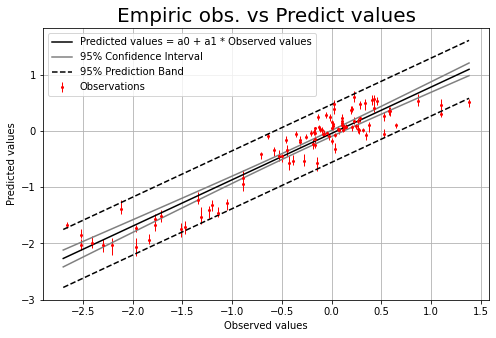

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-2.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.09, median - 0.087, CI - [0.066-0.112]

SHAP-values for: contr_g_MAX: mean - 0.067, median - 0.066, CI - [0.052-0.081]

SHAP-values for: g_MAX: mean - 0.02, median - 0.019, CI - [0.01-0.029]

SHAP-values for: mf_chm_MAX: mean - 0.223, median - 0.225, CI - [0.196-0.248]

SHAP-values for: mf_chm_MEAN: mean - 0.291, median - 0.29, CI - [0.261-0.323]



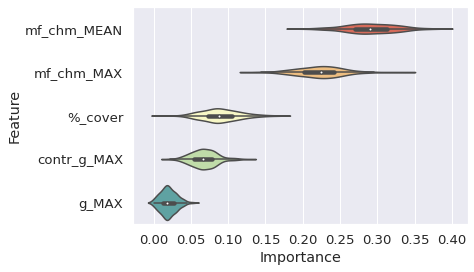

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MEAN', 'mf_chm_MAX', '%_cover', 'contr_g_MAX', 'g_MAX'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 59.73, median: 65.0,
 pred. interval (P(0.025)-P(0.975)): 25.0-75.0, 
 conf. interval (p-value=0.95): 43.182-74.031 
***
Aggregate bias statistic: 
 mean: 0.011, median: 0.015,
 pred. interval (P(0.025)-P(0.975)): -0.116-0.143, 
 conf. interval (p-value=0.95): -0.046-0.06 
***
Aggregate RMSE statistic: 
 mean: 0.298, median: 0.295, pred. interval (P(0.025)-P(0.975)): 0.194-0.406, 
 conf. interval (p-value=0.95): 0.241-0.355 
***
Aggregate MSE statistic: 
 mean: 0.092, median: 0.087, pred. interval (P(0.025)-P(0.975)): 0.038-0.165, 
 conf. interval (p-value=0.95): 0.059-0.126 
***
Aggregate R^2 statistic: 
 mean: 0.862, median: 0.872, pred. interval (P(0.025)-P(0.975)): 0.719-0.933, 
 conf. interval (p-value=0.95): 0.829-0.907 
***
Aggregate bias(%) statistic: 
 mean: 22.471, median: -4.971, pred. interval (P(0.025)-P(0.975)): -101.753-112.824, 
 conf. interval (p-value=0.95): -21.07

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

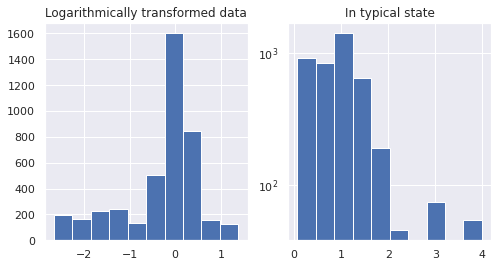

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [38]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-3, -2, -1, 0, 1, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.5, 1, 2, 3, 4])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

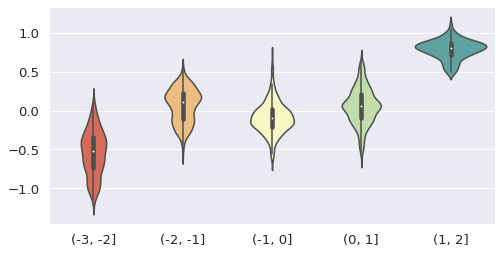

In [39]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

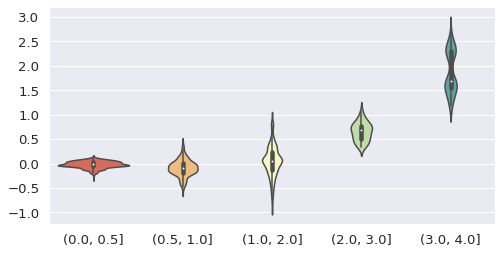

In [40]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

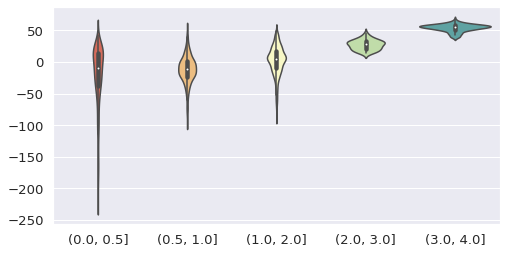

In [41]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [42]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [43]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [44]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.11107
[1]	validation_0-rmse:1.02693
[2]	validation_0-rmse:0.96994
[3]	validation_0-rmse:0.90239
[4]	validation_0-rmse:0.84541
[5]	validation_0-rmse:0.78634
[6]	validation_0-rmse:0.75242
[7]	validation_0-rmse:0.72035
[8]	validation_0-rmse:0.67655
[9]	validation_0-rmse:0.64270
[10]	validation_0-rmse:0.60854
[11]	validation_0-rmse:0.57383
[12]	validation_0-rmse:0.55069


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.52804
[14]	validation_0-rmse:0.51011
[15]	validation_0-rmse:0.48063
[16]	validation_0-rmse:0.45667
[17]	validation_0-rmse:0.43550
[18]	validation_0-rmse:0.41895
[19]	validation_0-rmse:0.39904
[20]	validation_0-rmse:0.38433
[21]	validation_0-rmse:0.37568
[22]	validation_0-rmse:0.37297
[23]	validation_0-rmse:0.36147
[24]	validation_0-rmse:0.34818
[25]	validation_0-rmse:0.33659
[26]	validation_0-rmse:0.32681
[27]	validation_0-rmse:0.32367
[28]	validation_0-rmse:0.31930
[29]	validation_0-rmse:0.31316
[30]	validation_0-rmse:0.30549
[31]	validation_0-rmse:0.29763
[32]	validation_0-rmse:0.29381
[33]	validation_0-rmse:0.28745
[34]	validation_0-rmse:0.27871
[35]	validation_0-rmse:0.27695
[36]	validation_0-rmse:0.27445
[37]	validation_0-rmse:0.27017
[38]	validation_0-rmse:0.26782
[39]	validation_0-rmse:0.26264
[40]	validation_0-rmse:0.26022
[41]	validation_0-rmse:0.25758
[42]	validation_0-rmse:0.25416
[43]	validation_0-rmse:0.25169
[44]	validation_0-rmse:0.25142
[45]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [45]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 74


In [46]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

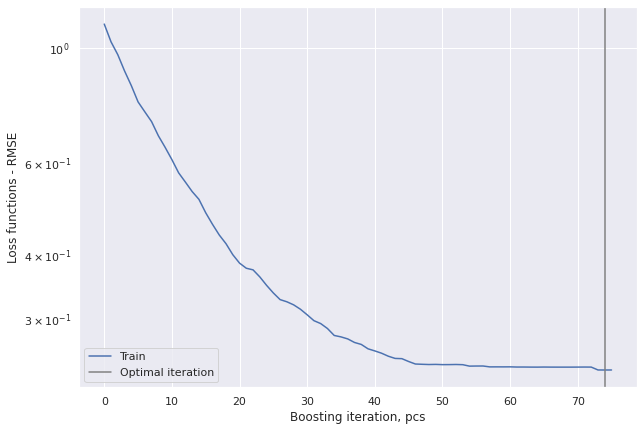

In [47]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [48]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -1.64
RMSE: 0.2
Relative RMSE(%):  -72.899
MSE: 0.1
R square: 92.3%


In [49]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.924
Uncertainty
a0: -0.031+/-0.023
a1: 0.889+/-0.025


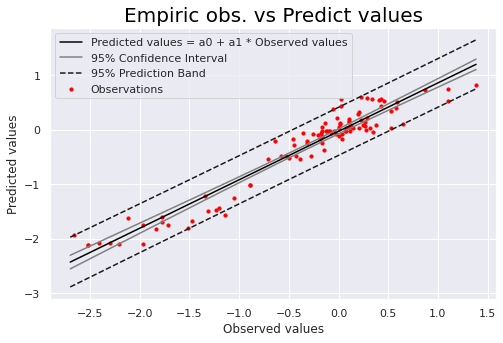

In [51]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

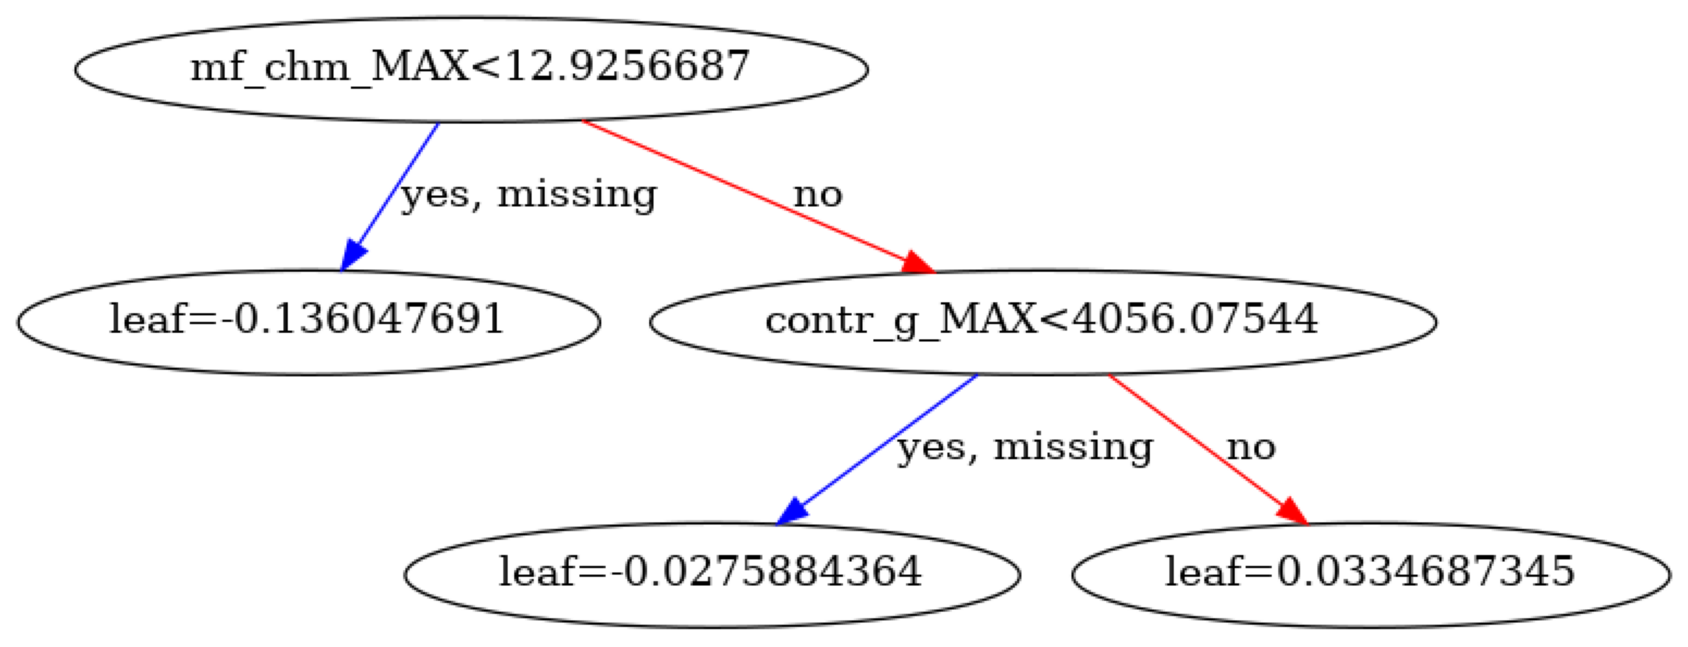

In [53]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

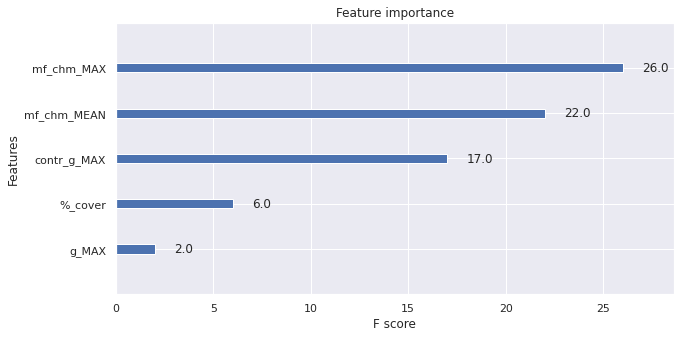

In [55]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

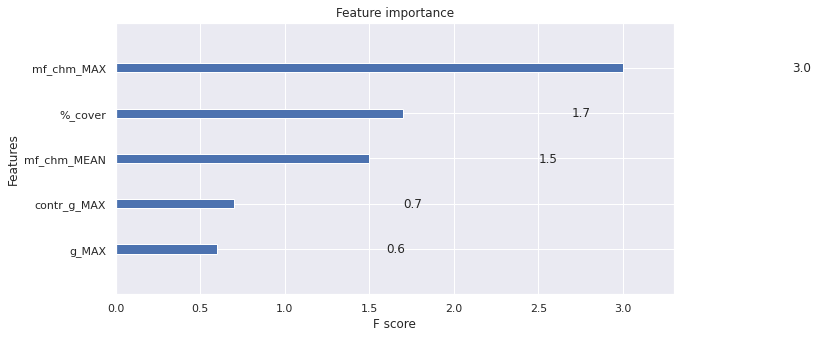

In [56]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

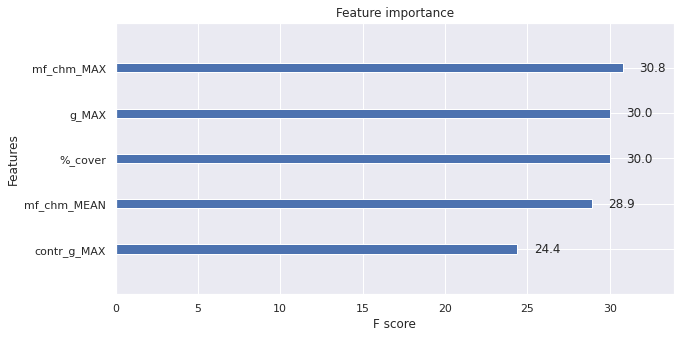

In [57]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [58]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


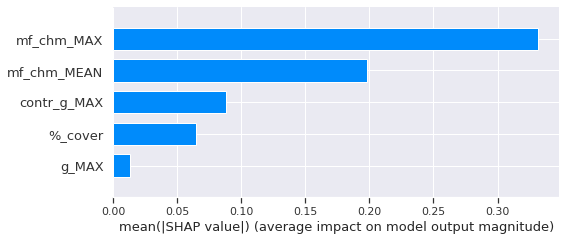

In [59]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

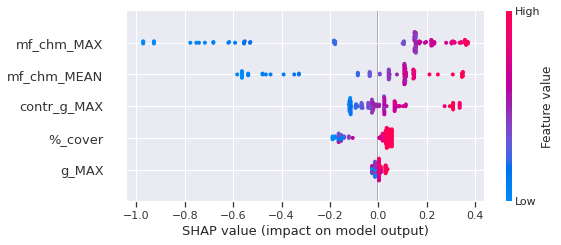

In [60]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

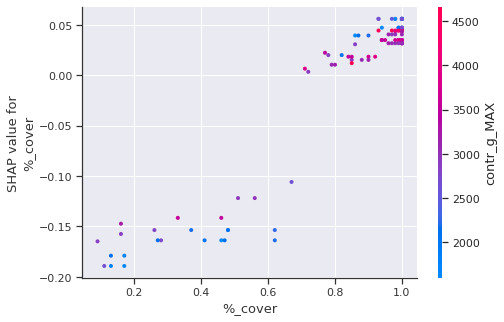

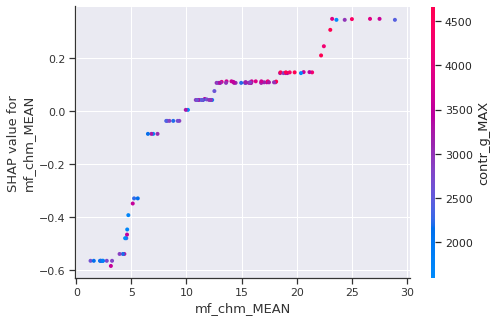

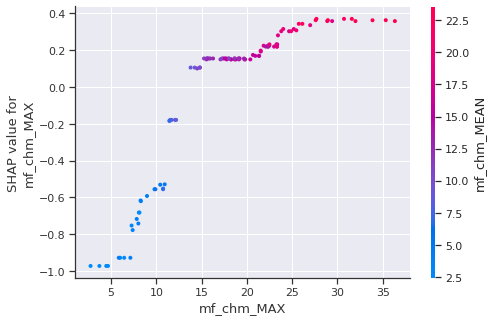

invalid value encountered in true_divide
invalid value encountered in true_divide


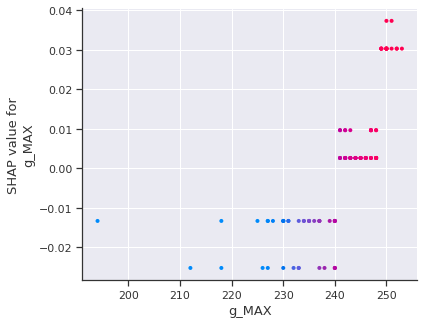

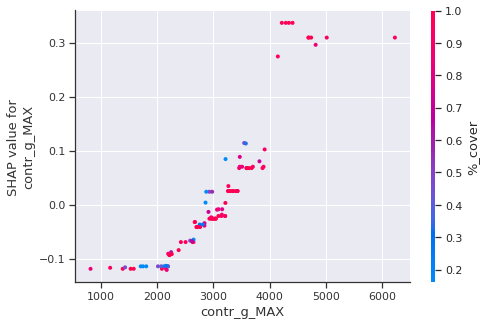

In [61]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [62]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/03_LN_MstemBark_CHM_with_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/03_LN_MstemBark_CHM_with_RGB_XGB_model.txt")